In [2]:
# generate future y values using past x values AND greater offset y values 

In [1]:
import pandas as pd
import numpy as np
import os
import shutil
import openpyxl
import matplotlib.pyplot as plt
# import seaborn as sns
# import matplotlib as plt
import re

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV



from sklearn.preprocessing import MinMaxScaler


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

from sklearn.metrics import mean_squared_error, mean_absolute_error



from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from scikeras.wrappers import KerasRegressor


import pickle


print('yes')

yes


In [2]:

def convert_to_dataframe(x):
    return pd.DataFrame(x)


In [3]:
def create_sequences(features, target, seq_length, y_offset):
    X, y = [], []
    for i in range(seq_length, len(features)):
        # Current features sequence
        current_features = features[i-seq_length:i]
        
        # Offset previous y values sequence
        if i - seq_length - y_offset >= 0:
            offset_prev_y = target[i-seq_length-y_offset:i-y_offset]
        else:
            # If the offset is larger than the available data, fill with zeros or appropriate value
            offset_prev_y = np.zeros((seq_length, 1))
        
        # Combine current features with offset previous y values
        combined = np.hstack((current_features, offset_prev_y))
        
        X.append(combined)
        y.append(target[i])
    
    return np.array(X), np.array(y)



In [4]:
def predict_future(model, data, seq_length, future_steps):
    future_predictions = []
    current_sequence = data[-seq_length:].reshape(1, seq_length, data.shape[1])
    
    return(current_sequence)

In [5]:
df = pd.read_csv(r'C:\Users\whiter04\OneDrive - Johnson Matthey\00. cspark\ELY\ELY-TimeSeries\Data\master_data_frame.csv')
df_copy = df.copy()
df_copy = df_copy.drop('Unnamed: 0',axis=1) 
df_copy


to_drop = ['temp_anode_inlet_set', 
           'temp_cathode_inlet_set', 
           'pressure_anode_set',
           'pressure_cathode_set', 
           'flow_anode_di_water_supply_set', 
           'flow_cathode_di_water_supply_set', 
          'flow_cathode_di_water_supply', 
           'signal_in_o2_in_h2_sensor']

df_copy = df_copy.drop(to_drop, axis=1)
df_copy


df_copy['seconds'] = (df_copy['time_running_total']/1000).astype(int)
df_copy['minutes'] = (df_copy['seconds']/60).astype(int)


df_copy = df_copy.drop('time_running_total',axis=1)

# df_copy = df_copy.tail(150000)
df_copy

,cell_voltage_001,current,current_density,temp_anode_inlet,temp_anode_outlet,temp_cathode_inlet,temp_cathode_outlet,pressure_anode_inlet,pressure_anode_outlet,pressure_cathode_inlet,pressure_cathode_outlet,flow_anode_di_water_supply,signal_in_resistivity_anode,signal_in_resistivity_cathode,signal_in_h2_in_o2_sensor,seconds,minutes
0,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
1,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
2,-0.095167,-0.01262,-0.000505,22.524658,22.211363,22.943993,22.664978,0.015911,-0.026205,-0.009285,-0.009439,0.149858,0.142337,0.580925,0.278146,0,0
3,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
4,-0.095167,-0.01192,-0.000477,23.574999,22.622944,22.930300,22.651320,0.184089,-0.026205,-0.009285,-0.001021,0.270174,0.132591,0.585798,0.276583,30,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461237,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461238,1.879790,75.00482,3.000193,79.819145,78.329117,29.627552,34.574463,1.992006,1.723834,6.002450,6.019177,0.300858,0.230055,0.152083,0.104703,4934550,82242
461239,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243
461240,1.880171,75.00482,2.999912,79.819145,78.354111,29.627552,34.560806,1.992006,1.723834,6.002450,5.960248,0.300858,0.215435,0.156957,0.103140,4934580,82243


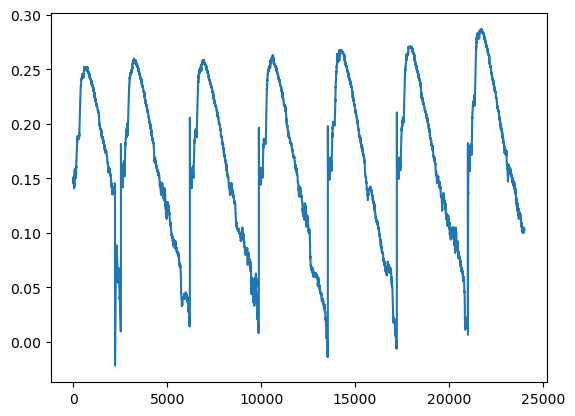

,cell_voltage_001,current,signal_in_h2_in_o2_sensor
minutes,,,
2024-06-24 08:37:00,1.863963,74.997810,0.145329
2024-06-24 08:38:00,1.864345,75.001315,0.145329
2024-06-24 08:39:00,1.864345,74.997810,0.145329
2024-06-24 08:40:00,1.864154,74.997810,0.145329
2024-06-24 08:41:00,1.864345,75.001315,0.145329
...,...,...,...
2024-07-12 02:39:00,1.879218,74.993604,0.101265
2024-07-12 02:40:00,1.879294,75.000614,0.103140
2024-07-12 02:41:00,1.879599,74.996408,0.103140


In [8]:
# import matplotlib as plt

time_period = 'minutes'

df_time = df_copy.groupby(time_period).mean().reset_index()

downsampled_df = df_time.tail(24000).reset_index()

downsampled_df = downsampled_df[['minutes','cell_voltage_001','current','signal_in_h2_in_o2_sensor']]

downsampled_df[time_period] = pd.to_datetime('2024-05-16 00:00:00') + pd.to_timedelta(downsampled_df[time_period], unit='m')



plt.plot(downsampled_df['signal_in_h2_in_o2_sensor'])

plt.show()

downsampled_df = downsampled_df.set_index('minutes')
downsampled_df

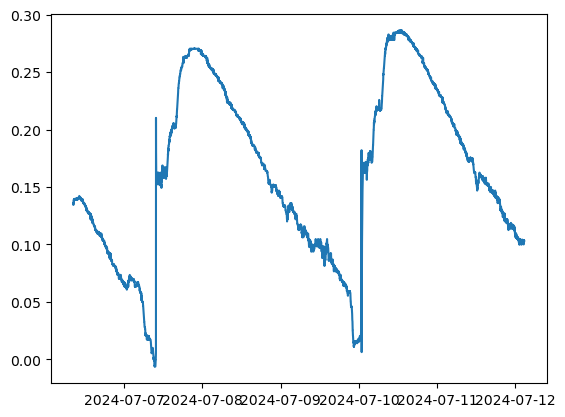

In [9]:
l = len(downsampled_df)
train_length = 15700

downsampled_1_df = downsampled_df.head(15700)
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'])

plt.show()

# downsampled_2_df

C:\Users\whiter04\AppData\Local\Temp\ipykernel_20048\1358783847.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_1_df['trend'] = trend
C:\Users\whiter04\AppData\Local\Temp\ipykernel_20048\1358783847.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downsampled_1_df['smoothed_value'] = moving_average(downsampled_1_df['signal_in_h2_in_o2_sensor'], window=3)


                     cell_voltage_001    current  signal_in_h2_in_o2_sensor  \
minutes                                                                       
2024-06-24 08:39:00          1.864345  74.997810                   0.145329   
2024-06-24 08:40:00          1.864154  74.997810                   0.145329   
2024-06-24 08:41:00          1.864345  75.001315                   0.145329   
2024-06-24 08:42:00          1.864249  75.001315                   0.146111   
2024-06-24 08:43:00          1.864345  74.994305                   0.146111   
...                               ...        ...                        ...   
2024-07-06 08:17:00          1.872201  75.002016                   0.134391   
2024-07-06 08:18:00          1.872163  75.002016                   0.134391   
2024-07-06 08:19:00          1.871972  74.997810                   0.135954   
2024-07-06 08:20:00          1.871972  75.000614                   0.135016   
2024-07-06 08:21:00          1.872087  75.002016    

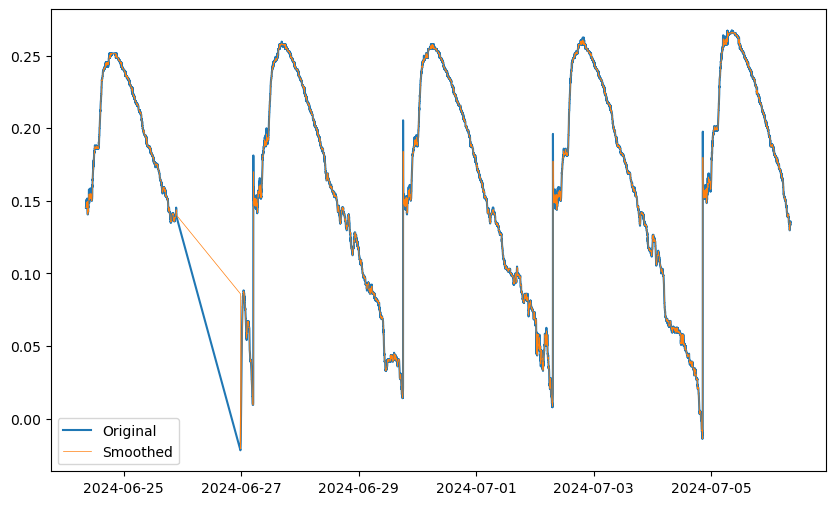

In [10]:






# feture engineering 

# adding trend to provide the model with increasing trend data

trend = (np.arange(len(downsampled_1_df))).tolist()
trend


downsampled_1_df['trend'] = trend
downsampled_1_df



# # smoothing the data using a moving average

def moving_average(data, window=3):
    return data.rolling(window=window).mean()



downsampled_1_df['smoothed_value'] = moving_average(downsampled_1_df['signal_in_h2_in_o2_sensor'], window=3)







downsampled_1_df = downsampled_1_df.dropna()
print(downsampled_1_df)


import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(downsampled_1_df['signal_in_h2_in_o2_sensor'], label='Original')
plt.plot(downsampled_1_df['smoothed_value'], label='Smoothed', linewidth=0.5)
plt.legend()
plt.show()

In [11]:
# pipeline


pipeline = ColumnTransformer([
    ('voltage_current_scaler', MinMaxScaler(), ['cell_voltage_001', 'current', 'smoothed_value']),
    ('trend_scaler', StandardScaler(), ['trend'])

])




y_pipeline = Pipeline([
    ('scaler', MinMaxScaler()),

])





# Fit and transform the data



features = downsampled_1_df.drop(columns= ['signal_in_h2_in_o2_sensor'])
features_trans = pipeline.fit_transform(features)


target = downsampled_1_df['signal_in_h2_in_o2_sensor']
target
print(target.shape)

target_trans = y_pipeline.fit_transform(pd.DataFrame(target))





seq_length = 3  # Using  to predict the next minute
y_offset = 3500
X, y = create_sequences(features_trans, target_trans, seq_length, y_offset)
X

(15698,)


array([[[ 0.94404483,  0.7514304 ,  0.57789886, -1.73194048,
          0.        ],
        [ 0.94394994,  0.7514304 ,  0.57789886, -1.7317198 ,
          0.        ],
        [ 0.94404483,  0.75146551,  0.57789886, -1.73149913,
          0.        ]],

       [[ 0.94394994,  0.7514304 ,  0.57789886, -1.7317198 ,
          0.        ],
        [ 0.94404483,  0.75146551,  0.57789886, -1.73149913,
          0.        ],
        [ 0.94399739,  0.75146551,  0.57880492, -1.73127846,
          0.        ]],

       [[ 0.94404483,  0.75146551,  0.57789886, -1.73149913,
          0.        ],
        [ 0.94399739,  0.75146551,  0.57880492, -1.73127846,
          0.        ],
        [ 0.94404483,  0.75139529,  0.57971098, -1.73105779,
          0.        ]],

       ...,

       [[ 0.9479289 ,  0.75144444,  0.53876819,  1.73083712,
          0.51296117],
        [ 0.94794758,  0.75147253,  0.53985476,  1.73105779,
          0.51296117],
        [ 0.9479289 ,  0.75147253,  0.53985476,  1.731278

In [12]:
features

,cell_voltage_001,current,trend,smoothed_value
minutes,,,,
2024-06-24 08:39:00,1.864345,74.997810,2,0.145329
2024-06-24 08:40:00,1.864154,74.997810,3,0.145329
2024-06-24 08:41:00,1.864345,75.001315,4,0.145329
2024-06-24 08:42:00,1.864249,75.001315,5,0.145590
2024-06-24 08:43:00,1.864345,74.994305,6,0.145850
...,...,...,...,...
2024-07-06 08:17:00,1.872201,75.002016,15695,0.134391
2024-07-06 08:18:00,1.872163,75.002016,15696,0.134391
2024-07-06 08:19:00,1.871972,74.997810,15697,0.134912


In [13]:
ts = 0.75

train_size = int(len(X) * ts)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]



In [14]:
# Tuning of Hyperparameters 

In [15]:
import keras.backend as K
from keras.callbacks import EarlyStopping
import keras_tuner as kt
from tensorflow.keras.layers import Dropout
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [16]:
def create_model():
    model = Sequential()
    
    model.add(LSTM(120,
                   return_sequences = True,
                   input_shape = (X_train.shape[1], X_train.shape[2])))


    model.add(Dropout(0.4))


    model.add(LSTM(140, return_sequences = False))


    model.add(Dropout(0.1))


    model.add(Dense(1))         
                           
    
    
    model.compile(optimizer='adam', loss = 'mean_squared_error', metrics = ['mse'])
    return model

In [17]:
model = create_model()

In [18]:
model.fit(x=X_train,
    y=y_train,
    epochs=20,
    batch_size=128,
    validation_data=(X_test, y_test),)

Epoch 1/20
92/92 [==============================] - 13s 48ms/step - loss: 0.0373 - mse: 0.0373 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 2/20
92/92 [==============================] - 2s 23ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 5.3539e-04 - val_mse: 5.3539e-04
Epoch 3/20
92/92 [==============================] - 1s 16ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 4.6969e-04 - val_mse: 4.6969e-04
Epoch 4/20
92/92 [==============================] - 2s 19ms/step - loss: 0.0021 - mse: 0.0021 - val_loss: 5.5579e-04 - val_mse: 5.5579e-04
Epoch 5/20
92/92 [==============================] - 3s 30ms/step - loss: 0.0018 - mse: 0.0018 - val_loss: 4.2620e-04 - val_mse: 4.2620e-04
Epoch 6/20
92/92 [==============================] - 2s 18ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 3.3944e-04 - val_mse: 3.3944e-04
Epoch 7/20
92/92 [==============================] - 2s 21ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 5.1856e-04 - val_mse: 5.1856e-04
Epoch 8/20
92/92 [================

In [19]:
predictions = model.predict(X_test)

123/123 [==============================] - 4s 6ms/step


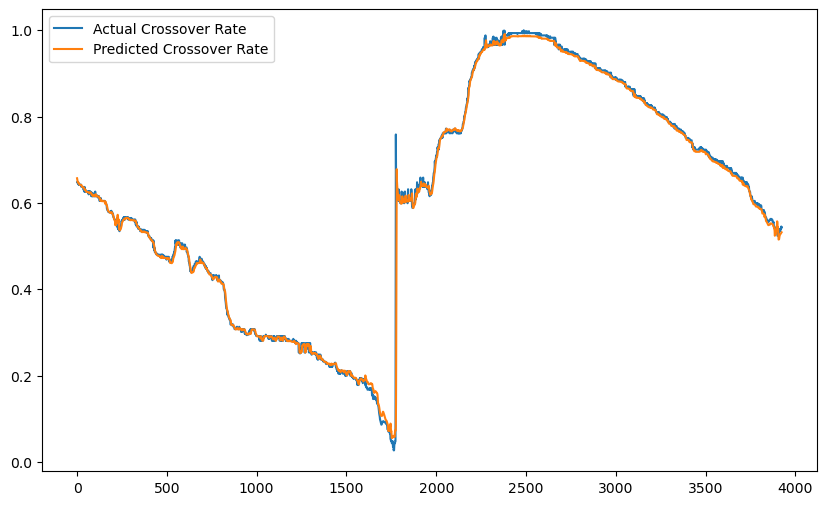

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Crossover Rate')
plt.plot(predictions, label='Predicted Crossover Rate')
plt.legend()
plt.show()

In [21]:



train_size = int(len(X) * ts)
X_train_downsampled_df, X_test_downsampled_df = downsampled_df[:train_size], downsampled_df[train_size:]




In [22]:
def smooth_y_func():
    pass

In [24]:
import datetime
import numpy as np
import pandas as pd

# Initialize predictions
predictions = np.array([]).reshape(-1, 1)

# Parameters

num = 0

n=3
n_predictions = 10000
window_size = 3
y_offset_1 = y_offset


scaler = MinMaxScaler()

predictions = []





# Previous data setup
previous_data = downsampled_1_df.copy()

prev_y_and_new_y = pd.DataFrame(previous_data['signal_in_h2_in_o2_sensor'])




new_data = downsampled_2_df.copy()
new_data = new_data.drop(['signal_in_h2_in_o2_sensor'], axis=1)


# Prepare recent features

last_trend_value = previous_data['trend'].iloc[-1]  # Get the last value of the existing trend
new_data['trend'] = np.arange(last_trend_value + 1, last_trend_value + 1 + len(new_data)).tolist()



scaler.fit(previous_data[['smoothed_value']])



# Initial smoothed values (taken from the last 3 smoothed values)
initial_smoothed_y = previous_data['smoothed_value'].iloc[-n:].tolist()


new_smoothed_y = initial_smoothed_y.copy()


for preds in range(n_predictions):

#     # lagged y values 
    lagged_y = prev_y_and_new_y.iloc[y_offset_1-window_size:y_offset_1]['signal_in_h2_in_o2_sensor'].tolist()
    lagged_y_trans = y_pipeline.transform(pd.DataFrame(lagged_y))
    



    # first lines of data from new data set
    recent_features = new_data.iloc[n-window_size:n].copy()
    

#     # initial dataset
    initial_smoothed_y = moving_average(prev_y_and_new_y['signal_in_h2_in_o2_sensor'], window=3)[-3:].tolist()
    
    recent_features.loc[:, 'smoothed_value'] = initial_smoothed_y
    


    recent_features_trans = pipeline.transform(recent_features)



#     # append the lagged y value
    recent_features_trans = np.hstack((recent_features_trans,lagged_y_trans))
    

#     print(recent_features_trans)


    # generate prediction
    prediction = model.predict(recent_features_trans.reshape(1, window_size, -1))
    prediction = y_pipeline.inverse_transform(prediction)
    predictions.append(prediction[0][0])
    
    
    
    new_row = pd.DataFrame({'signal_in_h2_in_o2_sensor': [prediction[0][0]]})
    prev_y_and_new_y = pd.concat([prev_y_and_new_y, new_row], ignore_index=False)


    
    y_offset_1 += 1
    
    n +=1
    
    print(num)
    
    num +=1





1/1 [==============================] - 0s 16ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


0
1/1 [==============================] - 0s 41ms/step
1
1/1 [==============================] - 0s 47ms/step
2


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
3
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4
1/1 [==============================] - 0s 81ms/step
5
1/1 [==============================] - 0s 31ms/step
6


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
8
1/1 [==============================] - 0s 32ms/step
9


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
10
1/1 [==============================] - 0s 33ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


11


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
12
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
13
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


14
1/1 [==============================] - 0s 41ms/step
15
1/1 [==============================] - 0s 40ms/step
16


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
17
1/1 [==============================] - 0s 43ms/step
18

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 48ms/step
19
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


20
1/1 [==============================] - 0s 41ms/step
21
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


22
1/1 [==============================] - 0s 44ms/step
23
1/1 [==============================] - 0s 46ms/step
24


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
25
1/1 [==============================] - 0s 46ms/step
26


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
27
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


28
1/1 [==============================] - 0s 37ms/step
29
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30
1/1 [==============================] - 0s 57ms/step
31
1/1 [==============================] - 0s 39ms/step
32


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
33
1/1 [==============================] - 0s 40ms/step
34


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
35
1/1 [==============================] - 0s 41ms/step
36


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
37
1/1 [==============================] - 0s 40ms/step
38


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
39
1/1 [==============================] - 0s 41ms/step
40


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
41
1/1 [==============================] - 0s 41ms/step
42


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
43
1/1 [==============================] - 0s 41ms/step
44


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
45
1/1 [==============================] - 0s 44ms/step
46


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
47
1/1 [==============================] - 0s 40ms/step
48


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
49
1/1 [==============================] - 0s 41ms/step
50


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
51
1/1 [==============================] - 0s 54ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


52
1/1 [==============================] - 0s 40ms/step
53
1/1 [==============================] - 0s 43ms/step
54


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
55
1/1 [==============================] - 0s 58ms/step
56


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
57
1/1 [==============================] - 0s 48ms/step
58

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 43ms/step
59
1/1 [==============================] - 0s 49ms/step
60


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
61
1/1 [==============================] - 0s 41ms/step
62


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
63
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


64
1/1 [==============================] - 0s 40ms/step
65
1/1 [==============================] - 0s 44ms/step
66


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
67
1/1 [==============================] - 0s 51ms/step
68


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
69
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


70
1/1 [==============================] - 0s 45ms/step
71
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


72
1/1 [==============================] - 0s 43ms/step
73
1/1 [==============================] - 0s 41ms/step
74


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
75
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


76
1/1 [==============================] - 0s 43ms/step
77


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
78
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


79
1/1 [==============================] - 0s 42ms/step
80
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


81
1/1 [==============================] - 0s 42ms/step
82
1/1 [==============================] - 0s 44ms/step
83


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
84
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
85
1/1 [==============================] - 0s 47ms/step
86


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
87
1/1 [==============================] - 0s 37ms/step
88


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
89
1/1 [==============================] - 0s 49ms/step
90


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
91
1/1 [==============================] - 0s 50ms/step
92


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
93
1/1 [==============================] - 0s 51ms/step
94


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
95
1/1 [==============================] - 0s 45ms/step
96


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
97
1/1 [==============================] - 0s 37ms/step
98


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
99
1/1 [==============================] - 0s 41ms/step
100


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
101
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


102
1/1 [==============================] - 0s 43ms/step
103
1/1 [==============================] - 0s 44ms/step
104


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
105
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


106
1/1 [==============================] - 0s 48ms/step
107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
108
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


109
1/1 [==============================] - 0s 52ms/step
110
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


111
1/1 [==============================] - 0s 41ms/step
112


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
113
1/1 [==============================] - 0s 48ms/step
114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
115
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


116
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


117
1/1 [==============================] - 0s 51ms/step
118
1/1 [==============================] - 0s 51ms/step
119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
120
1/1 [==============================] - 0s 40ms/step
121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
122
1/1 [==============================] - 0s 60ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


123
1/1 [==============================] - 0s 49ms/step
124
1/1 [==============================] - 0s 41ms/step
125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
126
1/1 [==============================] - 0s 43ms/step
127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
128
1/1 [==============================] - 0s 51ms/step
129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
130
1/1 [==============================] - 0s 41ms/step
131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
132
1/1 [==============================] - 0s 43ms/step
133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
134
1/1 [==============================] - 0s 43ms/step
135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
136
1/1 [==============================] - 0s 40ms/step
137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
138
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
139
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


140
1/1 [==============================] - 0s 41ms/step
141
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


142
1/1 [==============================] - 0s 41ms/step
143
1/1 [==============================] - 0s 41ms/step
144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
145
1/1 [==============================] - 0s 40ms/step
146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
147
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


148
1/1 [==============================] - 0s 51ms/step
149
1/1 [==============================] - 0s 41ms/step
150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
151
1/1 [==============================] - 0s 49ms/step
152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
153
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
154
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
155
1/1 [==============================] - 0s 49ms/step
156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
157
1/1 [==============================] - 0s 51ms/step
158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
159
1/1 [==============================] - 0s 41ms/step
160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
161
1/1 [==============================] - 0s 51ms/step
162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
163
1/1 [==============================] - 0s 51ms/step
164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
165
1/1 [==============================] - 0s 41ms/step
166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
167
1/1 [==============================] - 0s 41ms/step
168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
169
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


170
1/1 [==============================] - 0s 41ms/step
171
1/1 [==============================] - 0s 41ms/step
172


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
173
1/1 [==============================] - 0s 41ms/step
174


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
175
1/1 [==============================] - 0s 41ms/step
176


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
177
1/1 [==============================] - 0s 40ms/step
178


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
179
1/1 [==============================] - 0s 41ms/step
180


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
181
1/1 [==============================] - 0s 40ms/step
182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
183
1/1 [==============================] - 0s 41ms/step
184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
185
1/1 [==============================] - 0s 51ms/step
186


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
187
1/1 [==============================] - 0s 40ms/step
188


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
189
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


190
1/1 [==============================] - 0s 51ms/step
191
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


192
1/1 [==============================] - 0s 40ms/step
193
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


194
1/1 [==============================] - 0s 41ms/step
195
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


196
1/1 [==============================] - 0s 41ms/step
197
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


198
1/1 [==============================] - 0s 43ms/step
199
1/1 [==============================] - 0s 51ms/step
200


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
201
1/1 [==============================] - 0s 41ms/step
202


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
204
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


205
1/1 [==============================] - 0s 41ms/step
206


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
207
1/1 [==============================] - 0s 43ms/step
208


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
209
1/1 [==============================] - 0s 41ms/step
210


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
211
1/1 [==============================] - 0s 49ms/step
212


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
213
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


214
1/1 [==============================] - 0s 41ms/step
215
1/1 [==============================] - 0s 40ms/step
216


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
217
1/1 [==============================] - 0s 41ms/step
218


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
219
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


220
1/1 [==============================] - 0s 49ms/step
221
1/1 [==============================] - 0s 43ms/step
222


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
223
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


224
1/1 [==============================] - 0s 43ms/step
225
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


226
1/1 [==============================] - 0s 41ms/step
227
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


228
1/1 [==============================] - 0s 41ms/step
229
1/1 [==============================] - 0s 49ms/step
230


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
231
1/1 [==============================] - 0s 41ms/step
232


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
233
1/1 [==============================] - 0s 51ms/step
234


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
235
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


236
1/1 [==============================] - 0s 51ms/step
237
1/1 [==============================] - 0s 49ms/step
238


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
239
1/1 [==============================] - 0s 41ms/step
240


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
241
1/1 [==============================] - 0s 49ms/step
242


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
243
1/1 [==============================] - 0s 40ms/step
244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
245
1/1 [==============================] - 0s 41ms/step
246


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
247
1/1 [==============================] - 0s 41ms/step
248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
249
1/1 [==============================] - 0s 40ms/step
250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
251
1/1 [==============================] - 0s 41ms/step
252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
253
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


254
1/1 [==============================] - 0s 43ms/step
255
1/1 [==============================] - 0s 41ms/step
256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
257
1/1 [==============================] - 0s 40ms/step
258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
259
1/1 [==============================] - 0s 41ms/step
260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
261
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


262
1/1 [==============================] - 0s 51ms/step
263
1/1 [==============================] - 0s 40ms/step
264


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
265
1/1 [==============================] - 0s 43ms/step
266


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
267
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


268
1/1 [==============================] - 0s 43ms/step
269
1/1 [==============================] - 0s 40ms/step
270


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
271
1/1 [==============================] - 0s 43ms/step
272


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
273
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


274
1/1 [==============================] - 0s 41ms/step
275
1/1 [==============================] - 0s 40ms/step
276


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
277
1/1 [==============================] - 0s 40ms/step
278


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
279
1/1 [==============================] - 0s 40ms/step
280


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
281
1/1 [==============================] - 0s 41ms/step
282


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
283
1/1 [==============================] - 0s 41ms/step
284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
285
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


286
1/1 [==============================] - 0s 62ms/step
287
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
288
1/1 [==============================] - 0s 43ms/step
289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
290
1/1 [==============================] - 0s 40ms/step
291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
292
1/1 [==============================] - 0s 49ms/step
293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
294
1/1 [==============================] - 0s 49ms/step
295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
296
1/1 [==============================] - 0s 32ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


297
1/1 [==============================] - 0s 32ms/step
298
1/1 [==============================] - 0s 41ms/step
299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
300
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


301
1/1 [==============================] - 0s 33ms/step
302
1/1 [==============================] - 0s 41ms/step
303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
304
1/1 [==============================] - 0s 41ms/step
305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
306
1/1 [==============================] - 0s 43ms/step
307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
308
1/1 [==============================] - 0s 41ms/step
309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
310
1/1 [==============================] - 0s 40ms/step
311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
312
1/1 [==============================] - 0s 30ms/step
313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
314
1/1 [==============================] - 0s 40ms/step
315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
316
1/1 [==============================] - 0s 41ms/step
317


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
318
1/1 [==============================] - 0s 38ms/step
319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
320
1/1 [==============================] - 0s 38ms/step
321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
322
1/1 [==============================] - 0s 40ms/step
323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
324
1/1 [==============================] - 0s 41ms/step
325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
326
1/1 [==============================] - 0s 41ms/step
327


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
328
1/1 [==============================] - 0s 43ms/step
329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
330
1/1 [==============================] - 0s 41ms/step
331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
332
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


333
1/1 [==============================] - 0s 49ms/step
334
1/1 [==============================] - 0s 59ms/step
335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
336
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


337
1/1 [==============================] - 0s 41ms/step
338
1/1 [==============================] - 0s 43ms/step
339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
340
1/1 [==============================] - 0s 41ms/step
341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
342
1/1 [==============================] - 0s 41ms/step
343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
344
1/1 [==============================] - 0s 41ms/step
345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
346
1/1 [==============================] - 0s 40ms/step
347


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
348
1/1 [==============================] - 0s 40ms/step
349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
350
1/1 [==============================] - 0s 40ms/step
351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
352
1/1 [==============================] - 0s 40ms/step
353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
354
1/1 [==============================] - 0s 40ms/step
355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
356
1/1 [==============================] - 0s 49ms/step
357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
358
1/1 [==============================] - 0s 40ms/step
359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
360
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


361
1/1 [==============================] - 0s 41ms/step
362


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
363
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


364
1/1 [==============================] - 0s 40ms/step
365
1/1 [==============================] - 0s 41ms/step
366


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
367
1/1 [==============================] - 0s 40ms/step
368


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
369
1/1 [==============================] - 0s 32ms/step
370


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
371
1/1 [==============================] - 0s 40ms/step
372


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
373
1/1 [==============================] - 0s 40ms/step
374


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
375
1/1 [==============================] - 0s 38ms/step
376


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
377
1/1 [==============================] - 0s 39ms/step
378


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
379
1/1 [==============================] - 0s 40ms/step
380


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
381
1/1 [==============================] - 0s 38ms/step
382


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
383
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


384
1/1 [==============================] - 0s 40ms/step
385
1/1 [==============================] - 0s 40ms/step
386


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
387
1/1 [==============================] - 0s 43ms/step
388


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
389
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


390
1/1 [==============================] - 0s 40ms/step
391
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


392
1/1 [==============================] - 0s 41ms/step
393
1/1 [==============================] - 0s 40ms/step
394


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
395
1/1 [==============================] - 0s 41ms/step
396


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
397
1/1 [==============================] - 0s 40ms/step
398


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
399
1/1 [==============================] - 0s 32ms/step
400


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
401
1/1 [==============================] - 0s 40ms/step
402


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
403
1/1 [==============================] - 0s 40ms/step
404


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
405
1/1 [==============================] - 0s 40ms/step
406


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
407
1/1 [==============================] - 0s 40ms/step
408


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
409
1/1 [==============================] - 0s 38ms/step
410


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
411
1/1 [==============================] - 0s 40ms/step
412


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
413
1/1 [==============================] - 0s 40ms/step
414


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
415
1/1 [==============================] - 0s 38ms/step
416


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
417
1/1 [==============================] - 0s 41ms/step
418


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
419
1/1 [==============================] - 0s 49ms/step
420


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
421
1/1 [==============================] - 0s 40ms/step
422


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
423
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


424
1/1 [==============================] - 0s 49ms/step
425
1/1 [==============================] - 0s 41ms/step
426


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
427
1/1 [==============================] - 0s 40ms/step
428


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
429
1/1 [==============================] - 0s 39ms/step
430


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
431
1/1 [==============================] - 0s 40ms/step
432


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
433
1/1 [==============================] - 0s 40ms/step
434


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
435
1/1 [==============================] - 0s 40ms/step
436


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
437
1/1 [==============================] - 0s 30ms/step
438


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
439
1/1 [==============================] - 0s 41ms/step
440


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
441
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


442
1/1 [==============================] - 0s 40ms/step
443
1/1 [==============================] - 0s 40ms/step
444


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
445
1/1 [==============================] - 0s 38ms/step
446


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
447
1/1 [==============================] - 0s 38ms/step
448


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
449
1/1 [==============================] - 0s 41ms/step
450


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
451
1/1 [==============================] - 0s 38ms/step
452


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
453
1/1 [==============================] - 0s 40ms/step
454


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
455
1/1 [==============================] - 0s 51ms/step
456


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
457
1/1 [==============================] - 0s 41ms/step
458


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
459
1/1 [==============================] - 0s 40ms/step
460


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
461
1/1 [==============================] - 0s 32ms/step
462


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
463
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


464
1/1 [==============================] - 0s 38ms/step
465
1/1 [==============================] - 0s 32ms/step
466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
467
1/1 [==============================] - 0s 40ms/step
468


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
469
1/1 [==============================] - 0s 41ms/step
470


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
471
1/1 [==============================] - 0s 40ms/step
472


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
473
1/1 [==============================] - 0s 40ms/step
474


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
475
1/1 [==============================] - 0s 42ms/step
476


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
477
1/1 [==============================] - 0s 40ms/step
478


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
479
1/1 [==============================] - 0s 30ms/step
480


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
481
1/1 [==============================] - 0s 30ms/step
482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
483
1/1 [==============================] - 0s 41ms/step
484


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
485
1/1 [==============================] - 0s 40ms/step
486


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
487
1/1 [==============================] - 0s 49ms/step
488


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
489
1/1 [==============================] - 0s 33ms/step
490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
491
1/1 [==============================] - 0s 41ms/step
492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
493
1/1 [==============================] - 0s 38ms/step
494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
495
1/1 [==============================] - 0s 41ms/step
496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
497
1/1 [==============================] - 0s 43ms/step
498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
499
1/1 [==============================] - 0s 40ms/step
500


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
501
1/1 [==============================] - 0s 38ms/step
502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
503
1/1 [==============================] - 0s 40ms/step
504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
505
1/1 [==============================] - 0s 40ms/step
506


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
507
1/1 [==============================] - 0s 30ms/step
508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
509
1/1 [==============================] - 0s 40ms/step
510


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
511
1/1 [==============================] - 0s 40ms/step
512


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
513
1/1 [==============================] - 0s 40ms/step
514


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
515
1/1 [==============================] - 0s 41ms/step
516


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
517
1/1 [==============================] - 0s 41ms/step
518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
519
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


520
1/1 [==============================] - 0s 47ms/step
521
1/1 [==============================] - 0s 41ms/step
522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
523
1/1 [==============================] - 0s 43ms/step
524


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
525
1/1 [==============================] - 0s 49ms/step
526


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
527
1/1 [==============================] - 0s 40ms/step
528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
529
1/1 [==============================] - 0s 41ms/step
530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
531
1/1 [==============================] - 0s 41ms/step
532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
533
1/1 [==============================] - 0s 40ms/step
534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
535
1/1 [==============================] - 0s 40ms/step
536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
537
1/1 [==============================] - 0s 40ms/step
538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
539
1/1 [==============================] - 0s 41ms/step
540


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
542
1/1 [==============================] - 0s 47ms/step
543


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
544
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


545
1/1 [==============================] - 0s 80ms/step
546
1/1 [==============================] - 0s 40ms/step
547


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
548
1/1 [==============================] - 0s 40ms/step
549


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
550
1/1 [==============================] - 0s 40ms/step
551


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
552
1/1 [==============================] - 0s 39ms/step
553


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
554
1/1 [==============================] - 0s 41ms/step
555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
556
1/1 [==============================] - 0s 32ms/step
557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
558
1/1 [==============================] - 0s 40ms/step
559


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
560
1/1 [==============================] - 0s 41ms/step
561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
562
1/1 [==============================] - 0s 40ms/step
563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
564
1/1 [==============================] - 0s 41ms/step
565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
566
1/1 [==============================] - 0s 40ms/step
567


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
568
1/1 [==============================] - 0s 40ms/step
569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
570
1/1 [==============================] - 0s 40ms/step
571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
572
1/1 [==============================] - 0s 38ms/step
573


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
574
1/1 [==============================] - 0s 32ms/step
575


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
576
1/1 [==============================] - 0s 38ms/step
577


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
578
1/1 [==============================] - 0s 41ms/step
579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
580
1/1 [==============================] - 0s 40ms/step
581


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
582
1/1 [==============================] - 0s 40ms/step
583


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
584
1/1 [==============================] - 0s 40ms/step
585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
586
1/1 [==============================] - 0s 32ms/step
587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
588
1/1 [==============================] - 0s 40ms/step
589


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
590
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


591
1/1 [==============================] - 0s 40ms/step
592
1/1 [==============================] - 0s 40ms/step
593


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
594
1/1 [==============================] - 0s 41ms/step
595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
596
1/1 [==============================] - 0s 40ms/step
597


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
598
1/1 [==============================] - 0s 40ms/step
599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
600
1/1 [==============================] - 0s 32ms/step
601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
602
1/1 [==============================] - 0s 41ms/step
603


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
604
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


605
1/1 [==============================] - 0s 40ms/step
606
1/1 [==============================] - 0s 40ms/step
607


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
608
1/1 [==============================] - 0s 41ms/step
609


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
610
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


611
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


612
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


613
1/1 [==============================] - 0s 43ms/step
614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
615
1/1 [==============================] - 0s 41ms/step
616


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
617
1/1 [==============================] - 0s 40ms/step
618


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
619
1/1 [==============================] - 0s 40ms/step
620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
621
1/1 [==============================] - 0s 41ms/step
622


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
623
1/1 [==============================] - 0s 51ms/step
624


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
625
1/1 [==============================] - 0s 41ms/step
626


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
627
1/1 [==============================] - 0s 41ms/step
628


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
629
1/1 [==============================] - 0s 40ms/step
630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
631
1/1 [==============================] - 0s 42ms/step
632


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
633
1/1 [==============================] - 0s 40ms/step
634


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
635
1/1 [==============================] - 0s 49ms/step
636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
637
1/1 [==============================] - 0s 49ms/step
638


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
639
1/1 [==============================] - 0s 43ms/step
640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
641
1/1 [==============================] - 0s 32ms/step
642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
643
1/1 [==============================] - 0s 41ms/step
644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
645
1/1 [==============================] - 0s 40ms/step
646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
647
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


648
1/1 [==============================] - 0s 40ms/step
649
1/1 [==============================] - 0s 41ms/step
650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
651
1/1 [==============================] - 0s 40ms/step
652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
653
1/1 [==============================] - 0s 40ms/step
654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
655
1/1 [==============================] - 0s 41ms/step
656


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
657
1/1 [==============================] - 0s 41ms/step
658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
659
1/1 [==============================] - 0s 40ms/step
660


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
661
1/1 [==============================] - 0s 41ms/step
662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
663
1/1 [==============================] - 0s 40ms/step
664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
665
1/1 [==============================] - 0s 41ms/step
666


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
667
1/1 [==============================] - 0s 40ms/step
668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
669
1/1 [==============================] - 0s 30ms/step
670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
671
1/1 [==============================] - 0s 40ms/step
672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
673
1/1 [==============================] - 0s 41ms/step
674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
675
1/1 [==============================] - 0s 40ms/step
676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
677
1/1 [==============================] - 0s 38ms/step
678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
679
1/1 [==============================] - 0s 41ms/step
680


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
681
1/1 [==============================] - 0s 40ms/step
682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
683
1/1 [==============================] - 0s 40ms/step
684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
685
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


686
1/1 [==============================] - 0s 40ms/step
687
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


688
1/1 [==============================] - 0s 40ms/step
689
1/1 [==============================] - 0s 40ms/step
690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
691
1/1 [==============================] - 0s 39ms/step
692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
693
1/1 [==============================] - 0s 38ms/step
694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
695
1/1 [==============================] - 0s 40ms/step
696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
697
1/1 [==============================] - 0s 49ms/step
698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
699
1/1 [==============================] - 0s 40ms/step
700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
701
1/1 [==============================] - 0s 40ms/step
702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
703
1/1 [==============================] - 0s 43ms/step
704


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
705
1/1 [==============================] - 0s 40ms/step
706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
707
1/1 [==============================] - 0s 41ms/step
708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
709
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


710
1/1 [==============================] - 0s 41ms/step
711
1/1 [==============================] - 0s 33ms/step
712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
713
1/1 [==============================] - 0s 41ms/step
714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
715
1/1 [==============================] - 0s 41ms/step
716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
717
1/1 [==============================] - 0s 38ms/step
718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
719
1/1 [==============================] - 0s 41ms/step
720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
721
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


722
1/1 [==============================] - 0s 41ms/step
723
1/1 [==============================] - 0s 41ms/step
724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
725
1/1 [==============================] - 0s 43ms/step
726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
727
1/1 [==============================] - 0s 41ms/step
728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
729
1/1 [==============================] - 0s 41ms/step
730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
731
1/1 [==============================] - 0s 41ms/step
732


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
733
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


734
1/1 [==============================] - 0s 112ms/step
735
1/1 [==============================] - 0s 41ms/step
736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
737
1/1 [==============================] - 0s 41ms/step
738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
739
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


740
1/1 [==============================] - 0s 51ms/step
741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
742
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


743
1/1 [==============================] - 0s 41ms/step
744
1/1 [==============================] - 0s 41ms/step
745


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
746
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


747
1/1 [==============================] - 0s 40ms/step
748
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


749
1/1 [==============================] - 0s 49ms/step
750
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


751
1/1 [==============================] - 0s 43ms/step
752
1/1 [==============================] - 0s 39ms/step
753


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
754
1/1 [==============================] - 0s 41ms/step
755


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
756
1/1 [==============================] - 0s 41ms/step
757


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
758
1/1 [==============================] - 0s 41ms/step
759


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
760
1/1 [==============================] - 0s 41ms/step
761


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
762
1/1 [==============================] - 0s 41ms/step
763


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
764
1/1 [==============================] - 0s 41ms/step
765


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
766
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


767
1/1 [==============================] - 0s 41ms/step
768
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


769
1/1 [==============================] - 0s 41ms/step
770
1/1 [==============================] - 0s 41ms/step
771


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
772
1/1 [==============================] - 0s 41ms/step
773


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
774
1/1 [==============================] - 0s 41ms/step
775


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
776
1/1 [==============================] - 0s 41ms/step
777


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
778
1/1 [==============================] - 0s 41ms/step
779


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
780
1/1 [==============================] - 0s 41ms/step
781


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
782
1/1 [==============================] - 0s 51ms/step
783


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
784
1/1 [==============================] - 0s 41ms/step
785


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
786
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


787
1/1 [==============================] - 0s 41ms/step
788
1/1 [==============================] - 0s 41ms/step
789


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
790
1/1 [==============================] - 0s 41ms/step
791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
792


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
793
1/1 [==============================] - 0s 41ms/step
794


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
795
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


796
1/1 [==============================] - 0s 49ms/step
797
1/1 [==============================] - 0s 40ms/step
798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
799
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


800
1/1 [==============================] - 0s 61ms/step
801
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


802
1/1 [==============================] - 0s 69ms/step
803
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
804
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


805
1/1 [==============================] - 0s 223ms/step
806
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


807
1/1 [==============================] - 0s 51ms/step
808


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
809


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
810
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
811
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
812
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


813
1/1 [==============================] - 0s 40ms/step
814
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


815
1/1 [==============================] - 0s 41ms/step
816
1/1 [==============================] - 0s 40ms/step
817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
818
1/1 [==============================] - 0s 41ms/step
819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
820
1/1 [==============================] - 0s 40ms/step
821


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
822
1/1 [==============================] - 0s 40ms/step
823


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
824
1/1 [==============================] - 0s 38ms/step
825


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
826
1/1 [==============================] - 0s 41ms/step
827


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
828
1/1 [==============================] - 0s 40ms/step
829


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
830
1/1 [==============================] - 0s 41ms/step
831


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
832
1/1 [==============================] - 0s 41ms/step
833


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
834
1/1 [==============================] - 0s 41ms/step
835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
836
1/1 [==============================] - 0s 41ms/step
837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
838
1/1 [==============================] - 0s 41ms/step
839


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
840
1/1 [==============================] - 0s 40ms/step
841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
842
1/1 [==============================] - 0s 40ms/step
843


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
844
1/1 [==============================] - 0s 38ms/step
845


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
846
1/1 [==============================] - 0s 41ms/step
847


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
848
1/1 [==============================] - 0s 30ms/step
849


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
850
1/1 [==============================] - 0s 32ms/step
851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
852
1/1 [==============================] - 0s 40ms/step
853


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
854
1/1 [==============================] - 0s 40ms/step
855


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
856
1/1 [==============================] - 0s 40ms/step
857


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
858
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


859
1/1 [==============================] - 0s 42ms/step
860
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


861
1/1 [==============================] - 0s 49ms/step
862
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


863
1/1 [==============================] - 0s 40ms/step
864
1/1 [==============================] - 0s 41ms/step
865


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
866
1/1 [==============================] - 0s 41ms/step
867


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
868
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
869
1/1 [==============================] - 0s 40ms/step
870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
871
1/1 [==============================] - 0s 40ms/step
872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
873
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


874
1/1 [==============================] - 0s 41ms/step
875
1/1 [==============================] - 0s 43ms/step
876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
877
1/1 [==============================] - 0s 40ms/step
878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
879
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


880
1/1 [==============================] - 0s 41ms/step
881
1/1 [==============================] - 0s 41ms/step
882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
883
1/1 [==============================] - 0s 41ms/step
884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
885
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


886
1/1 [==============================] - 0s 41ms/step
887
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


888
1/1 [==============================] - 0s 43ms/step
889
1/1 [==============================] - 0s 40ms/step
890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
891
1/1 [==============================] - 0s 41ms/step
892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
893
1/1 [==============================] - 0s 40ms/step
894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
895
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


896
1/1 [==============================] - 0s 32ms/step
897
1/1 [==============================] - 0s 38ms/step
898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
899
1/1 [==============================] - 0s 38ms/step
900


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
901
1/1 [==============================] - 0s 38ms/step
902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
903
1/1 [==============================] - 0s 40ms/step
904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
905
1/1 [==============================] - 0s 40ms/step
906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
907
1/1 [==============================] - 0s 30ms/step
908


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
909
1/1 [==============================] - 0s 38ms/step
910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
911
1/1 [==============================] - 0s 32ms/step
912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
913
1/1 [==============================] - 0s 41ms/step
914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
915
1/1 [==============================] - 0s 43ms/step
916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
917
1/1 [==============================] - 0s 41ms/step
918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
919
1/1 [==============================] - 0s 38ms/step
920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
921
1/1 [==============================] - 0s 40ms/step
922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
923
1/1 [==============================] - 0s 31ms/step
924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
925
1/1 [==============================] - 0s 40ms/step
926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
927
1/1 [==============================] - 0s 41ms/step
928


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
929
1/1 [==============================] - 0s 41ms/step
930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
932
1/1 [==============================] - 0s 41ms/step
933


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
934
1/1 [==============================] - 0s 41ms/step
935


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
936
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


937
1/1 [==============================] - 0s 41ms/step
938
1/1 [==============================] - 0s 43ms/step
939


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
940
1/1 [==============================] - 0s 40ms/step
941


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
942
1/1 [==============================] - 0s 40ms/step
943


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
944
1/1 [==============================] - 0s 51ms/step
945


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
946
1/1 [==============================] - 0s 41ms/step
947


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
948
1/1 [==============================] - 0s 43ms/step
949


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
950
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


951
1/1 [==============================] - 0s 40ms/step
952
1/1 [==============================] - 0s 40ms/step
953


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
954
1/1 [==============================] - 0s 41ms/step
955


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
956
1/1 [==============================] - 0s 49ms/step
957


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
958
1/1 [==============================] - 0s 41ms/step
959


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
960
1/1 [==============================] - 0s 40ms/step
961


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
962
1/1 [==============================] - 0s 51ms/step
963


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
965
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
966
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
967
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
968
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


969
1/1 [==============================] - 0s 53ms/step
970
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


971
1/1 [==============================] - 0s 41ms/step
972


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
973
1/1 [==============================] - 0s 43ms/step
974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
975
1/1 [==============================] - 0s 43ms/step
976


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
977
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


978
1/1 [==============================] - 0s 61ms/step
979
1/1 [==============================] - 0s 44ms/step
980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
981
1/1 [==============================] - 0s 51ms/step
982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
983
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
984
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


985
1/1 [==============================] - 0s 40ms/step
986
1/1 [==============================] - 0s 51ms/step
987


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
988
1/1 [==============================] - 0s 41ms/step
989


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
990
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


991
1/1 [==============================] - 0s 49ms/step
992
1/1 [==============================] - 0s 51ms/step
993


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
994
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
995
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


996
1/1 [==============================] - 0s 51ms/step
997
1/1 [==============================] - 0s 41ms/step
998


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
999
1/1 [==============================] - 0s 71ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1000
1/1 [==============================] - 0s 32ms/step
1001


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1002
1/1 [==============================] - 0s 40ms/step
1003


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1004
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1005
1/1 [==============================] - 0s 43ms/step
1006
1/1 [==============================] - 0s 41ms/step
1007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1008
1/1 [==============================] - 0s 40ms/step
1009


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1010
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1011
1/1 [==============================] - 0s 43ms/step
1012
1/1 [==============================] - 0s 40ms/step
1013


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1014
1/1 [==============================] - 0s 42ms/step
1015


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1016
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1017
1/1 [==============================] - 0s 41ms/step
1018
1/1 [==============================] - 0s 40ms/step
1019


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1020
1/1 [==============================] - 0s 41ms/step
1021


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1022
1/1 [==============================] - 0s 51ms/step
1023


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1024
1/1 [==============================] - 0s 41ms/step
1025


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1026
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1027
1/1 [==============================] - 0s 41ms/step
1028
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1029
1/1 [==============================] - 0s 41ms/step
1030
1/1 [==============================] - 0s 43ms/step
1031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1032
1/1 [==============================] - 0s 40ms/step
1033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1034
1/1 [==============================] - 0s 51ms/step
1035


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1036
1/1 [==============================] - 0s 41ms/step
1037


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1038
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1039
1/1 [==============================] - 0s 41ms/step
1040
1/1 [==============================] - 0s 40ms/step
1041


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1042
1/1 [==============================] - 0s 51ms/step
1043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1044
1/1 [==============================] - 0s 51ms/step
1045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1046


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 213ms/step
1047


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
1048


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
1049
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1050
1/1 [==============================] - 0s 71ms/step
1051


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
1052
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
1053
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1054
1/1 [==============================] - 0s 59ms/step
1055
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
1056
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1057
1/1 [==============================] - 0s 51ms/step
1058
1/1 [==============================] - 0s 43ms/step
1059


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1060
1/1 [==============================] - 0s 51ms/step
1061
1/1 [==============================] - 0s 61ms/step
1062


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
1063


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
1064
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1065
1/1 [==============================] - 0s 49ms/step
1066
1/1 [==============================] - 0s 41ms/step
1067


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1068
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1069
1/1 [==============================] - 0s 51ms/step
1070
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1071
1/1 [==============================] - 0s 43ms/step
1072
1/1 [==============================] - 0s 49ms/step
1073


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1074
1/1 [==============================] - 0s 41ms/step
1075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1076
1/1 [==============================] - 0s 49ms/step
1077


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1078
1/1 [==============================] - 0s 41ms/step
1079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1080
1/1 [==============================] - 0s 41ms/step
1081


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1082
1/1 [==============================] - 0s 40ms/step
1083


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1084
1/1 [==============================] - 0s 40ms/step
1085


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1086
1/1 [==============================] - 0s 40ms/step
1087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1088
1/1 [==============================] - 0s 38ms/step
1089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1090
1/1 [==============================] - 0s 40ms/step
1091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1092
1/1 [==============================] - 0s 32ms/step
1093


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1094
1/1 [==============================] - 0s 41ms/step
1095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1096
1/1 [==============================] - 0s 40ms/step
1097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1098
1/1 [==============================] - 0s 43ms/step
1099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1100
1/1 [==============================] - 0s 41ms/step
1101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1102
1/1 [==============================] - 0s 40ms/step
1103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1104
1/1 [==============================] - 0s 40ms/step
1105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1106
1/1 [==============================] - 0s 40ms/step
1107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1108
1/1 [==============================] - 0s 40ms/step
1109


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1110
1/1 [==============================] - 0s 41ms/step
1111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1112
1/1 [==============================] - 0s 40ms/step
1113


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1114
1/1 [==============================] - 0s 40ms/step
1115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1116
1/1 [==============================] - 0s 38ms/step
1117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1118
1/1 [==============================] - 0s 40ms/step
1119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1120
1/1 [==============================] - 0s 38ms/step
1121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1122
1/1 [==============================] - 0s 40ms/step
1123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1124
1/1 [==============================] - 0s 32ms/step
1125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1126
1/1 [==============================] - 0s 40ms/step
1127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1128
1/1 [==============================] - 0s 40ms/step
1129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1130
1/1 [==============================] - 0s 41ms/step
1131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1132
1/1 [==============================] - 0s 40ms/step
1133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1134
1/1 [==============================] - 0s 39ms/step
1135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1136
1/1 [==============================] - 0s 49ms/step
1137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1139
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1140
1/1 [==============================] - 0s 32ms/step
1141
1/1 [==============================] - 0s 40ms/step
1142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1143
1/1 [==============================] - 0s 41ms/step
1144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1145
1/1 [==============================] - 0s 41ms/step
1146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1147
1/1 [==============================] - 0s 32ms/step
1148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1149
1/1 [==============================] - 0s 41ms/step
1150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1151
1/1 [==============================] - 0s 40ms/step
1152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1153
1/1 [==============================] - 0s 41ms/step
1154


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1155
1/1 [==============================] - 0s 32ms/step
1156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1157
1/1 [==============================] - 0s 40ms/step
1158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1159
1/1 [==============================] - 0s 41ms/step
1160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1161
1/1 [==============================] - 0s 32ms/step
1162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step
1163
1/1 [==============================] - 0s 41ms/step
1164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1165
1/1 [==============================] - 0s 40ms/step
1166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1167
1/1 [==============================] - 0s 40ms/step
1168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1169
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1170
1/1 [==============================] - 0s 71ms/step
1171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
1172
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1173
1/1 [==============================] - 0s 49ms/step
1174
1/1 [==============================] - 0s 51ms/step
1175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1176
1/1 [==============================] - 0s 51ms/step
1177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1178
1/1 [==============================] - 0s 41ms/step
1179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1180
1/1 [==============================] - 0s 49ms/step
1181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1182
1/1 [==============================] - 0s 43ms/step
1183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1184
1/1 [==============================] - 0s 42ms/step
1185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1186
1/1 [==============================] - 0s 40ms/step
1187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1188
1/1 [==============================] - 0s 41ms/step
1189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1190
1/1 [==============================] - 0s 32ms/step
1191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1192
1/1 [==============================] - 0s 40ms/step
1193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1194
1/1 [==============================] - 0s 40ms/step
1195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1196
1/1 [==============================] - 0s 32ms/step
1197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1198
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1199
1/1 [==============================] - 0s 40ms/step
1200
1/1 [==============================] - 0s 40ms/step
1201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1202
1/1 [==============================] - 0s 40ms/step
1203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1204
1/1 [==============================] - 0s 41ms/step
1205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1206
1/1 [==============================] - 0s 40ms/step
1207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1208
1/1 [==============================] - 0s 41ms/step
1209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1210
1/1 [==============================] - 0s 40ms/step
1211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1212
1/1 [==============================] - 0s 38ms/step
1213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1214
1/1 [==============================] - 0s 38ms/step
1215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1216
1/1 [==============================] - 0s 32ms/step
1217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1218
1/1 [==============================] - 0s 41ms/step
1219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1220
1/1 [==============================] - 0s 38ms/step
1221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1222
1/1 [==============================] - 0s 41ms/step
1223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1224
1/1 [==============================] - 0s 41ms/step
1225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1226
1/1 [==============================] - 0s 40ms/step
1227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1228
1/1 [==============================] - 0s 41ms/step
1229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1230
1/1 [==============================] - 0s 30ms/step
1231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1232
1/1 [==============================] - 0s 32ms/step
1233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1234
1/1 [==============================] - 0s 39ms/step
1235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1236
1/1 [==============================] - 0s 41ms/step
1237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1238
1/1 [==============================] - 0s 40ms/step
1239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1240
1/1 [==============================] - 0s 40ms/step
1241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1242
1/1 [==============================] - 0s 40ms/step
1243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1244
1/1 [==============================] - 0s 40ms/step
1245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1246
1/1 [==============================] - 0s 40ms/step
1247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
1248
1/1 [==============================] - 0s 51ms/step
1249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1250
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1251
1/1 [==============================] - 0s 51ms/step
1252
1/1 [==============================] - 0s 53ms/step
1253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1254
1/1 [==============================] - 0s 40ms/step
1255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1256
1/1 [==============================] - 0s 41ms/step
1257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1258
1/1 [==============================] - 0s 40ms/step
1259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
1260
1/1 [==============================] - 0s 40ms/step
1261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1262
1/1 [==============================] - 0s 32ms/step
1263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1264
1/1 [==============================] - 0s 40ms/step
1265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1266
1/1 [==============================] - 0s 40ms/step
1267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1268
1/1 [==============================] - 0s 38ms/step
1269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1270
1/1 [==============================] - 0s 39ms/step
1271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1272
1/1 [==============================] - 0s 40ms/step
1273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
1274
1/1 [==============================] - 0s 38ms/step
1275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1276
1/1 [==============================] - 0s 40ms/step
1277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1278
1/1 [==============================] - 0s 40ms/step
1279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1280
1/1 [==============================] - 0s 40ms/step
1281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1282
1/1 [==============================] - 0s 40ms/step
1283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1284
1/1 [==============================] - 0s 41ms/step
1285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1286
1/1 [==============================] - 0s 40ms/step
1287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1288
1/1 [==============================] - 0s 41ms/step
1289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1290
1/1 [==============================] - 0s 41ms/step
1291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1292
1/1 [==============================] - 0s 40ms/step
1293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1294
1/1 [==============================] - 0s 40ms/step
1295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1296
1/1 [==============================] - 0s 40ms/step
1297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1298
1/1 [==============================] - 0s 32ms/step
1299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1300
1/1 [==============================] - 0s 40ms/step
1301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1302
1/1 [==============================] - 0s 40ms/step
1303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1304
1/1 [==============================] - 0s 38ms/step
1305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1306
1/1 [==============================] - 0s 32ms/step
1307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1308
1/1 [==============================] - 0s 32ms/step
1309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1310
1/1 [==============================] - 0s 41ms/step
1311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
1312
1/1 [==============================] - 0s 41ms/step
1313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1314
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1315
1/1 [==============================] - 0s 41ms/step
1316
1/1 [==============================] - 0s 43ms/step
1317


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1318
1/1 [==============================] - 0s 38ms/step
1319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1320
1/1 [==============================] - 0s 40ms/step
1321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1322
1/1 [==============================] - 0s 41ms/step
1323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1324
1/1 [==============================] - 0s 40ms/step
1325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1326
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1327
1/1 [==============================] - 0s 43ms/step
1328
1/1 [==============================] - 0s 49ms/step
1329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1330
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1331
1/1 [==============================] - 0s 41ms/step
1332
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1333
1/1 [==============================] - 0s 41ms/step
1334
1/1 [==============================] - 0s 40ms/step
1335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1336
1/1 [==============================] - 0s 40ms/step
1337


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1338
1/1 [==============================] - 0s 40ms/step
1339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1340
1/1 [==============================] - 0s 40ms/step
1341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1342
1/1 [==============================] - 0s 41ms/step
1343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1344
1/1 [==============================] - 0s 42ms/step
1345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1346
1/1 [==============================] - 0s 31ms/step
1347


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1348
1/1 [==============================] - 0s 40ms/step
1349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1350
1/1 [==============================] - 0s 30ms/step
1351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1352
1/1 [==============================] - 0s 49ms/step
1353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1354
1/1 [==============================] - 0s 40ms/step
1355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1356
1/1 [==============================] - 0s 32ms/step
1357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1358
1/1 [==============================] - 0s 41ms/step
1359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1360
1/1 [==============================] - 0s 38ms/step
1361


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1362
1/1 [==============================] - 0s 41ms/step
1363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1364
1/1 [==============================] - 0s 40ms/step
1365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1366
1/1 [==============================] - 0s 30ms/step
1367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
1368
1/1 [==============================] - 0s 32ms/step
1369


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1370
1/1 [==============================] - 0s 32ms/step
1371


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1372
1/1 [==============================] - 0s 40ms/step
1373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1374
1/1 [==============================] - 0s 39ms/step
1375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1376
1/1 [==============================] - 0s 41ms/step
1377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1378
1/1 [==============================] - 0s 48ms/step
1379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1380
1/1 [==============================] - 0s 49ms/step
1381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1382
1/1 [==============================] - 0s 40ms/step
1383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1384
1/1 [==============================] - 0s 43ms/step
1385


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1386
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1387
1/1 [==============================] - 0s 51ms/step
1388
1/1 [==============================] - 0s 49ms/step
1389


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1390
1/1 [==============================] - 0s 51ms/step
1391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1392
1/1 [==============================] - 0s 41ms/step
1393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1394
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1395
1/1 [==============================] - 0s 43ms/step
1396
1/1 [==============================] - 0s 40ms/step
1397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1398
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1399
1/1 [==============================] - 0s 40ms/step
1400
1/1 [==============================] - 0s 38ms/step
1401


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1402
1/1 [==============================] - 0s 40ms/step
1403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1404
1/1 [==============================] - 0s 40ms/step
1405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1406
1/1 [==============================] - 0s 40ms/step
1407


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1408
1/1 [==============================] - 0s 41ms/step
1409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1410
1/1 [==============================] - 0s 40ms/step
1411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1412
1/1 [==============================] - 0s 32ms/step
1413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1414
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1415
1/1 [==============================] - 0s 41ms/step
1416
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1417
1/1 [==============================] - 0s 41ms/step
1418
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1419
1/1 [==============================] - 0s 49ms/step
1420
1/1 [==============================] - 0s 41ms/step
1421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1422
1/1 [==============================] - 0s 41ms/step
1423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1424
1/1 [==============================] - 0s 41ms/step
1425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1426
1/1 [==============================] - 0s 41ms/step
1427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1428
1/1 [==============================] - 0s 41ms/step
1429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1430
1/1 [==============================] - 0s 41ms/step
1431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1432
1/1 [==============================] - 0s 40ms/step
1433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1434
1/1 [==============================] - 0s 41ms/step
1435


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1436
1/1 [==============================] - 0s 42ms/step
1437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1438
1/1 [==============================] - 0s 40ms/step
1439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1440
1/1 [==============================] - 0s 40ms/step
1441


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1442
1/1 [==============================] - 0s 40ms/step
1443


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1444
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1445
1/1 [==============================] - 0s 41ms/step
1446
1/1 [==============================] - 0s 40ms/step
1447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1448
1/1 [==============================] - 0s 32ms/step
1449


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1450
1/1 [==============================] - 0s 30ms/step
1451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1452
1/1 [==============================] - 0s 40ms/step
1453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1454
1/1 [==============================] - 0s 41ms/step
1455


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1456
1/1 [==============================] - 0s 40ms/step
1457


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1458
1/1 [==============================] - 0s 39ms/step
1459


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1460
1/1 [==============================] - 0s 40ms/step
1461


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1462
1/1 [==============================] - 0s 41ms/step
1463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1464
1/1 [==============================] - 0s 40ms/step
1465


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1466
1/1 [==============================] - 0s 40ms/step
1467


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1468
1/1 [==============================] - 0s 40ms/step
1469


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1470
1/1 [==============================] - 0s 40ms/step
1471


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1472
1/1 [==============================] - 0s 32ms/step
1473


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1474
1/1 [==============================] - 0s 41ms/step
1475


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1476
1/1 [==============================] - 0s 40ms/step
1477


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1478
1/1 [==============================] - 0s 32ms/step
1479


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1480
1/1 [==============================] - 0s 39ms/step
1481


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1482
1/1 [==============================] - 0s 41ms/step
1483


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1484
1/1 [==============================] - 0s 39ms/step
1485


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1486
1/1 [==============================] - 0s 40ms/step
1487


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1488
1/1 [==============================] - 0s 32ms/step
1489


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1490
1/1 [==============================] - 0s 40ms/step
1491


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1492
1/1 [==============================] - 0s 40ms/step
1493


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1494
1/1 [==============================] - 0s 40ms/step
1495


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1496
1/1 [==============================] - 0s 41ms/step
1497


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1498
1/1 [==============================] - 0s 41ms/step
1499


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1500
1/1 [==============================] - 0s 33ms/step
1501


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1502
1/1 [==============================] - 0s 40ms/step
1503


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
1504
1/1 [==============================] - 0s 40ms/step
1505


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1506
1/1 [==============================] - 0s 40ms/step
1507


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1508
1/1 [==============================] - 0s 40ms/step
1509


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1510
1/1 [==============================] - 0s 38ms/step
1511


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1512
1/1 [==============================] - 0s 41ms/step
1513


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1514
1/1 [==============================] - 0s 40ms/step
1515


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1516
1/1 [==============================] - 0s 32ms/step
1517


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1518
1/1 [==============================] - 0s 32ms/step
1519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1520
1/1 [==============================] - 0s 43ms/step
1521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1522
1/1 [==============================] - 0s 41ms/step
1523


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1524
1/1 [==============================] - 0s 41ms/step
1525


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1526
1/1 [==============================] - 0s 49ms/step
1527


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1528
1/1 [==============================] - 0s 40ms/step
1529


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1530
1/1 [==============================] - 0s 41ms/step
1531


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1532
1/1 [==============================] - 0s 32ms/step
1533


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1534
1/1 [==============================] - 0s 41ms/step
1535


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1536
1/1 [==============================] - 0s 43ms/step
1537


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1538
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1539
1/1 [==============================] - 0s 41ms/step
1540
1/1 [==============================] - 0s 32ms/step
1541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1542
1/1 [==============================] - 0s 40ms/step
1543


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1544
1/1 [==============================] - 0s 32ms/step
1545


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1546
1/1 [==============================] - 0s 41ms/step
1547


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1548
1/1 [==============================] - 0s 40ms/step
1549


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1550
1/1 [==============================] - 0s 32ms/step
1551


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1552
1/1 [==============================] - 0s 40ms/step
1553


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1554
1/1 [==============================] - 0s 32ms/step
1555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1556
1/1 [==============================] - 0s 38ms/step
1557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1558
1/1 [==============================] - 0s 40ms/step
1559


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1560
1/1 [==============================] - 0s 32ms/step
1561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1562
1/1 [==============================] - 0s 39ms/step
1563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1564
1/1 [==============================] - 0s 32ms/step
1565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1566
1/1 [==============================] - 0s 32ms/step
1567


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1568
1/1 [==============================] - 0s 41ms/step
1569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1570
1/1 [==============================] - 0s 40ms/step
1571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1572
1/1 [==============================] - 0s 40ms/step
1573


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1574
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1575
1/1 [==============================] - 0s 43ms/step
1576
1/1 [==============================] - 0s 32ms/step
1577


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1578
1/1 [==============================] - 0s 40ms/step
1579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1580
1/1 [==============================] - 0s 40ms/step
1581


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1582
1/1 [==============================] - 0s 40ms/step
1583


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1584
1/1 [==============================] - 0s 40ms/step
1585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1586
1/1 [==============================] - 0s 40ms/step
1587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1588
1/1 [==============================] - 0s 38ms/step
1589


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1590
1/1 [==============================] - 0s 40ms/step
1591


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1592
1/1 [==============================] - 0s 40ms/step
1593


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
1594
1/1 [==============================] - 0s 40ms/step
1595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1596
1/1 [==============================] - 0s 38ms/step
1597


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1598
1/1 [==============================] - 0s 40ms/step
1599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1600
1/1 [==============================] - 0s 40ms/step
1601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1602
1/1 [==============================] - 0s 32ms/step
1603


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1604
1/1 [==============================] - 0s 40ms/step
1605


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1606
1/1 [==============================] - 0s 40ms/step
1607


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1608
1/1 [==============================] - 0s 40ms/step
1609


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1610
1/1 [==============================] - 0s 41ms/step
1611


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1612
1/1 [==============================] - 0s 48ms/step
1613


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1614
1/1 [==============================] - 0s 41ms/step
1615


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1616
1/1 [==============================] - 0s 40ms/step
1617


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1618
1/1 [==============================] - 0s 41ms/step
1619


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1620
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1621
1/1 [==============================] - 0s 41ms/step
1622
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1623
1/1 [==============================] - 0s 41ms/step
1624
1/1 [==============================] - 0s 41ms/step
1625


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1626
1/1 [==============================] - 0s 41ms/step
1627


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1628
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1629
1/1 [==============================] - 0s 49ms/step
1630
1/1 [==============================] - 0s 38ms/step
1631


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1632
1/1 [==============================] - 0s 38ms/step
1633


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1634
1/1 [==============================] - 0s 41ms/step
1635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1636
1/1 [==============================] - 0s 40ms/step
1637


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1638
1/1 [==============================] - 0s 40ms/step
1639


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1640
1/1 [==============================] - 0s 49ms/step
1641


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1643
1/1 [==============================] - 0s 40ms/step
1644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1645
1/1 [==============================] - 0s 41ms/step
1646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1647
1/1 [==============================] - 0s 40ms/step
1648


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1649
1/1 [==============================] - 0s 32ms/step
1650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1651
1/1 [==============================] - 0s 41ms/step
1652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1653
1/1 [==============================] - 0s 40ms/step
1654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1655
1/1 [==============================] - 0s 38ms/step
1656


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1657
1/1 [==============================] - 0s 42ms/step
1658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1659
1/1 [==============================] - 0s 41ms/step
1660


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1661
1/1 [==============================] - 0s 40ms/step
1662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1663
1/1 [==============================] - 0s 41ms/step
1664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1665
1/1 [==============================] - 0s 40ms/step
1666


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1667
1/1 [==============================] - 0s 32ms/step
1668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1669
1/1 [==============================] - 0s 40ms/step
1670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1671
1/1 [==============================] - 0s 40ms/step
1672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1673
1/1 [==============================] - 0s 32ms/step
1674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1675
1/1 [==============================] - 0s 40ms/step
1676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1677
1/1 [==============================] - 0s 40ms/step
1678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1679
1/1 [==============================] - 0s 32ms/step
1680


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1681
1/1 [==============================] - 0s 32ms/step
1682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1683
1/1 [==============================] - 0s 40ms/step
1684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1685
1/1 [==============================] - 0s 40ms/step
1686


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1687
1/1 [==============================] - 0s 38ms/step
1688


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1689
1/1 [==============================] - 0s 40ms/step
1690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1691
1/1 [==============================] - 0s 40ms/step
1692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1693
1/1 [==============================] - 0s 41ms/step
1694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1695
1/1 [==============================] - 0s 40ms/step
1696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1697
1/1 [==============================] - 0s 40ms/step
1698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1699
1/1 [==============================] - 0s 40ms/step
1700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1701
1/1 [==============================] - 0s 38ms/step
1702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1703
1/1 [==============================] - 0s 40ms/step
1704


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1705
1/1 [==============================] - 0s 40ms/step
1706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1707
1/1 [==============================] - 0s 40ms/step
1708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1709
1/1 [==============================] - 0s 43ms/step
1710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1711
1/1 [==============================] - 0s 51ms/step
1712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1713
1/1 [==============================] - 0s 32ms/step
1714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1715
1/1 [==============================] - 0s 40ms/step
1716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1717
1/1 [==============================] - 0s 40ms/step
1718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1719
1/1 [==============================] - 0s 41ms/step
1720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1721
1/1 [==============================] - 0s 31ms/step
1722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1723
1/1 [==============================] - 0s 40ms/step
1724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1725
1/1 [==============================] - 0s 38ms/step
1726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1727
1/1 [==============================] - 0s 40ms/step
1728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1729
1/1 [==============================] - 0s 30ms/step
1730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1731
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1732
1/1 [==============================] - 0s 51ms/step
1733
1/1 [==============================] - 0s 51ms/step
1734


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1735
1/1 [==============================] - 0s 41ms/step
1736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1737
1/1 [==============================] - 0s 51ms/step
1738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1739
1/1 [==============================] - 0s 41ms/step
1740


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1741
1/1 [==============================] - 0s 32ms/step
1742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1743
1/1 [==============================] - 0s 40ms/step
1744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1745
1/1 [==============================] - 0s 40ms/step
1746


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1747
1/1 [==============================] - 0s 38ms/step
1748


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1749
1/1 [==============================] - 0s 38ms/step
1750


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1751
1/1 [==============================] - 0s 38ms/step
1752


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1753
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1754
1/1 [==============================] - 0s 41ms/step
1755
1/1 [==============================] - 0s 41ms/step
1756


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1757
1/1 [==============================] - 0s 41ms/step
1758


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1759
1/1 [==============================] - 0s 38ms/step
1760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1761
1/1 [==============================] - 0s 41ms/step
1762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1763
1/1 [==============================] - 0s 40ms/step
1764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1765
1/1 [==============================] - 0s 32ms/step
1766


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1767
1/1 [==============================] - 0s 40ms/step
1768


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1769
1/1 [==============================] - 0s 40ms/step
1770


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1771
1/1 [==============================] - 0s 41ms/step
1772


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1773
1/1 [==============================] - 0s 40ms/step
1774


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1775
1/1 [==============================] - 0s 40ms/step
1776


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1777
1/1 [==============================] - 0s 39ms/step
1778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
1779
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1780
1/1 [==============================] - 0s 51ms/step
1781
1/1 [==============================] - 0s 41ms/step
1782


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1783
1/1 [==============================] - 0s 40ms/step
1784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1785
1/1 [==============================] - 0s 38ms/step
1786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1787
1/1 [==============================] - 0s 38ms/step
1788


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1789
1/1 [==============================] - 0s 40ms/step
1790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1791
1/1 [==============================] - 0s 41ms/step
1792


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1793
1/1 [==============================] - 0s 41ms/step
1794


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
1795
1/1 [==============================] - 0s 40ms/step
1796


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1797
1/1 [==============================] - 0s 40ms/step
1798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
1799
1/1 [==============================] - 0s 40ms/step
1800


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1801
1/1 [==============================] - 0s 41ms/step
1802


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1803
1/1 [==============================] - 0s 40ms/step
1804


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
1805
1/1 [==============================] - 0s 38ms/step
1806


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1807
1/1 [==============================] - 0s 41ms/step
1808


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1809
1/1 [==============================] - 0s 43ms/step
1810


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1811
1/1 [==============================] - 0s 40ms/step
1812


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
1813
1/1 [==============================] - 0s 41ms/step
1814


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1815
1/1 [==============================] - 0s 43ms/step
1816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1817
1/1 [==============================] - 0s 51ms/step
1818


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1819
1/1 [==============================] - 0s 41ms/step
1820


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1821
1/1 [==============================] - 0s 40ms/step
1822


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1823
1/1 [==============================] - 0s 32ms/step
1824


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1825
1/1 [==============================] - 0s 41ms/step
1826


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1827
1/1 [==============================] - 0s 40ms/step
1828


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1829
1/1 [==============================] - 0s 40ms/step
1830


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1831
1/1 [==============================] - 0s 43ms/step
1832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1833
1/1 [==============================] - 0s 40ms/step
1834


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1835
1/1 [==============================] - 0s 41ms/step
1836


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1837
1/1 [==============================] - 0s 40ms/step
1838


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1839
1/1 [==============================] - 0s 40ms/step
1840


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1841
1/1 [==============================] - 0s 32ms/step
1842


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1843
1/1 [==============================] - 0s 40ms/step
1844


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1845
1/1 [==============================] - 0s 40ms/step
1846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1847
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1848
1/1 [==============================] - 0s 49ms/step
1849
1/1 [==============================] - 0s 40ms/step
1850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1851
1/1 [==============================] - 0s 38ms/step
1852


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1853
1/1 [==============================] - 0s 41ms/step
1854


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1855
1/1 [==============================] - 0s 40ms/step
1856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1857
1/1 [==============================] - 0s 41ms/step
1858


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1859
1/1 [==============================] - 0s 40ms/step
1860


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1861
1/1 [==============================] - 0s 41ms/step
1862


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1863
1/1 [==============================] - 0s 32ms/step
1864


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1865
1/1 [==============================] - 0s 40ms/step
1866


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1867
1/1 [==============================] - 0s 40ms/step
1868


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1869
1/1 [==============================] - 0s 40ms/step
1870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1871
1/1 [==============================] - 0s 40ms/step
1872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1873
1/1 [==============================] - 0s 30ms/step
1874


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1875
1/1 [==============================] - 0s 40ms/step
1876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1877
1/1 [==============================] - 0s 40ms/step
1878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1879
1/1 [==============================] - 0s 32ms/step
1880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1881
1/1 [==============================] - 0s 38ms/step
1882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1883
1/1 [==============================] - 0s 41ms/step
1884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1885
1/1 [==============================] - 0s 40ms/step
1886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1887
1/1 [==============================] - 0s 39ms/step
1888


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1889
1/1 [==============================] - 0s 40ms/step
1890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1891
1/1 [==============================] - 0s 41ms/step
1892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1893
1/1 [==============================] - 0s 40ms/step
1894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1895
1/1 [==============================] - 0s 40ms/step
1896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1897
1/1 [==============================] - 0s 40ms/step
1898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1899
1/1 [==============================] - 0s 40ms/step
1900


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 30ms/step
1901
1/1 [==============================] - 0s 40ms/step
1902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1903
1/1 [==============================] - 0s 40ms/step
1904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1905
1/1 [==============================] - 0s 40ms/step
1906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1907
1/1 [==============================] - 0s 40ms/step
1908


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1909
1/1 [==============================] - 0s 41ms/step
1910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1911
1/1 [==============================] - 0s 40ms/step
1912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1913
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1914
1/1 [==============================] - 0s 41ms/step
1915
1/1 [==============================] - 0s 41ms/step
1916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1917
1/1 [==============================] - 0s 40ms/step
1918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1919
1/1 [==============================] - 0s 40ms/step
1920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
1921
1/1 [==============================] - 0s 40ms/step
1922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1923
1/1 [==============================] - 0s 41ms/step
1924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1925
1/1 [==============================] - 0s 40ms/step
1926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1927
1/1 [==============================] - 0s 41ms/step
1928


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1929
1/1 [==============================] - 0s 40ms/step
1930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1931
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1932
1/1 [==============================] - 0s 41ms/step
1933
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1934
1/1 [==============================] - 0s 40ms/step
1935
1/1 [==============================] - 0s 41ms/step
1936


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1937
1/1 [==============================] - 0s 40ms/step
1938


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1939
1/1 [==============================] - 0s 38ms/step
1940


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1941
1/1 [==============================] - 0s 42ms/step
1942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1943
1/1 [==============================] - 0s 32ms/step
1944


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
1945
1/1 [==============================] - 0s 40ms/step
1946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1947
1/1 [==============================] - 0s 40ms/step
1948


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1949
1/1 [==============================] - 0s 40ms/step
1950


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1951
1/1 [==============================] - 0s 38ms/step
1952


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1953
1/1 [==============================] - 0s 40ms/step
1954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1955
1/1 [==============================] - 0s 40ms/step
1956


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1957
1/1 [==============================] - 0s 40ms/step
1958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1959
1/1 [==============================] - 0s 40ms/step
1960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
1961
1/1 [==============================] - 0s 39ms/step
1962


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1963
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1964
1/1 [==============================] - 0s 40ms/step
1965
1/1 [==============================] - 0s 49ms/step
1966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1967
1/1 [==============================] - 0s 40ms/step
1968


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1969
1/1 [==============================] - 0s 40ms/step
1970


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
1971
1/1 [==============================] - 0s 43ms/step
1972


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1973
1/1 [==============================] - 0s 38ms/step
1974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1975
1/1 [==============================] - 0s 41ms/step
1976


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1977
1/1 [==============================] - 0s 43ms/step
1978


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1979
1/1 [==============================] - 0s 40ms/step
1980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1981
1/1 [==============================] - 0s 40ms/step
1982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1983
1/1 [==============================] - 0s 41ms/step
1984


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1985
1/1 [==============================] - 0s 40ms/step
1986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1987
1/1 [==============================] - 0s 40ms/step
1988


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1989
1/1 [==============================] - 0s 41ms/step
1990


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1991
1/1 [==============================] - 0s 40ms/step
1992


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
1993
1/1 [==============================] - 0s 38ms/step
1994


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1995
1/1 [==============================] - 0s 38ms/step
1996


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
1997
1/1 [==============================] - 0s 33ms/step
1998


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
1999
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2000
1/1 [==============================] - 0s 41ms/step
2001
1/1 [==============================] - 0s 41ms/step
2002


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2003
1/1 [==============================] - 0s 41ms/step
2004


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2005
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2006
1/1 [==============================] - 0s 49ms/step
2007
1/1 [==============================] - 0s 41ms/step
2008


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2009
1/1 [==============================] - 0s 40ms/step
2010


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2011
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2012
1/1 [==============================] - 0s 49ms/step
2013
1/1 [==============================] - 0s 41ms/step
2014


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2015
1/1 [==============================] - 0s 41ms/step
2016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2017
1/1 [==============================] - 0s 40ms/step
2018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2019
1/1 [==============================] - 0s 32ms/step
2020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2021


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2022
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2023
1/1 [==============================] - 0s 44ms/step
2024
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2025
1/1 [==============================] - 0s 43ms/step
2026
1/1 [==============================] - 0s 36ms/step
2027


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2028
1/1 [==============================] - 0s 33ms/step
2029


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2030
1/1 [==============================] - 0s 40ms/step
2031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2032
1/1 [==============================] - 0s 41ms/step
2033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2034
1/1 [==============================] - 0s 40ms/step
2035


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2036
1/1 [==============================] - 0s 41ms/step
2037


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2038
1/1 [==============================] - 0s 41ms/step
2039


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2040
1/1 [==============================] - 0s 32ms/step
2041


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2042
1/1 [==============================] - 0s 40ms/step
2043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2044
1/1 [==============================] - 0s 41ms/step
2045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2046
1/1 [==============================] - 0s 40ms/step
2047


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2048
1/1 [==============================] - 0s 40ms/step
2049


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2050
1/1 [==============================] - 0s 30ms/step
2051


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2052
1/1 [==============================] - 0s 41ms/step
2053


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2054
1/1 [==============================] - 0s 40ms/step
2055


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2056
1/1 [==============================] - 0s 40ms/step
2057


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2058
1/1 [==============================] - 0s 51ms/step
2059


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2060
1/1 [==============================] - 0s 49ms/step
2061


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2062
1/1 [==============================] - 0s 41ms/step
2063


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2064
1/1 [==============================] - 0s 40ms/step
2065


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2066
1/1 [==============================] - 0s 40ms/step
2067


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2068
1/1 [==============================] - 0s 41ms/step
2069


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2070
1/1 [==============================] - 0s 40ms/step
2071


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2072
1/1 [==============================] - 0s 40ms/step
2073


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2074
1/1 [==============================] - 0s 40ms/step
2075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2076
1/1 [==============================] - 0s 38ms/step
2077


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2078
1/1 [==============================] - 0s 41ms/step
2079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2080
1/1 [==============================] - 0s 40ms/step
2081


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2082
1/1 [==============================] - 0s 40ms/step
2083


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2084
1/1 [==============================] - 0s 40ms/step
2085


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2086
1/1 [==============================] - 0s 40ms/step
2087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2088
1/1 [==============================] - 0s 42ms/step
2089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2090
1/1 [==============================] - 0s 40ms/step
2091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2092
1/1 [==============================] - 0s 40ms/step
2093


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2094
1/1 [==============================] - 0s 33ms/step
2095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2096
1/1 [==============================] - 0s 41ms/step
2097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2098
1/1 [==============================] - 0s 40ms/step
2099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2100
1/1 [==============================] - 0s 43ms/step
2101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2102
1/1 [==============================] - 0s 43ms/step
2103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2104
1/1 [==============================] - 0s 43ms/step
2105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2106
1/1 [==============================] - 0s 41ms/step
2107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2108
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2109
1/1 [==============================] - 0s 41ms/step
2110
1/1 [==============================] - 0s 43ms/step
2111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2112
1/1 [==============================] - 0s 41ms/step
2113


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2114
1/1 [==============================] - 0s 43ms/step
2115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2116
1/1 [==============================] - 0s 40ms/step
2117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2118
1/1 [==============================] - 0s 40ms/step
2119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2120
1/1 [==============================] - 0s 40ms/step
2121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2122
1/1 [==============================] - 0s 32ms/step
2123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2124
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2125
1/1 [==============================] - 0s 40ms/step
2126
1/1 [==============================] - 0s 40ms/step
2127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2128
1/1 [==============================] - 0s 40ms/step
2129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2130
1/1 [==============================] - 0s 40ms/step
2131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2132
1/1 [==============================] - 0s 41ms/step
2133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2134
1/1 [==============================] - 0s 40ms/step
2135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2136
1/1 [==============================] - 0s 41ms/step
2137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2138
1/1 [==============================] - 0s 51ms/step
2139


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2140
1/1 [==============================] - 0s 40ms/step
2141


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2142
1/1 [==============================] - 0s 41ms/step
2143


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2144
1/1 [==============================] - 0s 40ms/step
2145


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2146
1/1 [==============================] - 0s 40ms/step
2147


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2148
1/1 [==============================] - 0s 43ms/step
2149


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2150
1/1 [==============================] - 0s 38ms/step
2151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2152
1/1 [==============================] - 0s 40ms/step
2153


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2154
1/1 [==============================] - 0s 40ms/step
2155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2156
1/1 [==============================] - 0s 40ms/step
2157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2158
1/1 [==============================] - 0s 32ms/step
2159


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2160
1/1 [==============================] - 0s 40ms/step
2161


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2162
1/1 [==============================] - 0s 40ms/step
2163


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2164
1/1 [==============================] - 0s 43ms/step
2165


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2166
1/1 [==============================] - 0s 38ms/step
2167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2168
1/1 [==============================] - 0s 38ms/step
2169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2170
1/1 [==============================] - 0s 41ms/step
2171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2172
1/1 [==============================] - 0s 43ms/step
2173


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
2174
1/1 [==============================] - 0s 41ms/step
2175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2176
1/1 [==============================] - 0s 40ms/step
2177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2178
1/1 [==============================] - 0s 40ms/step
2179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2180
1/1 [==============================] - 0s 41ms/step
2181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2182
1/1 [==============================] - 0s 40ms/step
2183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2184
1/1 [==============================] - 0s 32ms/step
2185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2186
1/1 [==============================] - 0s 40ms/step
2187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2188
1/1 [==============================] - 0s 32ms/step
2189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2190
1/1 [==============================] - 0s 40ms/step
2191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2192
1/1 [==============================] - 0s 49ms/step
2193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2194
1/1 [==============================] - 0s 43ms/step
2195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2196
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2197
1/1 [==============================] - 0s 41ms/step
2198
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2199
1/1 [==============================] - 0s 51ms/step
2200
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2201
1/1 [==============================] - 0s 41ms/step
2202
1/1 [==============================] - 0s 40ms/step
2203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2204
1/1 [==============================] - 0s 41ms/step
2205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2206
1/1 [==============================] - 0s 43ms/step
2207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2208
1/1 [==============================] - 0s 40ms/step
2209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2210
1/1 [==============================] - 0s 30ms/step
2211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2212
1/1 [==============================] - 0s 38ms/step
2213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2214
1/1 [==============================] - 0s 40ms/step
2215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2216
1/1 [==============================] - 0s 32ms/step
2217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2218
1/1 [==============================] - 0s 38ms/step
2219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2220
1/1 [==============================] - 0s 40ms/step
2221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2222
1/1 [==============================] - 0s 40ms/step
2223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2224
1/1 [==============================] - 0s 40ms/step
2225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2226
1/1 [==============================] - 0s 40ms/step
2227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2228
1/1 [==============================] - 0s 38ms/step
2229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2230
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2231
1/1 [==============================] - 0s 44ms/step
2232
1/1 [==============================] - 0s 32ms/step
2233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2234
1/1 [==============================] - 0s 39ms/step
2235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2236
1/1 [==============================] - 0s 40ms/step
2237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2238
1/1 [==============================] - 0s 40ms/step
2239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2240
1/1 [==============================] - 0s 40ms/step
2241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2242
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2243
1/1 [==============================] - 0s 49ms/step
2244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2245
1/1 [==============================] - 0s 66ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2246
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
2247
1/1 [==============================] - 0s 51ms/step
2248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2249
1/1 [==============================] - 0s 41ms/step
2250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2251
1/1 [==============================] - 0s 40ms/step
2252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2253
1/1 [==============================] - 0s 43ms/step
2254


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2255
1/1 [==============================] - 0s 43ms/step
2256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2257
1/1 [==============================] - 0s 49ms/step
2258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
2259
1/1 [==============================] - 0s 43ms/step
2260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2261
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2262
1/1 [==============================] - 0s 40ms/step
2263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2264
1/1 [==============================] - 0s 41ms/step
2265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
2266
1/1 [==============================] - 0s 44ms/step
2267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2268
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2269
1/1 [==============================] - 0s 68ms/step
2270
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
2271
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
2272
1/1 [==============================] - 0s 57ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2273
1/1 [==============================] - 0s 44ms/step
2274
1/1 [==============================] - 0s 45ms/step
2275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2276
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
2277
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2278
1/1 [==============================] - 0s 47ms/step
2279
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2280
1/1 [==============================] - 0s 44ms/step
2281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2282
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2283
1/1 [==============================] - 0s 45ms/step
2284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
2285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
2286


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2288
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
2289
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
2290
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2291
1/1 [==============================] - 0s 51ms/step
2292
1/1 [==============================] - 0s 50ms/step
2293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
2294


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2295
1/1 [==============================] - 0s 57ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2296
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
2297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
2298
1/1 [==============================] - 0s 57ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
2300
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
2301
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2302
1/1 [==============================] - 0s 45ms/step
2303
1/1 [==============================] - 0s 51ms/step
2304


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2305
1/1 [==============================] - 0s 45ms/step
2306


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
2307
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2308
1/1 [==============================] - 0s 42ms/step
2309
1/1 [==============================] - 0s 40ms/step
2310


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2311
1/1 [==============================] - 0s 39ms/step
2312


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 34ms/step
2313
1/1 [==============================] - 0s 35ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2314
1/1 [==============================] - 0s 47ms/step
2315
1/1 [==============================] - 0s 46ms/step
2316


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2317
1/1 [==============================] - 0s 41ms/step
2318


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
2319
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2320
1/1 [==============================] - 0s 39ms/step
2321
1/1 [==============================] - 0s 39ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2322
1/1 [==============================] - 0s 41ms/step
2323
1/1 [==============================] - 0s 37ms/step
2324


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
2325
1/1 [==============================] - 0s 38ms/step
2326


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2327
1/1 [==============================] - 0s 41ms/step
2328


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 31ms/step
2329
1/1 [==============================] - 0s 34ms/step
2330


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2331
1/1 [==============================] - 0s 40ms/step
2332


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
2333
1/1 [==============================] - 0s 36ms/step
2334


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
2335
1/1 [==============================] - 0s 34ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2336
1/1 [==============================] - 0s 41ms/step
2337
1/1 [==============================] - 0s 34ms/step
2338


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2339
1/1 [==============================] - 0s 30ms/step
2340


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2341
1/1 [==============================] - 0s 42ms/step
2342


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2343
1/1 [==============================] - 0s 40ms/step
2344


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2345
1/1 [==============================] - 0s 34ms/step
2346


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2347
1/1 [==============================] - 0s 50ms/step
2348


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2349
1/1 [==============================] - 0s 33ms/step
2350


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2351
1/1 [==============================] - 0s 36ms/step
2352


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2353
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2354
1/1 [==============================] - 0s 42ms/step
2355
1/1 [==============================] - 0s 40ms/step
2356


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2357
1/1 [==============================] - 0s 38ms/step
2358


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2359
1/1 [==============================] - 0s 32ms/step
2360


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
2361
1/1 [==============================] - 0s 40ms/step
2362


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
2363
1/1 [==============================] - 0s 40ms/step
2364


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2365
1/1 [==============================] - 0s 33ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2366
1/1 [==============================] - 0s 42ms/step
2367
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2368
1/1 [==============================] - 0s 51ms/step
2369
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
2370
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
2371
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2372
1/1 [==============================] - 0s 54ms/step
2373
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2374
1/1 [==============================] - 0s 44ms/step
2375
1/1 [==============================] - 0s 49ms/step
2376


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
2377
1/1 [==============================] - 0s 52ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2378
1/1 [==============================] - 0s 41ms/step
2379
1/1 [==============================] - 0s 34ms/step
2380


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
2381
1/1 [==============================] - 0s 39ms/step
2382


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
2383
1/1 [==============================] - 0s 34ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2384
1/1 [==============================] - 0s 37ms/step
2385
1/1 [==============================] - 0s 41ms/step
2386


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2387
1/1 [==============================] - 0s 34ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2388
1/1 [==============================] - 0s 37ms/step
2389
1/1 [==============================] - 0s 38ms/step
2390


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2391
1/1 [==============================] - 0s 34ms/step
2392


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2393
1/1 [==============================] - 0s 41ms/step
2394


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2395
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2396
1/1 [==============================] - 0s 41ms/step
2397
1/1 [==============================] - 0s 32ms/step
2398


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2399
1/1 [==============================] - 0s 40ms/step
2400


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 35ms/step
2401
1/1 [==============================] - 0s 36ms/step
2402


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2403
1/1 [==============================] - 0s 52ms/step
2404


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2405
1/1 [==============================] - 0s 44ms/step
2406


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2407
1/1 [==============================] - 0s 46ms/step
2408


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2409
1/1 [==============================] - 0s 40ms/step
2410


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
2412
1/1 [==============================] - 0s 44ms/step
2413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2414
1/1 [==============================] - 0s 41ms/step
2415


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
2416
1/1 [==============================] - 0s 42ms/step
2417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2418
1/1 [==============================] - 0s 41ms/step
2419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2420
1/1 [==============================] - 0s 35ms/step
2421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2422
1/1 [==============================] - 0s 41ms/step
2423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2424
1/1 [==============================] - 0s 32ms/step
2425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2426
1/1 [==============================] - 0s 40ms/step
2427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2428
1/1 [==============================] - 0s 43ms/step
2429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2430
1/1 [==============================] - 0s 41ms/step
2431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2432
1/1 [==============================] - 0s 39ms/step
2433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2434
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2435
1/1 [==============================] - 0s 42ms/step
2436
1/1 [==============================] - 0s 42ms/step
2437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2438
1/1 [==============================] - 0s 41ms/step
2439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
2440
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2441
1/1 [==============================] - 0s 48ms/step
2442
1/1 [==============================] - 0s 38ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2443
1/1 [==============================] - 0s 68ms/step
2444
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2445
1/1 [==============================] - 0s 48ms/step
2446


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2447
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2448
1/1 [==============================] - 0s 43ms/step
2449
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2450


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
2451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
2452


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
2453
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2454
1/1 [==============================] - 0s 44ms/step
2455
1/1 [==============================] - 0s 58ms/step
2456


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2457
1/1 [==============================] - 0s 50ms/step
2458


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2459
1/1 [==============================] - 0s 58ms/step
2460


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2461
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2462
1/1 [==============================] - 0s 49ms/step
2463
1/1 [==============================] - 0s 42ms/step
2464


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2465
1/1 [==============================] - 0s 44ms/step
2466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2467
1/1 [==============================] - 0s 42ms/step
2468


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2469
1/1 [==============================] - 0s 41ms/step
2470


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2471
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2472
1/1 [==============================] - 0s 43ms/step
2473
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2474
1/1 [==============================] - 0s 44ms/step
2475
1/1 [==============================] - 0s 44ms/step
2476


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2477
1/1 [==============================] - 0s 40ms/step
2478


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2479
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2480
1/1 [==============================] - 0s 41ms/step
2481
1/1 [==============================] - 0s 44ms/step
2482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2483


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
2484
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2485
1/1 [==============================] - 0s 51ms/step
2486
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2487
1/1 [==============================] - 0s 69ms/step
2488
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2489
1/1 [==============================] - 0s 40ms/step
2490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2491
1/1 [==============================] - 0s 43ms/step
2492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2493
1/1 [==============================] - 0s 41ms/step
2494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2495
1/1 [==============================] - 0s 41ms/step
2496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2497
1/1 [==============================] - 0s 41ms/step
2498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2499
1/1 [==============================] - 0s 51ms/step
2500


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2501
1/1 [==============================] - 0s 40ms/step
2502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2503
1/1 [==============================] - 0s 40ms/step
2504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2505
1/1 [==============================] - 0s 43ms/step
2506


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
2507
1/1 [==============================] - 0s 43ms/step
2508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2509
1/1 [==============================] - 0s 40ms/step
2510


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2511


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2512
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
2513
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2514
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2515
1/1 [==============================] - 0s 58ms/step
2516


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
2517


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
2518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
2519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
2520
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
2521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
2522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
2523


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
2524


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
2525
1/1 [==============================] - 0s 56ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2526
1/1 [==============================] - 0s 50ms/step
2527
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
2529
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
2530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
2531
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
2532
1/1 [==============================] - 0s 64ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2533


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
2534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
2535
1/1 [==============================] - 0s 62ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
2537


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
2538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
2539
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2540
1/1 [==============================] - 0s 49ms/step
2541
1/1 [==============================] - 0s 48ms/step
2542


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
2543
1/1 [==============================] - 0s 43ms/step
2544


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2545
1/1 [==============================] - 0s 44ms/step
2546


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2547
1/1 [==============================] - 0s 44ms/step
2548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
2549
1/1 [==============================] - 0s 50ms/step
2550

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 45ms/step
2551
1/1 [==============================] - 0s 43ms/step
2552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2553
1/1 [==============================] - 0s 49ms/step
2554


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2555
1/1 [==============================] - 0s 41ms/step
2556


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
2557
1/1 [==============================] - 0s 42ms/step
2558


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2559
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2560
1/1 [==============================] - 0s 46ms/step
2561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
2562
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
2563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2564


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
2565
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
2566
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2567
1/1 [==============================] - 0s 57ms/step
2568
1/1 [==============================] - 0s 52ms/step
2569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
2570


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
2571
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2572
1/1 [==============================] - 0s 67ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2573
1/1 [==============================] - 0s 68ms/step
2574
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2575
1/1 [==============================] - 0s 43ms/step
2576
1/1 [==============================] - 0s 49ms/step
2577


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 213ms/step
2578


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 196ms/step
2579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 195ms/step
2580
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
2581


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
2582
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2583
1/1 [==============================] - 0s 53ms/step
2584
1/1 [==============================] - 0s 47ms/step
2585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
2586
1/1 [==============================] - 0s 48ms/step
2587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
2588
1/1 [==============================] - 0s 52ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2589
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2590
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2591
1/1 [==============================] - 0s 54ms/step
2592
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2593
1/1 [==============================] - 0s 58ms/step
2594
1/1 [==============================] - 0s 56ms/step
2595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
2596
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
2597
1/1 [==============================] - 0s 62ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2598
1/1 [==============================] - 0s 56ms/step
2599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2600
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2601
1/1 [==============================] - 0s 51ms/step
2602
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2603
1/1 [==============================] - 0s 53ms/step
2604
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2605


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
2606
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
2607
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2608
1/1 [==============================] - 0s 48ms/step
2609
1/1 [==============================] - 0s 41ms/step
2610


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2611
1/1 [==============================] - 0s 47ms/step
2612


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2613
1/1 [==============================] - 0s 51ms/step
2614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
2615
1/1 [==============================] - 0s 46ms/step
2616


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2617
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2618
1/1 [==============================] - 0s 43ms/step
2619
1/1 [==============================] - 0s 39ms/step
2620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2621
1/1 [==============================] - 0s 60ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2622
1/1 [==============================] - 0s 59ms/step
2623


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
2624
1/1 [==============================] - 0s 46ms/step
2625


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
2626
1/1 [==============================] - 0s 42ms/step
2627


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2628
1/1 [==============================] - 0s 37ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2629
1/1 [==============================] - 0s 42ms/step
2630
1/1 [==============================] - 0s 32ms/step
2631


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2632
1/1 [==============================] - 0s 41ms/step
2633


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2634
1/1 [==============================] - 0s 40ms/step
2635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
2636
1/1 [==============================] - 0s 40ms/step
2637


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2638
1/1 [==============================] - 0s 40ms/step
2639


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2640
1/1 [==============================] - 0s 44ms/step
2641


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
2643
1/1 [==============================] - 0s 45ms/step
2644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2645
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2646
1/1 [==============================] - 0s 42ms/step
2647


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2648
1/1 [==============================] - 0s 40ms/step
2649


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
2650
1/1 [==============================] - 0s 40ms/step
2651


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2652
1/1 [==============================] - 0s 40ms/step
2653


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2654
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2655
1/1 [==============================] - 0s 49ms/step
2656
1/1 [==============================] - 0s 49ms/step
2657


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2658
1/1 [==============================] - 0s 43ms/step
2659


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
2660
1/1 [==============================] - 0s 46ms/step
2661


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
2663


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
2664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
2665
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2666
1/1 [==============================] - 0s 51ms/step
2667
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2668
1/1 [==============================] - 0s 46ms/step
2669
1/1 [==============================] - 0s 41ms/step
2670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
2671
1/1 [==============================] - 0s 44ms/step
2672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2673
1/1 [==============================] - 0s 40ms/step
2674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2675
1/1 [==============================] - 0s 39ms/step
2676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
2677
1/1 [==============================] - 0s 46ms/step
2678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
2679
1/1 [==============================] - 0s 60ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2680
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
2681
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2682
1/1 [==============================] - 0s 51ms/step
2683
1/1 [==============================] - 0s 39ms/step
2684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
2685
1/1 [==============================] - 0s 46ms/step
2686


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
2687


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
2688
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2689
1/1 [==============================] - 0s 41ms/step
2690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2691
1/1 [==============================] - 0s 40ms/step
2692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2693
1/1 [==============================] - 0s 44ms/step
2694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2695
1/1 [==============================] - 0s 50ms/step
2696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 37ms/step
2697
1/1 [==============================] - 0s 39ms/step
2698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2699
1/1 [==============================] - 0s 44ms/step
2700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
2701
1/1 [==============================] - 0s 40ms/step
2702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
2703
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2704
1/1 [==============================] - 0s 61ms/step
2705
1/1 [==============================] - 0s 41ms/step
2706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2707
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2708
1/1 [==============================] - 0s 51ms/step
2709
1/1 [==============================] - 0s 41ms/step
2710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2711
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2712
1/1 [==============================] - 0s 61ms/step
2713
1/1 [==============================] - 0s 51ms/step
2714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2715
1/1 [==============================] - 0s 43ms/step
2716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2717
1/1 [==============================] - 0s 32ms/step
2718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2719
1/1 [==============================] - 0s 40ms/step
2720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2721
1/1 [==============================] - 0s 41ms/step
2722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2723
1/1 [==============================] - 0s 63ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2724
1/1 [==============================] - 0s 51ms/step
2725
1/1 [==============================] - 0s 41ms/step
2726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2727
1/1 [==============================] - 0s 53ms/step
2728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
2729
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
2731


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
2732


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
2733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2734
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
2735
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 153ms/step
2737


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 214ms/step
2738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
2739
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2740
1/1 [==============================] - 0s 79ms/step
2741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
2742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
2743


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 173ms/step
2744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
2745


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 214ms/step
2746
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2747


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2748


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
2749


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2750


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 226ms/step
2751


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
2752
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
2753
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2754
1/1 [==============================] - 0s 49ms/step
2755
1/1 [==============================] - 0s 41ms/step
2756


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2757
1/1 [==============================] - 0s 41ms/step
2758


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2759
1/1 [==============================] - 0s 40ms/step
2760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2761
1/1 [==============================] - 0s 41ms/step
2762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
2763
1/1 [==============================] - 0s 49ms/step
2764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2765
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2766
1/1 [==============================] - 0s 40ms/step
2767


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2768
1/1 [==============================] - 0s 38ms/step
2769


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
2770
1/1 [==============================] - 0s 41ms/step
2771


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2772
1/1 [==============================] - 0s 40ms/step
2773


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2774
1/1 [==============================] - 0s 41ms/step
2775


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2776
1/1 [==============================] - 0s 41ms/step
2777


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2778
1/1 [==============================] - 0s 42ms/step
2779


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2780
1/1 [==============================] - 0s 40ms/step
2781


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2782
1/1 [==============================] - 0s 41ms/step
2783


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 488ms/step
2784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
2785


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
2786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 234ms/step
2787


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 211ms/step
2788


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2789


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2791
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2792
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2793
1/1 [==============================] - 0s 41ms/step
2794
1/1 [==============================] - 0s 41ms/step
2795


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2796
1/1 [==============================] - 0s 40ms/step
2797


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2798
1/1 [==============================] - 0s 41ms/step
2799


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2800
1/1 [==============================] - 0s 40ms/step
2801


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
2802
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2803
1/1 [==============================] - 0s 40ms/step
2804
1/1 [==============================] - 0s 41ms/step
2805


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2806
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2807
1/1 [==============================] - 0s 41ms/step
2808
1/1 [==============================] - 0s 43ms/step
2809


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2810
1/1 [==============================] - 0s 40ms/step
2811


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2812
1/1 [==============================] - 0s 43ms/step
2813


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 204ms/step
2814


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2815
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2818
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2820
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
2821
1/1 [==============================] - 0s 58ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2822
1/1 [==============================] - 0s 74ms/step
2823
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2824


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
2825
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
2826
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2827
1/1 [==============================] - 0s 43ms/step
2828
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2829
1/1 [==============================] - 0s 41ms/step
2830
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2831
1/1 [==============================] - 0s 59ms/step
2832
1/1 [==============================] - 0s 49ms/step
2833


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2834
1/1 [==============================] - 0s 40ms/step
2835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2836
1/1 [==============================] - 0s 41ms/step
2837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2838
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2839
1/1 [==============================] - 0s 41ms/step
2840
1/1 [==============================] - 0s 43ms/step
2841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2842
1/1 [==============================] - 0s 49ms/step
2843


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2844
1/1 [==============================] - 0s 51ms/step
2845


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2847
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2848
1/1 [==============================] - 0s 51ms/step
2849
1/1 [==============================] - 0s 43ms/step
2850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2851
1/1 [==============================] - 0s 51ms/step
2852


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2853
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2854
1/1 [==============================] - 0s 51ms/step
2855
1/1 [==============================] - 0s 41ms/step
2856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2857
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2858
1/1 [==============================] - 0s 41ms/step
2859
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2860
1/1 [==============================] - 0s 51ms/step
2861
1/1 [==============================] - 0s 43ms/step
2862


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2863
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2864
1/1 [==============================] - 0s 51ms/step
2865
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2866
1/1 [==============================] - 0s 59ms/step
2867
1/1 [==============================] - 0s 43ms/step
2868


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2869
1/1 [==============================] - 0s 41ms/step
2870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2871
1/1 [==============================] - 0s 40ms/step
2872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2873
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2874
1/1 [==============================] - 0s 48ms/step
2875
1/1 [==============================] - 0s 41ms/step
2876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2877
1/1 [==============================] - 0s 41ms/step
2878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2879
1/1 [==============================] - 0s 41ms/step
2880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2881
1/1 [==============================] - 0s 43ms/step
2882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2883
1/1 [==============================] - 0s 40ms/step
2884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2885
1/1 [==============================] - 0s 41ms/step
2886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2887
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2888
1/1 [==============================] - 0s 40ms/step
2889
1/1 [==============================] - 0s 43ms/step
2890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2891
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2892
1/1 [==============================] - 0s 51ms/step
2893
1/1 [==============================] - 0s 43ms/step
2894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
2895
1/1 [==============================] - 0s 49ms/step
2896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2897
1/1 [==============================] - 0s 40ms/step
2898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2899
1/1 [==============================] - 0s 81ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2900
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2901
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2902
1/1 [==============================] - 0s 51ms/step
2903
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2904
1/1 [==============================] - 0s 59ms/step
2905
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2906
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
2907
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
2908
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2909
1/1 [==============================] - 0s 40ms/step
2910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2911
1/1 [==============================] - 0s 40ms/step
2912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2913
1/1 [==============================] - 0s 41ms/step
2914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2915
1/1 [==============================] - 0s 51ms/step
2916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2917
1/1 [==============================] - 0s 41ms/step
2918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2919
1/1 [==============================] - 0s 41ms/step
2920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2921
1/1 [==============================] - 0s 40ms/step
2922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2923
1/1 [==============================] - 0s 43ms/step
2924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
2925
1/1 [==============================] - 0s 41ms/step
2926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2927
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2928
1/1 [==============================] - 0s 41ms/step
2929
1/1 [==============================] - 0s 41ms/step
2930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2931
1/1 [==============================] - 0s 51ms/step
2932


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2933
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2934
1/1 [==============================] - 0s 51ms/step
2935
1/1 [==============================] - 0s 32ms/step
2936


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2937
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2938
1/1 [==============================] - 0s 41ms/step
2939
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2940
1/1 [==============================] - 0s 51ms/step
2941
1/1 [==============================] - 0s 41ms/step
2942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2943
1/1 [==============================] - 0s 51ms/step
2944


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2945
1/1 [==============================] - 0s 32ms/step
2946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2947
1/1 [==============================] - 0s 41ms/step
2948


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2949
1/1 [==============================] - 0s 41ms/step
2950


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
2951
1/1 [==============================] - 0s 41ms/step
2952


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2953
1/1 [==============================] - 0s 41ms/step
2954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2955
1/1 [==============================] - 0s 53ms/step
2956


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2957
1/1 [==============================] - 0s 51ms/step
2958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2959
1/1 [==============================] - 0s 41ms/step
2960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2961
1/1 [==============================] - 0s 41ms/step
2962


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2963
1/1 [==============================] - 0s 41ms/step
2964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
2965
1/1 [==============================] - 0s 43ms/step
2966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2967
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2968
1/1 [==============================] - 0s 52ms/step
2969
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
2970
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2971
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2972
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2973
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2974
1/1 [==============================] - 0s 40ms/step
2975
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2976
1/1 [==============================] - 0s 41ms/step
2977
1/1 [==============================] - 0s 41ms/step
2978


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2979
1/1 [==============================] - 0s 43ms/step
2980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2981
1/1 [==============================] - 0s 40ms/step
2982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
2983
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2984
1/1 [==============================] - 0s 41ms/step
2985
1/1 [==============================] - 0s 40ms/step
2986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2987
1/1 [==============================] - 0s 43ms/step
2988


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2989
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2990
1/1 [==============================] - 0s 43ms/step
2991
1/1 [==============================] - 0s 41ms/step
2992


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
2993
1/1 [==============================] - 0s 41ms/step
2994


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
2995
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2996
1/1 [==============================] - 0s 49ms/step
2997
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


2998
1/1 [==============================] - 0s 38ms/step
2999
1/1 [==============================] - 0s 41ms/step
3000


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
3001
1/1 [==============================] - 0s 41ms/step
3002


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3003
1/1 [==============================] - 0s 41ms/step
3004


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3005
1/1 [==============================] - 0s 43ms/step
3006


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3007
1/1 [==============================] - 0s 40ms/step
3008


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3009
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3010
1/1 [==============================] - 0s 41ms/step
3011
1/1 [==============================] - 0s 32ms/step
3012


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3013
1/1 [==============================] - 0s 41ms/step
3014


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3015
1/1 [==============================] - 0s 40ms/step
3016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3017
1/1 [==============================] - 0s 40ms/step
3018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3019
1/1 [==============================] - 0s 41ms/step
3020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3021
1/1 [==============================] - 0s 32ms/step
3022


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3023
1/1 [==============================] - 0s 41ms/step
3024


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3025
1/1 [==============================] - 0s 41ms/step
3026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3027
1/1 [==============================] - 0s 49ms/step
3028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3029
1/1 [==============================] - 0s 41ms/step
3030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3031
1/1 [==============================] - 0s 40ms/step
3032


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3033
1/1 [==============================] - 0s 49ms/step
3034


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3035
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3036
1/1 [==============================] - 0s 49ms/step
3037
1/1 [==============================] - 0s 43ms/step
3038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3039
1/1 [==============================] - 0s 69ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3040
1/1 [==============================] - 0s 40ms/step
3041
1/1 [==============================] - 0s 40ms/step
3042


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3043
1/1 [==============================] - 0s 41ms/step
3044


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3045
1/1 [==============================] - 0s 40ms/step
3046


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3047
1/1 [==============================] - 0s 41ms/step
3048


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3049
1/1 [==============================] - 0s 40ms/step
3050


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3051
1/1 [==============================] - 0s 43ms/step
3052


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3053
1/1 [==============================] - 0s 51ms/step
3054


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3055
1/1 [==============================] - 0s 42ms/step
3056


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3057
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3058
1/1 [==============================] - 0s 49ms/step
3059
1/1 [==============================] - 0s 40ms/step
3060


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3061
1/1 [==============================] - 0s 41ms/step
3062


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3063
1/1 [==============================] - 0s 41ms/step
3064


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3065
1/1 [==============================] - 0s 40ms/step
3066


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3067
1/1 [==============================] - 0s 40ms/step
3068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3069
1/1 [==============================] - 0s 51ms/step
3070


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3071
1/1 [==============================] - 0s 41ms/step
3072


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3073
1/1 [==============================] - 0s 32ms/step
3074


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3075
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3076
1/1 [==============================] - 0s 40ms/step
3077
1/1 [==============================] - 0s 38ms/step
3078


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3079
1/1 [==============================] - 0s 38ms/step
3080


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3081
1/1 [==============================] - 0s 51ms/step
3082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3083
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3084
1/1 [==============================] - 0s 43ms/step
3085
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3086
1/1 [==============================] - 0s 41ms/step
3087
1/1 [==============================] - 0s 41ms/step
3088


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3089
1/1 [==============================] - 0s 41ms/step
3090


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3091
1/1 [==============================] - 0s 40ms/step
3092


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3093
1/1 [==============================] - 0s 41ms/step
3094


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3095
1/1 [==============================] - 0s 41ms/step
3096


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3097
1/1 [==============================] - 0s 51ms/step
3098


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3099
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3100
1/1 [==============================] - 0s 41ms/step
3101
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3102
1/1 [==============================] - 0s 41ms/step
3103
1/1 [==============================] - 0s 40ms/step
3104


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3105
1/1 [==============================] - 0s 40ms/step
3106


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3107
1/1 [==============================] - 0s 39ms/step
3108


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3109
1/1 [==============================] - 0s 41ms/step
3110


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3111
1/1 [==============================] - 0s 40ms/step
3112


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3113
1/1 [==============================] - 0s 40ms/step
3114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3115
1/1 [==============================] - 0s 40ms/step
3116


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3117
1/1 [==============================] - 0s 41ms/step
3118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3119
1/1 [==============================] - 0s 40ms/step
3120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3121
1/1 [==============================] - 0s 40ms/step
3122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
3123
1/1 [==============================] - 0s 31ms/step
3124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3125
1/1 [==============================] - 0s 41ms/step
3126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3127
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3128
1/1 [==============================] - 0s 41ms/step
3129
1/1 [==============================] - 0s 41ms/step
3130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3131
1/1 [==============================] - 0s 40ms/step
3132


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3133
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3134
1/1 [==============================] - 0s 51ms/step
3135
1/1 [==============================] - 0s 41ms/step
3136


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3137
1/1 [==============================] - 0s 43ms/step
3138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3139
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3140
1/1 [==============================] - 0s 41ms/step
3141
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3142
1/1 [==============================] - 0s 41ms/step
3143
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3144
1/1 [==============================] - 0s 43ms/step
3145
1/1 [==============================] - 0s 51ms/step
3146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3147
1/1 [==============================] - 0s 41ms/step
3148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3149
1/1 [==============================] - 0s 51ms/step
3150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3151
1/1 [==============================] - 0s 40ms/step
3152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3153
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3154
1/1 [==============================] - 0s 49ms/step
3155
1/1 [==============================] - 0s 40ms/step
3156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3157
1/1 [==============================] - 0s 41ms/step
3158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3159
1/1 [==============================] - 0s 40ms/step
3160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3161
1/1 [==============================] - 0s 42ms/step
3162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3163
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3164
1/1 [==============================] - 0s 41ms/step
3165
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3166
1/1 [==============================] - 0s 38ms/step
3167
1/1 [==============================] - 0s 41ms/step
3168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3169
1/1 [==============================] - 0s 41ms/step
3170


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3171
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3172
1/1 [==============================] - 0s 41ms/step
3173
1/1 [==============================] - 0s 43ms/step
3174


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3175
1/1 [==============================] - 0s 43ms/step
3176


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3177
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3178
1/1 [==============================] - 0s 41ms/step
3179
1/1 [==============================] - 0s 41ms/step
3180


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3181
1/1 [==============================] - 0s 40ms/step
3182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3183
1/1 [==============================] - 0s 40ms/step
3184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3185
1/1 [==============================] - 0s 32ms/step
3186


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3187
1/1 [==============================] - 0s 40ms/step
3188


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3189
1/1 [==============================] - 0s 43ms/step
3190


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3191
1/1 [==============================] - 0s 41ms/step
3192


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3193
1/1 [==============================] - 0s 40ms/step
3194


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3195
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3196
1/1 [==============================] - 0s 40ms/step
3197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
3198
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3199
1/1 [==============================] - 0s 51ms/step
3200
1/1 [==============================] - 0s 49ms/step
3201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3202
1/1 [==============================] - 0s 49ms/step
3203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3204
1/1 [==============================] - 0s 41ms/step
3205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3206
1/1 [==============================] - 0s 41ms/step
3207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3208
1/1 [==============================] - 0s 41ms/step
3209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
3210
1/1 [==============================] - 0s 41ms/step
3211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3212
1/1 [==============================] - 0s 40ms/step
3213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3214
1/1 [==============================] - 0s 40ms/step
3215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3216
1/1 [==============================] - 0s 51ms/step
3217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3218
1/1 [==============================] - 0s 40ms/step
3219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3220
1/1 [==============================] - 0s 43ms/step
3221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3222
1/1 [==============================] - 0s 40ms/step
3223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3224
1/1 [==============================] - 0s 40ms/step
3225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3226
1/1 [==============================] - 0s 40ms/step
3227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3228
1/1 [==============================] - 0s 38ms/step
3229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3230
1/1 [==============================] - 0s 49ms/step
3231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3232
1/1 [==============================] - 0s 40ms/step
3233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3234
1/1 [==============================] - 0s 41ms/step
3235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
3236
1/1 [==============================] - 0s 40ms/step
3237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3238
1/1 [==============================] - 0s 32ms/step
3239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3240
1/1 [==============================] - 0s 41ms/step
3241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3242
1/1 [==============================] - 0s 40ms/step
3243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3244
1/1 [==============================] - 0s 40ms/step
3245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3246
1/1 [==============================] - 0s 39ms/step
3247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3248
1/1 [==============================] - 0s 49ms/step
3249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3250
1/1 [==============================] - 0s 41ms/step
3251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3252
1/1 [==============================] - 0s 39ms/step
3253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3254
1/1 [==============================] - 0s 40ms/step
3255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3256
1/1 [==============================] - 0s 41ms/step
3257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3258
1/1 [==============================] - 0s 49ms/step
3259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3260
1/1 [==============================] - 0s 40ms/step
3261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3262
1/1 [==============================] - 0s 43ms/step
3263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3264
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3265
1/1 [==============================] - 0s 40ms/step
3266
1/1 [==============================] - 0s 51ms/step
3267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3268
1/1 [==============================] - 0s 51ms/step
3269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3270
1/1 [==============================] - 0s 41ms/step
3271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3272
1/1 [==============================] - 0s 40ms/step
3273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3274
1/1 [==============================] - 0s 41ms/step
3275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3276
1/1 [==============================] - 0s 41ms/step
3277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3278
1/1 [==============================] - 0s 41ms/step
3279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3280
1/1 [==============================] - 0s 40ms/step
3281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3282
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3283
1/1 [==============================] - 0s 41ms/step
3284
1/1 [==============================] - 0s 45ms/step
3285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
3286
1/1 [==============================] - 0s 42ms/step
3287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3288
1/1 [==============================] - 0s 41ms/step
3289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3290
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3291
1/1 [==============================] - 0s 51ms/step
3292
1/1 [==============================] - 0s 41ms/step
3293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3294
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3295
1/1 [==============================] - 0s 41ms/step
3296
1/1 [==============================] - 0s 40ms/step
3297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3298
1/1 [==============================] - 0s 40ms/step
3299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3300
1/1 [==============================] - 0s 40ms/step
3301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3302
1/1 [==============================] - 0s 41ms/step
3303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3304
1/1 [==============================] - 0s 41ms/step
3305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3306
1/1 [==============================] - 0s 40ms/step
3307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3308
1/1 [==============================] - 0s 41ms/step
3309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3310
1/1 [==============================] - 0s 40ms/step
3311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3312
1/1 [==============================] - 0s 40ms/step
3313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3314
1/1 [==============================] - 0s 40ms/step
3315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3316
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3317
1/1 [==============================] - 0s 41ms/step
3318
1/1 [==============================] - 0s 40ms/step
3319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3320
1/1 [==============================] - 0s 40ms/step
3321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3322
1/1 [==============================] - 0s 40ms/step
3323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3324
1/1 [==============================] - 0s 49ms/step
3325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3326
1/1 [==============================] - 0s 40ms/step
3327


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3328
1/1 [==============================] - 0s 40ms/step
3329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3330
1/1 [==============================] - 0s 43ms/step
3331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3332
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3333
1/1 [==============================] - 0s 49ms/step
3334
1/1 [==============================] - 0s 40ms/step
3335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3336
1/1 [==============================] - 0s 40ms/step
3337


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3338
1/1 [==============================] - 0s 41ms/step
3339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3340
1/1 [==============================] - 0s 40ms/step
3341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3342
1/1 [==============================] - 0s 40ms/step
3343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3344
1/1 [==============================] - 0s 41ms/step
3345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3346
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3347
1/1 [==============================] - 0s 41ms/step
3348
1/1 [==============================] - 0s 51ms/step
3349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3350
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3351
1/1 [==============================] - 0s 40ms/step
3352
1/1 [==============================] - 0s 43ms/step
3353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3354
1/1 [==============================] - 0s 41ms/step
3355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3356
1/1 [==============================] - 0s 41ms/step
3357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3358
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3359
1/1 [==============================] - 0s 49ms/step
3360
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3361
1/1 [==============================] - 0s 51ms/step
3362
1/1 [==============================] - 0s 63ms/step
3363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3364
1/1 [==============================] - 0s 43ms/step
3365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3366
1/1 [==============================] - 0s 40ms/step
3367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3368
1/1 [==============================] - 0s 51ms/step
3369


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3370
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3371
1/1 [==============================] - 0s 41ms/step
3372
1/1 [==============================] - 0s 41ms/step
3373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3374
1/1 [==============================] - 0s 38ms/step
3375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3376
1/1 [==============================] - 0s 38ms/step
3377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3378
1/1 [==============================] - 0s 40ms/step
3379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3380
1/1 [==============================] - 0s 40ms/step
3381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step
3382
1/1 [==============================] - 0s 41ms/step
3383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3384
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3385
1/1 [==============================] - 0s 43ms/step
3386
1/1 [==============================] - 0s 41ms/step
3387


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3388
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3389
1/1 [==============================] - 0s 41ms/step
3390
1/1 [==============================] - 0s 48ms/step
3391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3392
1/1 [==============================] - 0s 40ms/step
3393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3394
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3395
1/1 [==============================] - 0s 51ms/step
3396


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 415ms/step
3397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
3398
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3399
1/1 [==============================] - 0s 248ms/step
3400
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3401
1/1 [==============================] - 0s 51ms/step
3402
1/1 [==============================] - 0s 49ms/step
3403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3404
1/1 [==============================] - 0s 51ms/step
3405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3406
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3407
1/1 [==============================] - 0s 40ms/step
3408
1/1 [==============================] - 0s 40ms/step
3409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3410
1/1 [==============================] - 0s 40ms/step
3411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
3412
1/1 [==============================] - 0s 41ms/step
3413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3414
1/1 [==============================] - 0s 40ms/step
3415


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3416
1/1 [==============================] - 0s 40ms/step
3417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3418
1/1 [==============================] - 0s 40ms/step
3419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3420
1/1 [==============================] - 0s 41ms/step
3421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3422
1/1 [==============================] - 0s 40ms/step
3423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3424
1/1 [==============================] - 0s 41ms/step
3425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3426
1/1 [==============================] - 0s 43ms/step
3427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3428
1/1 [==============================] - 0s 34ms/step
3429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3430
1/1 [==============================] - 0s 40ms/step
3431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3432
1/1 [==============================] - 0s 40ms/step
3433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3434
1/1 [==============================] - 0s 38ms/step
3435


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3436
1/1 [==============================] - 0s 40ms/step
3437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3438
1/1 [==============================] - 0s 41ms/step
3439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3440
1/1 [==============================] - 0s 51ms/step
3441


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3442
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3443
1/1 [==============================] - 0s 49ms/step
3444
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3445
1/1 [==============================] - 0s 51ms/step
3446
1/1 [==============================] - 0s 51ms/step
3447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3448
1/1 [==============================] - 0s 41ms/step
3449


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3450
1/1 [==============================] - 0s 40ms/step
3451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3452
1/1 [==============================] - 0s 40ms/step
3453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3454
1/1 [==============================] - 0s 40ms/step
3455


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3456
1/1 [==============================] - 0s 41ms/step
3457


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3458
1/1 [==============================] - 0s 40ms/step
3459


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3460
1/1 [==============================] - 0s 40ms/step
3461


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3462
1/1 [==============================] - 0s 40ms/step
3463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3464
1/1 [==============================] - 0s 41ms/step
3465


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3466
1/1 [==============================] - 0s 41ms/step
3467


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3468
1/1 [==============================] - 0s 49ms/step
3469


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3470
1/1 [==============================] - 0s 41ms/step
3471


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3472
1/1 [==============================] - 0s 41ms/step
3473


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
3474
1/1 [==============================] - 0s 48ms/step
3475


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3476
1/1 [==============================] - 0s 40ms/step
3477


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3478
1/1 [==============================] - 0s 49ms/step
3479


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
3480
1/1 [==============================] - 0s 40ms/step
3481


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3482
1/1 [==============================] - 0s 40ms/step
3483


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3484
1/1 [==============================] - 0s 40ms/step
3485


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3486
1/1 [==============================] - 0s 41ms/step
3487


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3488
1/1 [==============================] - 0s 40ms/step
3489


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3490
1/1 [==============================] - 0s 43ms/step
3491


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3492
1/1 [==============================] - 0s 40ms/step
3493


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3494
1/1 [==============================] - 0s 40ms/step
3495


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3496
1/1 [==============================] - 0s 40ms/step
3497


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3498
1/1 [==============================] - 0s 41ms/step
3499


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3500
1/1 [==============================] - 0s 41ms/step
3501


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3502
1/1 [==============================] - 0s 71ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3503


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
3504
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3505
1/1 [==============================] - 0s 51ms/step
3506
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3507
1/1 [==============================] - 0s 43ms/step
3508
1/1 [==============================] - 0s 43ms/step
3509


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3510
1/1 [==============================] - 0s 51ms/step
3511


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3512
1/1 [==============================] - 0s 43ms/step
3513


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3514
1/1 [==============================] - 0s 40ms/step
3515


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3516
1/1 [==============================] - 0s 40ms/step
3517


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3518
1/1 [==============================] - 0s 71ms/step
3519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3520


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3522
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
3523
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3524
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3525
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3526
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3527


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
3529
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3530
1/1 [==============================] - 0s 51ms/step
3531
1/1 [==============================] - 0s 61ms/step
3532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3533
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3535
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3536
1/1 [==============================] - 0s 51ms/step
3537
1/1 [==============================] - 0s 51ms/step
3538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3539
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3540
1/1 [==============================] - 0s 43ms/step
3541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3542
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3543
1/1 [==============================] - 0s 41ms/step
3544
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3545
1/1 [==============================] - 0s 81ms/step
3546
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3547
1/1 [==============================] - 0s 51ms/step
3548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3549
1/1 [==============================] - 0s 51ms/step
3550


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3551
1/1 [==============================] - 0s 41ms/step
3552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3553
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3554
1/1 [==============================] - 0s 51ms/step
3555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3556
1/1 [==============================] - 0s 51ms/step
3557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3558
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3559
1/1 [==============================] - 0s 51ms/step
3560
1/1 [==============================] - 0s 43ms/step
3561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3562
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3563
1/1 [==============================] - 0s 49ms/step
3564
1/1 [==============================] - 0s 51ms/step
3565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3566
1/1 [==============================] - 0s 51ms/step
3567


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3568
1/1 [==============================] - 0s 41ms/step
3569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3570
1/1 [==============================] - 0s 51ms/step
3571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3572
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3573
1/1 [==============================] - 0s 41ms/step
3574
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3575
1/1 [==============================] - 0s 49ms/step
3576


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3577
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
3578
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3579
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3580
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3581
1/1 [==============================] - 0s 61ms/step
3582
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3583
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3584
1/1 [==============================] - 0s 51ms/step
3585
1/1 [==============================] - 0s 51ms/step
3586


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3587
1/1 [==============================] - 0s 53ms/step
3588


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3589
1/1 [==============================] - 0s 52ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3590
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3591
1/1 [==============================] - 0s 43ms/step
3592


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3593
1/1 [==============================] - 0s 61ms/step
3594


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3595
1/1 [==============================] - 0s 51ms/step
3596


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3597
1/1 [==============================] - 0s 59ms/step
3598


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3599
1/1 [==============================] - 0s 51ms/step
3600


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3602
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3603
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3604
1/1 [==============================] - 0s 53ms/step
3605

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3606
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3607
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3608
1/1 [==============================] - 0s 80ms/step
3609
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3610
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3611


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3612
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3613
1/1 [==============================] - 0s 53ms/step
3614
1/1 [==============================] - 0s 51ms/step
3615


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3616
1/1 [==============================] - 0s 41ms/step
3617

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3618
1/1 [==============================] - 0s 51ms/step
3619
1/1 [==============================] - 0s 41ms/step
3620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3621
1/1 [==============================] - 0s 41ms/step
3622


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3623
1/1 [==============================] - 0s 46ms/step
3624


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3625
1/1 [==============================] - 0s 51ms/step
3626


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3627
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3628
1/1 [==============================] - 0s 61ms/step
3629
1/1 [==============================] - 0s 41ms/step
3630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3631
1/1 [==============================] - 0s 51ms/step
3632


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3633


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3634
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
3637
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3638
1/1 [==============================] - 0s 49ms/step
3639
1/1 [==============================] - 0s 51ms/step
3640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3641
1/1 [==============================] - 0s 51ms/step
3642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3643
1/1 [==============================] - 0s 51ms/step
3644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3645
1/1 [==============================] - 0s 49ms/step
3646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3647
1/1 [==============================] - 0s 51ms/step
3648


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3649
1/1 [==============================] - 0s 40ms/step
3650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
3651
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3652
1/1 [==============================] - 0s 51ms/step
3653
1/1 [==============================] - 0s 51ms/step
3654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3655
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3656
1/1 [==============================] - 0s 41ms/step
3657


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3659
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3660
1/1 [==============================] - 0s 69ms/step
3661
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3662
1/1 [==============================] - 0s 49ms/step
3663
1/1 [==============================] - 0s 51ms/step
3664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3665
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3666
1/1 [==============================] - 0s 49ms/step
3667
1/1 [==============================] - 0s 43ms/step
3668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3669
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3670
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3671
1/1 [==============================] - 0s 41ms/step
3672
1/1 [==============================] - 0s 43ms/step
3673


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3674
1/1 [==============================] - 0s 41ms/step
3675


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3676
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3677
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3678
1/1 [==============================] - 0s 51ms/step
3679


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3680
1/1 [==============================] - 0s 51ms/step
3681


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
3682
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3683
1/1 [==============================] - 0s 61ms/step
3684
1/1 [==============================] - 0s 51ms/step
3685


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3686
1/1 [==============================] - 0s 63ms/step
3687


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
3688


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
3689


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3690
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3691
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
3692
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3693


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
3694
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3695


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
3697
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
3698
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3699
1/1 [==============================] - 0s 59ms/step
3700
1/1 [==============================] - 0s 41ms/step
3701


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3702
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3703
1/1 [==============================] - 0s 80ms/step
3704
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3705
1/1 [==============================] - 0s 51ms/step
3706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
3707
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3708
1/1 [==============================] - 0s 51ms/step
3709


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3710
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3711
1/1 [==============================] - 0s 49ms/step
3712
1/1 [==============================] - 0s 47ms/step
3713


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
3714
1/1 [==============================] - 0s 51ms/step
3715


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3716
1/1 [==============================] - 0s 43ms/step
3717


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
3718
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3719
1/1 [==============================] - 0s 80ms/step
3720
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3721
1/1 [==============================] - 0s 51ms/step
3722
1/1 [==============================] - 0s 41ms/step
3723


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3724
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3725
1/1 [==============================] - 0s 51ms/step
3726
1/1 [==============================] - 0s 51ms/step
3727


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3728
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3729
1/1 [==============================] - 0s 49ms/step
3730
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3731
1/1 [==============================] - 0s 49ms/step
3732
1/1 [==============================] - 0s 51ms/step
3733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3734
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3735
1/1 [==============================] - 0s 51ms/step
3736
1/1 [==============================] - 0s 49ms/step
3737


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3738
1/1 [==============================] - 0s 51ms/step
3739


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3740
1/1 [==============================] - 0s 51ms/step
3741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3742
1/1 [==============================] - 0s 41ms/step
3743


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3745
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
3746
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3747
1/1 [==============================] - 0s 51ms/step
3748
1/1 [==============================] - 0s 41ms/step
3749


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3750
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3751
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3752
1/1 [==============================] - 0s 51ms/step
3753
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3754
1/1 [==============================] - 0s 51ms/step
3755


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3756
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
3757
1/1 [==============================] - 0s 63ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3758


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
3759
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3760
1/1 [==============================] - 0s 59ms/step
3761
1/1 [==============================] - 0s 43ms/step
3762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3763


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
3764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
3765
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3766
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
3767
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
3768
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
3769


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3770
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
3771
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3772
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3773
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3774
1/1 [==============================] - 0s 53ms/step
3775
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
3776
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
3777


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
3778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
3779
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
3780


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
3781
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3782
1/1 [==============================] - 0s 55ms/step
3783
1/1 [==============================] - 0s 60ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3784
1/1 [==============================] - 0s 71ms/step
3785
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
3786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
3787
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
3788
1/1 [==============================] - 0s 51ms/step
3789

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 53ms/step
3790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3792
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
3793
1/1 [==============================] - 0s 55ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3794
1/1 [==============================] - 0s 54ms/step
3795
1/1 [==============================] - 0s 54ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3796
1/1 [==============================] - 0s 55ms/step
3797
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3798
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3799
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
3800
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3801
1/1 [==============================] - 0s 48ms/step
3802


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
3803


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
3804
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3805


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
3806
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
3807
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
3808
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3809
1/1 [==============================] - 0s 58ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3810


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
3811


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
3812
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
3813
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3814
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
3815
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
3817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
3818


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
3819
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
3820
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3821
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
3822
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
3823
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
3824


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
3825
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
3826
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3827
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3828
1/1 [==============================] - 0s 46ms/step
3829
1/1 [==============================] - 0s 41ms/step
3830


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3831
1/1 [==============================] - 0s 49ms/step
3832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
3833
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3834
1/1 [==============================] - 0s 45ms/step
3835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3836
1/1 [==============================] - 0s 54ms/step
3837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
3838
1/1 [==============================] - 0s 43ms/step
3839


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
3840
1/1 [==============================] - 0s 38ms/step
3841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
3842
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3843
1/1 [==============================] - 0s 47ms/step
3844
1/1 [==============================] - 0s 41ms/step
3845


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3846
1/1 [==============================] - 0s 39ms/step
3847


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
3848
1/1 [==============================] - 0s 47ms/step
3849


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3850
1/1 [==============================] - 0s 41ms/step
3851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
3852
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3853
1/1 [==============================] - 0s 44ms/step
3854
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3855
1/1 [==============================] - 0s 41ms/step
3856
1/1 [==============================] - 0s 35ms/step
3857


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
3858
1/1 [==============================] - 0s 45ms/step
3859


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
3860
1/1 [==============================] - 0s 41ms/step
3861


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
3862
1/1 [==============================] - 0s 44ms/step
3863


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
3864
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3865
1/1 [==============================] - 0s 39ms/step
3866
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3867
1/1 [==============================] - 0s 45ms/step
3868
1/1 [==============================] - 0s 42ms/step
3869


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
3870
1/1 [==============================] - 0s 35ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3871
1/1 [==============================] - 0s 44ms/step
3872
1/1 [==============================] - 0s 43ms/step
3873


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
3874
1/1 [==============================] - 0s 44ms/step
3875


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
3876
1/1 [==============================] - 0s 41ms/step
3877


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
3878
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
3879
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3880
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3881
1/1 [==============================] - 0s 48ms/step
3882
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3883
1/1 [==============================] - 0s 91ms/step
3884
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
3885
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3886
1/1 [==============================] - 0s 51ms/step
3887
1/1 [==============================] - 0s 42ms/step
3888


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
3889


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
3890
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
3891


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
3892
1/1 [==============================] - 0s 55ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3893
1/1 [==============================] - 0s 41ms/step
3894
1/1 [==============================] - 0s 41ms/step
3895


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3896
1/1 [==============================] - 0s 49ms/step
3897


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3898
1/1 [==============================] - 0s 41ms/step
3899


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
3900
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3901
1/1 [==============================] - 0s 49ms/step
3902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3903
1/1 [==============================] - 0s 49ms/step
3904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3905
1/1 [==============================] - 0s 41ms/step
3906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3907
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3908
1/1 [==============================] - 0s 43ms/step
3909
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3910
1/1 [==============================] - 0s 49ms/step
3911
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3912
1/1 [==============================] - 0s 41ms/step
3913
1/1 [==============================] - 0s 40ms/step
3914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3915


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
3916
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3917
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3918
1/1 [==============================] - 0s 40ms/step
3919


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3920
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3921
1/1 [==============================] - 0s 43ms/step
3922
1/1 [==============================] - 0s 40ms/step
3923


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3924
1/1 [==============================] - 0s 41ms/step
3925


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3926
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3927
1/1 [==============================] - 0s 40ms/step
3928
1/1 [==============================] - 0s 32ms/step
3929


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3930
1/1 [==============================] - 0s 41ms/step
3931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3932
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3933
1/1 [==============================] - 0s 62ms/step
3934
1/1 [==============================] - 0s 41ms/step
3935


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3936
1/1 [==============================] - 0s 41ms/step
3937


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3938
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3939
1/1 [==============================] - 0s 49ms/step
3940
1/1 [==============================] - 0s 43ms/step
3941


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3942
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
3943
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3944
1/1 [==============================] - 0s 40ms/step
3945
1/1 [==============================] - 0s 41ms/step
3946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3947
1/1 [==============================] - 0s 53ms/step
3948


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3949
1/1 [==============================] - 0s 44ms/step
3950


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
3951
1/1 [==============================] - 0s 41ms/step
3952


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3953
1/1 [==============================] - 0s 49ms/step
3954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3955
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3956
1/1 [==============================] - 0s 51ms/step
3957
1/1 [==============================] - 0s 40ms/step
3958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
3959
1/1 [==============================] - 0s 49ms/step
3960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3961
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3962
1/1 [==============================] - 0s 43ms/step
3963
1/1 [==============================] - 0s 40ms/step
3964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3965
1/1 [==============================] - 0s 33ms/step
3966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3967
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3968
1/1 [==============================] - 0s 41ms/step
3969
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3970
1/1 [==============================] - 0s 40ms/step
3971
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3972
1/1 [==============================] - 0s 40ms/step
3973
1/1 [==============================] - 0s 41ms/step
3974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3975
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3976
1/1 [==============================] - 0s 51ms/step
3977
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
3978
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3979
1/1 [==============================] - 0s 59ms/step
3980
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3981
1/1 [==============================] - 0s 42ms/step
3982
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
3983
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3984
1/1 [==============================] - 0s 41ms/step
3985


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
3986
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3987
1/1 [==============================] - 0s 51ms/step
3988
1/1 [==============================] - 0s 41ms/step
3989


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
3990
1/1 [==============================] - 0s 40ms/step
3991


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3992
1/1 [==============================] - 0s 43ms/step
3993


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
3994
1/1 [==============================] - 0s 40ms/step
3995


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
3996
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


3997
1/1 [==============================] - 0s 38ms/step
3998
1/1 [==============================] - 0s 41ms/step
3999


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4000
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4001
1/1 [==============================] - 0s 103ms/step
4002
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4003
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4004
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4005
1/1 [==============================] - 0s 51ms/step
4006
1/1 [==============================] - 0s 32ms/step
4007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4008
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4009
1/1 [==============================] - 0s 41ms/step
4010
1/1 [==============================] - 0s 43ms/step
4011


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4012


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 179ms/step
4013
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4014
1/1 [==============================] - 0s 43ms/step
4015
1/1 [==============================] - 0s 43ms/step
4016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4017
1/1 [==============================] - 0s 49ms/step
4018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
4019
1/1 [==============================] - 0s 44ms/step
4020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4021
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4022
1/1 [==============================] - 0s 41ms/step
4023
1/1 [==============================] - 0s 49ms/step
4024


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4025
1/1 [==============================] - 0s 41ms/step
4026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4027
1/1 [==============================] - 0s 49ms/step
4028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4029
1/1 [==============================] - 0s 40ms/step
4030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
4032
1/1 [==============================] - 0s 41ms/step
4033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4034
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4035
1/1 [==============================] - 0s 41ms/step
4036


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
4037
1/1 [==============================] - 0s 41ms/step
4038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4039


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4040
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4041
1/1 [==============================] - 0s 52ms/step
4042
1/1 [==============================] - 0s 35ms/step
4043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4044
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
4045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
4046
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
4047
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4048
1/1 [==============================] - 0s 43ms/step
4049
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4050
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4051
1/1 [==============================] - 0s 82ms/step
4052
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4053


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4054
1/1 [==============================] - 0s 60ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4055
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
4056
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4057
1/1 [==============================] - 0s 55ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4058
1/1 [==============================] - 0s 54ms/step
4059


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
4060
1/1 [==============================] - 0s 49ms/step
4061


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
4062
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4063
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4064
1/1 [==============================] - 0s 51ms/step
4065
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4066
1/1 [==============================] - 0s 46ms/step
4067
1/1 [==============================] - 0s 44ms/step
4068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
4069
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4070
1/1 [==============================] - 0s 41ms/step
4071
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4072
1/1 [==============================] - 0s 45ms/step
4073
1/1 [==============================] - 0s 43ms/step
4074


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
4075
1/1 [==============================] - 0s 42ms/step
4076


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4077
1/1 [==============================] - 0s 39ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4078
1/1 [==============================] - 0s 43ms/step
4079
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4080
1/1 [==============================] - 0s 42ms/step
4081
1/1 [==============================] - 0s 42ms/step
4082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
4083
1/1 [==============================] - 0s 41ms/step
4084


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4085
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4086
1/1 [==============================] - 0s 41ms/step
4087
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4088
1/1 [==============================] - 0s 46ms/step
4089
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4090
1/1 [==============================] - 0s 41ms/step
4091
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4092
1/1 [==============================] - 0s 143ms/step
4093
1/1 [==============================] - 0s 76ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4094
1/1 [==============================] - 0s 40ms/step
4095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4096
1/1 [==============================] - 0s 40ms/step
4097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4098
1/1 [==============================] - 0s 41ms/step
4099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4100
1/1 [==============================] - 0s 42ms/step
4101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4102
1/1 [==============================] - 0s 41ms/step
4103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
4104
1/1 [==============================] - 0s 41ms/step
4105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4106
1/1 [==============================] - 0s 42ms/step
4107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4108
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4109
1/1 [==============================] - 0s 45ms/step
4110
1/1 [==============================] - 0s 41ms/step
4111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4112
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4113
1/1 [==============================] - 0s 52ms/step
4114
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4115
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
4116
1/1 [==============================] - 0s 58ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4117
1/1 [==============================] - 0s 38ms/step
4118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4119
1/1 [==============================] - 0s 41ms/step
4120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4121
1/1 [==============================] - 0s 41ms/step
4122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4123
1/1 [==============================] - 0s 32ms/step
4124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4125
1/1 [==============================] - 0s 32ms/step
4126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4127
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4128
1/1 [==============================] - 0s 41ms/step
4129
1/1 [==============================] - 0s 41ms/step
4130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4131
1/1 [==============================] - 0s 40ms/step
4132


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
4133
1/1 [==============================] - 0s 49ms/step
4134


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4135
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4136
1/1 [==============================] - 0s 41ms/step
4137
1/1 [==============================] - 0s 40ms/step
4138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4139
1/1 [==============================] - 0s 43ms/step
4140


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4141
1/1 [==============================] - 0s 49ms/step
4142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4143
1/1 [==============================] - 0s 41ms/step
4144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4145
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4146
1/1 [==============================] - 0s 49ms/step
4147
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4148
1/1 [==============================] - 0s 51ms/step
4149


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4150
1/1 [==============================] - 0s 41ms/step
4151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4152
1/1 [==============================] - 0s 40ms/step
4153


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4154
1/1 [==============================] - 0s 41ms/step
4155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4156
1/1 [==============================] - 0s 43ms/step
4157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4158
1/1 [==============================] - 0s 41ms/step
4159


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4160
1/1 [==============================] - 0s 41ms/step
4161


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4162
1/1 [==============================] - 0s 43ms/step
4163


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4164
1/1 [==============================] - 0s 41ms/step
4165


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
4166
1/1 [==============================] - 0s 42ms/step
4167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4168
1/1 [==============================] - 0s 49ms/step
4169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4170
1/1 [==============================] - 0s 39ms/step
4171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4172
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4173
1/1 [==============================] - 0s 43ms/step
4174
1/1 [==============================] - 0s 41ms/step
4175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4176
1/1 [==============================] - 0s 40ms/step
4177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4178
1/1 [==============================] - 0s 40ms/step
4179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4180
1/1 [==============================] - 0s 40ms/step
4181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4182
1/1 [==============================] - 0s 41ms/step
4183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4184
1/1 [==============================] - 0s 49ms/step
4185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4186
1/1 [==============================] - 0s 43ms/step
4187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4188
1/1 [==============================] - 0s 40ms/step
4189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4190
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4191
1/1 [==============================] - 0s 41ms/step
4192
1/1 [==============================] - 0s 40ms/step
4193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4194
1/1 [==============================] - 0s 41ms/step
4195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4196
1/1 [==============================] - 0s 40ms/step
4197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4198
1/1 [==============================] - 0s 40ms/step
4199


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4200
1/1 [==============================] - 0s 41ms/step
4201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
4202
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4203
1/1 [==============================] - 0s 41ms/step
4204
1/1 [==============================] - 0s 41ms/step
4205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4206
1/1 [==============================] - 0s 40ms/step
4207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4208
1/1 [==============================] - 0s 40ms/step
4209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4210
1/1 [==============================] - 0s 41ms/step
4211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4212
1/1 [==============================] - 0s 40ms/step
4213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4214
1/1 [==============================] - 0s 41ms/step
4215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4216
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4217
1/1 [==============================] - 0s 43ms/step
4218
1/1 [==============================] - 0s 43ms/step
4219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4220
1/1 [==============================] - 0s 40ms/step
4221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4222
1/1 [==============================] - 0s 43ms/step
4223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4224
1/1 [==============================] - 0s 40ms/step
4225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4226
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4227
1/1 [==============================] - 0s 40ms/step
4228
1/1 [==============================] - 0s 40ms/step
4229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4230
1/1 [==============================] - 0s 41ms/step
4231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4232
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4233
1/1 [==============================] - 0s 51ms/step
4234
1/1 [==============================] - 0s 51ms/step
4235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4236
1/1 [==============================] - 0s 53ms/step
4237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4238
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4239
1/1 [==============================] - 0s 43ms/step
4240
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4241
1/1 [==============================] - 0s 41ms/step
4242
1/1 [==============================] - 0s 41ms/step
4243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4244
1/1 [==============================] - 0s 40ms/step
4245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4246
1/1 [==============================] - 0s 40ms/step
4247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4248
1/1 [==============================] - 0s 38ms/step
4249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4250
1/1 [==============================] - 0s 40ms/step
4251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4252
1/1 [==============================] - 0s 40ms/step
4253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4254
1/1 [==============================] - 0s 40ms/step
4255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4256
1/1 [==============================] - 0s 43ms/step
4257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4258
1/1 [==============================] - 0s 40ms/step
4259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4260
1/1 [==============================] - 0s 41ms/step
4261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4262
1/1 [==============================] - 0s 40ms/step
4263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4264
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4265
1/1 [==============================] - 0s 41ms/step
4266
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4267
1/1 [==============================] - 0s 41ms/step
4268
1/1 [==============================] - 0s 43ms/step
4269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4270
1/1 [==============================] - 0s 53ms/step
4271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4272
1/1 [==============================] - 0s 41ms/step
4273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4274
1/1 [==============================] - 0s 49ms/step
4275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4276
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4277
1/1 [==============================] - 0s 51ms/step
4278
1/1 [==============================] - 0s 40ms/step
4279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4280
1/1 [==============================] - 0s 41ms/step
4281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4282
1/1 [==============================] - 0s 40ms/step
4283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
4284
1/1 [==============================] - 0s 40ms/step
4285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4286
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4287
1/1 [==============================] - 0s 40ms/step
4288
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4289
1/1 [==============================] - 0s 51ms/step
4290
1/1 [==============================] - 0s 51ms/step
4291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4292
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4293
1/1 [==============================] - 0s 32ms/step
4294
1/1 [==============================] - 0s 41ms/step
4295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4296
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4297
1/1 [==============================] - 0s 41ms/step
4298
1/1 [==============================] - 0s 40ms/step
4299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
4300
1/1 [==============================] - 0s 41ms/step
4301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4302
1/1 [==============================] - 0s 36ms/step
4303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4304
1/1 [==============================] - 0s 40ms/step
4305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4306
1/1 [==============================] - 0s 42ms/step
4307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4308
1/1 [==============================] - 0s 40ms/step
4309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4310
1/1 [==============================] - 0s 40ms/step
4311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4312
1/1 [==============================] - 0s 49ms/step
4313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4314
1/1 [==============================] - 0s 40ms/step
4315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4316
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4317
1/1 [==============================] - 0s 51ms/step
4318
1/1 [==============================] - 0s 41ms/step
4319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4320
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4321
1/1 [==============================] - 0s 41ms/step
4322
1/1 [==============================] - 0s 41ms/step
4323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4324
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4325
1/1 [==============================] - 0s 41ms/step
4326
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4327
1/1 [==============================] - 0s 40ms/step
4328
1/1 [==============================] - 0s 40ms/step
4329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4330
1/1 [==============================] - 0s 40ms/step
4331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4332
1/1 [==============================] - 0s 40ms/step
4333


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4334
1/1 [==============================] - 0s 40ms/step
4335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4336
1/1 [==============================] - 0s 40ms/step
4337


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4338
1/1 [==============================] - 0s 41ms/step
4339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4340
1/1 [==============================] - 0s 40ms/step
4341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4342
1/1 [==============================] - 0s 40ms/step
4343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4344
1/1 [==============================] - 0s 40ms/step
4345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4346
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4347
1/1 [==============================] - 0s 38ms/step
4348
1/1 [==============================] - 0s 41ms/step
4349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4350
1/1 [==============================] - 0s 41ms/step
4351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4352
1/1 [==============================] - 0s 41ms/step
4353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4354
1/1 [==============================] - 0s 40ms/step
4355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4356
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4357
1/1 [==============================] - 0s 40ms/step
4358
1/1 [==============================] - 0s 41ms/step
4359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4360
1/1 [==============================] - 0s 40ms/step
4361


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4362
1/1 [==============================] - 0s 40ms/step
4363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4364
1/1 [==============================] - 0s 49ms/step
4365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4366
1/1 [==============================] - 0s 40ms/step
4367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4368
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4369
1/1 [==============================] - 0s 40ms/step
4370
1/1 [==============================] - 0s 41ms/step
4371


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4372
1/1 [==============================] - 0s 40ms/step
4373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4374
1/1 [==============================] - 0s 40ms/step
4375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
4376
1/1 [==============================] - 0s 41ms/step
4377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4378
1/1 [==============================] - 0s 40ms/step
4379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4380
1/1 [==============================] - 0s 40ms/step
4381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4382
1/1 [==============================] - 0s 42ms/step
4383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4384
1/1 [==============================] - 0s 40ms/step
4385


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4386
1/1 [==============================] - 0s 41ms/step
4387


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
4388
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4389
1/1 [==============================] - 0s 38ms/step
4390
1/1 [==============================] - 0s 40ms/step
4391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4392
1/1 [==============================] - 0s 41ms/step
4393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4394
1/1 [==============================] - 0s 40ms/step
4395


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4396
1/1 [==============================] - 0s 40ms/step
4397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 32ms/step
4398
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4399
1/1 [==============================] - 0s 41ms/step
4400
1/1 [==============================] - 0s 40ms/step
4401


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4402
1/1 [==============================] - 0s 40ms/step
4403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4404
1/1 [==============================] - 0s 40ms/step
4405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4406
1/1 [==============================] - 0s 41ms/step
4407


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4408
1/1 [==============================] - 0s 40ms/step
4409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4410
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4411
1/1 [==============================] - 0s 41ms/step
4412
1/1 [==============================] - 0s 51ms/step
4413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4414
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4415
1/1 [==============================] - 0s 43ms/step
4416
1/1 [==============================] - 0s 51ms/step
4417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4418
1/1 [==============================] - 0s 51ms/step
4419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4420
1/1 [==============================] - 0s 40ms/step
4421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4422
1/1 [==============================] - 0s 40ms/step
4423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4424
1/1 [==============================] - 0s 43ms/step
4425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4426
1/1 [==============================] - 0s 41ms/step
4427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4428
1/1 [==============================] - 0s 38ms/step
4429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4430
1/1 [==============================] - 0s 41ms/step
4431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4432
1/1 [==============================] - 0s 32ms/step
4433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4434
1/1 [==============================] - 0s 40ms/step
4435


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4436
1/1 [==============================] - 0s 43ms/step
4437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4438
1/1 [==============================] - 0s 43ms/step
4439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4440
1/1 [==============================] - 0s 40ms/step
4441


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4442
1/1 [==============================] - 0s 40ms/step
4443


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4444
1/1 [==============================] - 0s 40ms/step
4445


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4446
1/1 [==============================] - 0s 40ms/step
4447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4448
1/1 [==============================] - 0s 41ms/step
4449


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4450
1/1 [==============================] - 0s 40ms/step
4451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4452
1/1 [==============================] - 0s 41ms/step
4453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4454
1/1 [==============================] - 0s 40ms/step
4455


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4456
1/1 [==============================] - 0s 41ms/step
4457


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4458
1/1 [==============================] - 0s 40ms/step
4459


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4460
1/1 [==============================] - 0s 40ms/step
4461


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4462
1/1 [==============================] - 0s 43ms/step
4463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4464
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4465
1/1 [==============================] - 0s 43ms/step
4466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4467
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4468
1/1 [==============================] - 0s 51ms/step
4469
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4470
1/1 [==============================] - 0s 49ms/step
4471
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
4472
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4473
1/1 [==============================] - 0s 71ms/step
4474


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
4475
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4476
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4477
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
4478
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4479
1/1 [==============================] - 0s 43ms/step
4480


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4481
1/1 [==============================] - 0s 41ms/step
4482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4483
1/1 [==============================] - 0s 40ms/step
4484


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4485
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4486
1/1 [==============================] - 0s 41ms/step
4487
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4488
1/1 [==============================] - 0s 51ms/step
4489
1/1 [==============================] - 0s 40ms/step
4490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4491
1/1 [==============================] - 0s 41ms/step
4492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4493
1/1 [==============================] - 0s 41ms/step
4494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4495
1/1 [==============================] - 0s 41ms/step
4496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4497
1/1 [==============================] - 0s 33ms/step
4498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4499
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4500
1/1 [==============================] - 0s 51ms/step
4501
1/1 [==============================] - 0s 43ms/step
4502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4503
1/1 [==============================] - 0s 43ms/step
4504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4505
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4506
1/1 [==============================] - 0s 59ms/step
4507
1/1 [==============================] - 0s 51ms/step
4508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4509
1/1 [==============================] - 0s 40ms/step
4510


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4511
1/1 [==============================] - 0s 41ms/step
4512


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4513
1/1 [==============================] - 0s 41ms/step
4514


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4515
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4516
1/1 [==============================] - 0s 41ms/step
4517
1/1 [==============================] - 0s 49ms/step
4518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4519
1/1 [==============================] - 0s 42ms/step
4520


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4521
1/1 [==============================] - 0s 40ms/step
4522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4523
1/1 [==============================] - 0s 40ms/step
4524


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4525
1/1 [==============================] - 0s 41ms/step
4526


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4527
1/1 [==============================] - 0s 40ms/step
4528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4529
1/1 [==============================] - 0s 43ms/step
4530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 38ms/step
4531
1/1 [==============================] - 0s 51ms/step
4532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4533
1/1 [==============================] - 0s 40ms/step
4534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4535
1/1 [==============================] - 0s 41ms/step
4536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4537
1/1 [==============================] - 0s 51ms/step
4538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4539
1/1 [==============================] - 0s 40ms/step
4540


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4541
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4542
1/1 [==============================] - 0s 43ms/step
4543
1/1 [==============================] - 0s 40ms/step
4544


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4545
1/1 [==============================] - 0s 40ms/step
4546


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4547
1/1 [==============================] - 0s 40ms/step
4548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4549
1/1 [==============================] - 0s 40ms/step
4550


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4551
1/1 [==============================] - 0s 41ms/step
4552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4553
1/1 [==============================] - 0s 40ms/step
4554


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4555
1/1 [==============================] - 0s 41ms/step
4556


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4557
1/1 [==============================] - 0s 41ms/step
4558


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4559
1/1 [==============================] - 0s 40ms/step
4560


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4561
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4562
1/1 [==============================] - 0s 43ms/step
4563
1/1 [==============================] - 0s 40ms/step
4564


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
4565
1/1 [==============================] - 0s 40ms/step
4566


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4567
1/1 [==============================] - 0s 40ms/step
4568


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4569
1/1 [==============================] - 0s 40ms/step
4570


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4571
1/1 [==============================] - 0s 41ms/step
4572


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4573
1/1 [==============================] - 0s 40ms/step
4574


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4575
1/1 [==============================] - 0s 43ms/step
4576


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4577
1/1 [==============================] - 0s 41ms/step
4578


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4579
1/1 [==============================] - 0s 41ms/step
4580


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4581
1/1 [==============================] - 0s 40ms/step
4582


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4583
1/1 [==============================] - 0s 40ms/step
4584


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4585
1/1 [==============================] - 0s 41ms/step
4586


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4587
1/1 [==============================] - 0s 40ms/step
4588


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4589
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4590
1/1 [==============================] - 0s 51ms/step
4591
1/1 [==============================] - 0s 41ms/step
4592


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
4593
1/1 [==============================] - 0s 50ms/step
4594

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 44ms/step
4595
1/1 [==============================] - 0s 47ms/step
4596


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4597
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4598


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4599
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4600
1/1 [==============================] - 0s 41ms/step
4601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4602


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4603
1/1 [==============================] - 0s 41ms/step
4604


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4605
1/1 [==============================] - 0s 40ms/step
4606


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4607
1/1 [==============================] - 0s 40ms/step
4608


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4609
1/1 [==============================] - 0s 40ms/step
4610


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4611
1/1 [==============================] - 0s 41ms/step
4612


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4613
1/1 [==============================] - 0s 40ms/step
4614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4615
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4616
1/1 [==============================] - 0s 41ms/step
4617
1/1 [==============================] - 0s 49ms/step
4618


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4619
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4620
1/1 [==============================] - 0s 41ms/step
4621
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4622
1/1 [==============================] - 0s 41ms/step
4623
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4624
1/1 [==============================] - 0s 43ms/step
4625
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4626
1/1 [==============================] - 0s 51ms/step
4627
1/1 [==============================] - 0s 43ms/step
4628


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4629
1/1 [==============================] - 0s 40ms/step
4630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4631
1/1 [==============================] - 0s 40ms/step
4632


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4633
1/1 [==============================] - 0s 40ms/step
4634


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 39ms/step
4635
1/1 [==============================] - 0s 41ms/step
4636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4637
1/1 [==============================] - 0s 40ms/step
4638


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4639
1/1 [==============================] - 0s 41ms/step
4640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4641
1/1 [==============================] - 0s 40ms/step
4642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4643
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4644
1/1 [==============================] - 0s 42ms/step
4645
1/1 [==============================] - 0s 42ms/step
4646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4647
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4648
1/1 [==============================] - 0s 44ms/step
4649
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4650
1/1 [==============================] - 0s 41ms/step
4651
1/1 [==============================] - 0s 40ms/step
4652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
4653
1/1 [==============================] - 0s 55ms/step
4654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
4655
1/1 [==============================] - 0s 52ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4656
1/1 [==============================] - 0s 52ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4657
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4658
1/1 [==============================] - 0s 43ms/step
4659
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4660
1/1 [==============================] - 0s 45ms/step
4661
1/1 [==============================] - 0s 49ms/step
4662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 36ms/step
4663
1/1 [==============================] - 0s 42ms/step
4664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4665
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4666
1/1 [==============================] - 0s 44ms/step
4667
1/1 [==============================] - 0s 41ms/step
4668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4669
1/1 [==============================] - 0s 43ms/step
4670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
4671
1/1 [==============================] - 0s 41ms/step
4672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
4673
1/1 [==============================] - 0s 43ms/step
4674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
4675
1/1 [==============================] - 0s 41ms/step
4676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
4677
1/1 [==============================] - 0s 51ms/step
4678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4679
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4680
1/1 [==============================] - 0s 51ms/step
4681
1/1 [==============================] - 0s 47ms/step
4682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4683
1/1 [==============================] - 0s 42ms/step
4684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4685
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4686
1/1 [==============================] - 0s 48ms/step
4687
1/1 [==============================] - 0s 41ms/step
4688


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4689
1/1 [==============================] - 0s 48ms/step
4690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
4691
1/1 [==============================] - 0s 41ms/step
4692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4693
1/1 [==============================] - 0s 43ms/step
4694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4695
1/1 [==============================] - 0s 40ms/step
4696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4697
1/1 [==============================] - 0s 40ms/step
4698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4699
1/1 [==============================] - 0s 51ms/step
4700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4701
1/1 [==============================] - 0s 47ms/step
4702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4703
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4704
1/1 [==============================] - 0s 41ms/step
4705
1/1 [==============================] - 0s 44ms/step
4706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4707
1/1 [==============================] - 0s 41ms/step
4708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4709
1/1 [==============================] - 0s 51ms/step
4710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4711
1/1 [==============================] - 0s 40ms/step
4712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4713
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4714
1/1 [==============================] - 0s 49ms/step
4715
1/1 [==============================] - 0s 51ms/step
4716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4717
1/1 [==============================] - 0s 49ms/step
4718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4719
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4720
1/1 [==============================] - 0s 47ms/step
4721
1/1 [==============================] - 0s 46ms/step
4722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4723
1/1 [==============================] - 0s 41ms/step
4724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4725
1/1 [==============================] - 0s 46ms/step
4726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4727
1/1 [==============================] - 0s 39ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4728
1/1 [==============================] - 0s 41ms/step
4729
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4730
1/1 [==============================] - 0s 40ms/step
4731
1/1 [==============================] - 0s 40ms/step
4732


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
4734


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
4735
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4736
1/1 [==============================] - 0s 40ms/step
4737
1/1 [==============================] - 0s 43ms/step
4738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4739
1/1 [==============================] - 0s 40ms/step
4740


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4741
1/1 [==============================] - 0s 49ms/step
4742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4743
1/1 [==============================] - 0s 49ms/step
4744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4745
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4746
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4747
1/1 [==============================] - 0s 39ms/step
4748
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4749
1/1 [==============================] - 0s 41ms/step
4750
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4751
1/1 [==============================] - 0s 52ms/step
4752
1/1 [==============================] - 0s 53ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4753
1/1 [==============================] - 0s 45ms/step
4754
1/1 [==============================] - 0s 51ms/step
4755


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4756
1/1 [==============================] - 0s 40ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4757
1/1 [==============================] - 0s 51ms/step
4758
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4759
1/1 [==============================] - 0s 43ms/step
4760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4761
1/1 [==============================] - 0s 51ms/step
4762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4763
1/1 [==============================] - 0s 49ms/step
4764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4765
1/1 [==============================] - 0s 40ms/step
4766


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4767
1/1 [==============================] - 0s 49ms/step
4768


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
4769
1/1 [==============================] - 0s 41ms/step
4770


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4771
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4772
1/1 [==============================] - 0s 51ms/step
4773
1/1 [==============================] - 0s 51ms/step
4774


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4775
1/1 [==============================] - 0s 41ms/step
4776


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4777
1/1 [==============================] - 0s 43ms/step
4778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
4779
1/1 [==============================] - 0s 43ms/step
4780


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
4781
1/1 [==============================] - 0s 42ms/step
4782


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4783
1/1 [==============================] - 0s 51ms/step
4784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4785
1/1 [==============================] - 0s 47ms/step
4786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
4787
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
4788
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4789
1/1 [==============================] - 0s 45ms/step
4790
1/1 [==============================] - 0s 41ms/step
4791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4792
1/1 [==============================] - 0s 43ms/step
4793


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 40ms/step
4794
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4795
1/1 [==============================] - 0s 41ms/step
4796


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4797
1/1 [==============================] - 0s 41ms/step
4798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4799
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4800
1/1 [==============================] - 0s 55ms/step
4801
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4802
1/1 [==============================] - 0s 51ms/step
4803
1/1 [==============================] - 0s 44ms/step
4804


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4805
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
4806
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4807
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4808
1/1 [==============================] - 0s 47ms/step
4809
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4810
1/1 [==============================] - 0s 65ms/step
4811
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4812


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
4813
1/1 [==============================] - 0s 58ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4814
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4815
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4816
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4817
1/1 [==============================] - 0s 51ms/step
4818
1/1 [==============================] - 0s 51ms/step
4819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4820
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4821
1/1 [==============================] - 0s 46ms/step
4822
1/1 [==============================] - 0s 45ms/step
4823


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4824
1/1 [==============================] - 0s 56ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4825
1/1 [==============================] - 0s 45ms/step
4826


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
4827
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4828
1/1 [==============================] - 0s 70ms/step
4829


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
4830


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
4831


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
4832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 233ms/step
4833


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4834


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
4835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
4836
1/1 [==============================] - 0s 54ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
4838
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4839
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4840
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4842


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
4843
1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4844
1/1 [==============================] - 0s 52ms/step
4845
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
4846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
4847
1/1 [==============================] - 0s 54ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4848


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
4849


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
4850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
4851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
4852
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
4853


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
4854
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
4855


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
4857
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4858
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
4859
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
4860
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
4861


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4862
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
4863


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 336ms/step
4864


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 204ms/step
4865


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
4866


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
4867


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 346ms/step
4868


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 533ms/step
4869


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
4870
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
4871
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4872
1/1 [==============================] - 0s 79ms/step
4873


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
4874


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
4875
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
4876
1/1 [==============================] - 0s 51ms/step
4877


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
4878
1/1 [==============================] - 0s 51ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4879
1/1 [==============================] - 0s 41ms/step
4880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4881
1/1 [==============================] - 0s 53ms/step
4882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 43ms/step
4883
1/1 [==============================] - 0s 51ms/step
4884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4885
1/1 [==============================] - 0s 47ms/step
4886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
4887
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4888
1/1 [==============================] - 0s 51ms/step
4889
1/1 [==============================] - 0s 40ms/step
4890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4891
1/1 [==============================] - 0s 51ms/step
4892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4893
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4894
1/1 [==============================] - 0s 51ms/step
4895
1/1 [==============================] - 0s 43ms/step
4896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4897
1/1 [==============================] - 0s 51ms/step
4898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
4899
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4900
1/1 [==============================] - 0s 41ms/step
4901
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4902
1/1 [==============================] - 0s 49ms/step
4903
1/1 [==============================] - 0s 40ms/step
4904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
4905
1/1 [==============================] - 0s 49ms/step
4906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
4907
1/1 [==============================] - 0s 61ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4908
1/1 [==============================] - 0s 51ms/step
4909
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4910
1/1 [==============================] - 0s 49ms/step
4911
1/1 [==============================] - 0s 57ms/step
4912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
4913
1/1 [==============================] - 0s 46ms/step
4914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
4915


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
4916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
4917


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
4918
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4919
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
4920
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4921
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
4922
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
4923


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
4924
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4925


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
4926
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
4927
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4928
1/1 [==============================] - 0s 55ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4929
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
4930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
4931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
4932


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
4933
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
4934
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4935
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4936
1/1 [==============================] - 0s 58ms/step
4937
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4938
1/1 [==============================] - 0s 51ms/step
4939


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
4940
1/1 [==============================] - 0s 54ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4941
1/1 [==============================] - 0s 48ms/step
4942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
4943
1/1 [==============================] - 0s 47ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4944
1/1 [==============================] - 0s 45ms/step
4945


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
4946
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4947
1/1 [==============================] - 0s 47ms/step
4948
1/1 [==============================] - 0s 44ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4949
1/1 [==============================] - 0s 73ms/step
4950
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4951
1/1 [==============================] - 0s 58ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4952
1/1 [==============================] - 0s 46ms/step
4953
1/1 [==============================] - 0s 46ms/step
4954

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(



1/1 [==============================] - 0s 45ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4955
1/1 [==============================] - 0s 45ms/step
4956
1/1 [==============================] - 0s 48ms/step
4957


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
4958
1/1 [==============================] - 0s 52ms/step
4959


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
4960
1/1 [==============================] - 0s 44ms/step
4961


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
4962
1/1 [==============================] - 0s 46ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4963
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4964
1/1 [==============================] - 0s 41ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4965
1/1 [==============================] - 0s 61ms/step
4966
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4967
1/1 [==============================] - 0s 59ms/step
4968
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
4969
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4970
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
4971
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4972
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
4973


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
4974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
4975
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
4976
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
4977
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
4978
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
4979


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
4980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
4981


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
4982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
4983


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
4984


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
4985
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
4986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
4987


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
4988


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
4989


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 350ms/step
4990


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
4991


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
4992
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4993
1/1 [==============================] - 0s 64ms/step
4994
1/1 [==============================] - 0s 48ms/step
4995


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
4996
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


4997
1/1 [==============================] - 0s 42ms/step
4998
1/1 [==============================] - 0s 43ms/step
4999


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
5000
1/1 [==============================] - 0s 44ms/step
5001


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
5002
1/1 [==============================] - 0s 42ms/step
5003


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
5004
1/1 [==============================] - 0s 43ms/step
5005


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
5006
1/1 [==============================] - 0s 43ms/step
5007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
5008
1/1 [==============================] - 0s 46ms/step
5009


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 45ms/step
5010
1/1 [==============================] - 0s 42ms/step
5011


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
5012
1/1 [==============================] - 0s 45ms/step
5013


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
5014
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5015
1/1 [==============================] - 0s 45ms/step
5016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
5017
1/1 [==============================] - 0s 41ms/step
5018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
5019
1/1 [==============================] - 0s 42ms/step
5020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 42ms/step
5021
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5022
1/1 [==============================] - 0s 42ms/step
5023
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5024
1/1 [==============================] - 0s 41ms/step
5025
1/1 [==============================] - 0s 42ms/step
5026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
5027
1/1 [==============================] - 0s 43ms/step
5028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
5029
1/1 [==============================] - 0s 44ms/step
5030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
5031
1/1 [==============================] - 0s 44ms/step
5032


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
5033
1/1 [==============================] - 0s 52ms/step
5034


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
5035
1/1 [==============================] - 0s 49ms/step
5036


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
5037
1/1 [==============================] - 0s 47ms/step
5038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
5039
1/1 [==============================] - 0s 45ms/step
5040


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
5041
1/1 [==============================] - 0s 42ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5042
1/1 [==============================] - 0s 45ms/step
5043
1/1 [==============================] - 0s 47ms/step
5044


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
5045
1/1 [==============================] - 0s 43ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5046
1/1 [==============================] - 0s 45ms/step
5047
1/1 [==============================] - 0s 41ms/step
5048


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 41ms/step
5049
1/1 [==============================] - 0s 41ms/step
5050


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 44ms/step
5051
1/1 [==============================] - 0s 47ms/step
5052


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
5053
1/1 [==============================] - 0s 45ms/step
5054


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 46ms/step
5055
1/1 [==============================] - 0s 46ms/step
5056


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
5057


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5058


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5059
1/1 [==============================] - 0s 49ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5060
1/1 [==============================] - 0s 80ms/step
5061


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5062
1/1 [==============================] - 0s 50ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5063


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5064
1/1 [==============================] - 0s 48ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5065
1/1 [==============================] - 0s 78ms/step
5066
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5067


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5069


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5070


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5071
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
5072
1/1 [==============================] - 0s 59ms/step


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


5073
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5074


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5076


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5077


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5078


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
5080


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5081


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
5082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
5083


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5084


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 343ms/step
5085


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 226ms/step
5086


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 370ms/step
5087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
5088


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
5089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 173ms/step
5090


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
5092


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
5093


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
5094


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
5096


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
5097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5098


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5100


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5102


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5104


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5106


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5108


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5109


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5110


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5112


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
5113


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
5115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5116


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5128


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5132


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5134


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5136


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5139


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5140


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5141


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5143


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
5144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5145


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
5146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5147


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
5149


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
5150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5153


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5154


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5159


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5161


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5163


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
5164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5165


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
5166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
5167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
5170


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
5171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
5172


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 147ms/step
5173


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5174


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
5176


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
5178


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5180


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5186


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5188


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5190


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
5192


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
5194


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
5195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5196


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5198


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5199


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5200


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 168ms/step
5201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5202


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5204


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5206


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5208


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
5209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 166ms/step
5210


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
5211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
5212


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 230ms/step
5214


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
5216


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5218


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
5220


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
5222


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
5223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5224


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5226


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5228


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5230


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 191ms/step
5232


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
5233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
5234


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5236


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 157ms/step
5237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 233ms/step
5238


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 187ms/step
5239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 166ms/step
5240


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
5241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 224ms/step
5242


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
5243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
5244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5246


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
5248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
5250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 179ms/step
5251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5254


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
5258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
5260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5262


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
5264


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5266


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5268


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5270


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 186ms/step
5271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5272


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
5273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
5274


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
5276


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5278


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 248ms/step
5279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5280


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 187ms/step
5281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
5282


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5286


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
5288


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5290


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5292


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5294


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5296


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5298


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
5299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5300


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5302


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5304


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5306


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
5308
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5309
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5310


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5311
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5312


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5314


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5316


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5317


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5318


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5320


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5322


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5324


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5326


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5327
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5328


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5330
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5332
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5333


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5334
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5335
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5336
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5337
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
5338


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 153ms/step
5339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5340


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5341
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5342


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5344


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5346


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5347


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5348


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5350


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5352


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5354
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5356


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5358
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5360
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5361
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
5362


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5364
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5366


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5368


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5369


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5370


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5371


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5372


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 273ms/step
5373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 235ms/step
5374


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
5375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5376


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5378


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
5379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
5380


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5382


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
5383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5384


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
5385


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
5386


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 168ms/step
5387


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5388


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5389


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5390


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5392


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5394


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
5395


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
5396


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5398


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5399


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 213ms/step
5400


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 147ms/step
5401


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5402


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
5403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5404


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
5405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5406


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
5407


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
5408


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
5409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
5410


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
5411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5412


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5414


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
5415


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5416


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5418


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5420


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5422


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5424


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5426


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5428


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5430


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5432


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5434


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5435


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5436


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
5438


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5440


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5441
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5442


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5443


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5444


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5445


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5446


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
5447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5448


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5449


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5450


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
5451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5452


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
5453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5454


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5455


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5456


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5457


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5458


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5459


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5460


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5461
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5462
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5464
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5465


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5467


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5468
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5469


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5470


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5471
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
5472
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5473


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5474


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
5475


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5476


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5477


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5478


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5479


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5480


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5481


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5483
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5484
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5485


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5486


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5487


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5488


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5489


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5491


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5493


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5495


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
5497


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5499


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5500


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
5501


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5503


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
5505


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5506


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5507


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 166ms/step
5508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5509


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
5510


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
5511


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5512


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5513


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5514


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5515


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
5516


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5517


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5520


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5523


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5524
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5525
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5526


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5527


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5529


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5531


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5533


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5535


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5537


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5538
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5539


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5540


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5542


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5543


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5544


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5545


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5546


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5547


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5549


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5550


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5551


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5553


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5554


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
5555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
5556


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5558


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5559


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5560
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5562


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5564


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5566
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5567
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5568


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5570


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5572
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5573


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5574
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5575


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5576


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5577
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5578


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5580


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5581


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5582
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5583


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5584


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5586


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5588


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5589


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5590


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5591


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5592


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5593


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5594


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5596


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
5597


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5598


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
5600


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 155ms/step
5601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
5602


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 392ms/step
5603


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
5604


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5605


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5606


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5607


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5608


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5609


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5610


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5611


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5612


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5613


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5615
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5616


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5617
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5618


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5619


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5621


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5622


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5623


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5624


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5625


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5626


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5627


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5628
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
5629


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
5630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5631


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5632


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5633


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5634


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
5637
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5638


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5639
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
5640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5641


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5643
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
5645
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5647


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5648


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5649


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
5650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5651


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5653


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5655


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5656


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5657


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5659


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5660
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5661


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5663


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5664
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5665
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5666
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
5667
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5669


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5671


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5673


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5675


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5677


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5678
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5679


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5680


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5681


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5683


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5685


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5686


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5687
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5688
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5689


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5691


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5693


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5695


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5697


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5699


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5701


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
5703


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5704


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5705


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5707


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5709


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5711


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 241ms/step
5712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 190ms/step
5713


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5715


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5717


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5719


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5721


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5723
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5725


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5727


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5729


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5731
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5732
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5734


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5735
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5737


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5739


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5740


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5743


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5745


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5746


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5747


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5748


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5749


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5750


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
5751


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5752


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5753


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5754


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5755


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
5756


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5757


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5758
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5759


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5761


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5763
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5765
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5766


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5767
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5768


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5769
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5770


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5771


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5772


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5773


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5774


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5775


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
5776


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5777


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5779


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5780


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5781


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
5782


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5783


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5785


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5787


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5788


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
5789


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5792


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5793


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5794


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5795


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5796


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
5797


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
5798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5799


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5800


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
5801
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5802


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5803


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5804


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5805


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5806


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5807


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5808


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
5809


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5810


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5811


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
5812


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5813


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
5814


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5815


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5818


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5820


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5821
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5822


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
5823
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5824
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5825
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
5826
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5827
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5828
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
5829


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5830


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
5831
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
5832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5833


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5834
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
5835
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5836
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
5837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5838


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
5839


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5840


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
5842


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5843


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5844


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5845


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5847


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5848


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5849


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
5850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
5851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5852
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5853


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5854


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5855


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
5856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
5857


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5858


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5859


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5860


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5861


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5862


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5863


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5864


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5865


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5866


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5867


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5868


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
5869


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
5870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5871


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
5873


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5874


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 186ms/step
5875


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
5876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
5877


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
5878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5879


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
5881
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
5882
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
5883
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5885


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
5887


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5888


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5889


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
5891


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
5892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
5893


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
5894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5895


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
5896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
5897


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
5898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
5899


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
5900


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
5901


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
5902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 298ms/step
5903


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 179ms/step
5904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
5905


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
5906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
5907


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
5908


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
5909


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
5910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5911


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
5913


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
5914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
5915


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
5916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5917


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
5918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
5919


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
5920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
5921
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
5922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5923


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
5925


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
5926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
5927


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
5928


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 419ms/step
5929


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
5931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5932


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
5933


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5934


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
5935


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
5936


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 171ms/step
5937


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 321ms/step
5938


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 285ms/step
5939


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 224ms/step
5940


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
5941


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
5942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 531ms/step
5943


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
5944


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 257ms/step
5945


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 188ms/step
5946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 508ms/step
5947


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 172ms/step
5948


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 210ms/step
5949


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
5950


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 294ms/step
5951


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
5952


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 188ms/step
5953


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 233ms/step
5954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 294ms/step
5955


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 402ms/step
5956


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 308ms/step
5957


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
5958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 270ms/step
5959


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
5960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 344ms/step
5961


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 991ms/step
5962


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 444ms/step
5963


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 171ms/step
5964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 280ms/step
5965


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 157ms/step
5967


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
5968


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
5969


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
5970


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 280ms/step
5971


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 274ms/step
5972


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 314ms/step
5973


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 343ms/step
5974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
5975


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
5976


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
5977


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 234ms/step
5978


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
5979


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 218ms/step
5980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 287ms/step
5981


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
5982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 176ms/step
5983


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
5984


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
5985


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
5986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
5987


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
5988


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
5989


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 350ms/step
5990


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
5991


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
5992


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
5993


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
5994


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
5995


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
5996


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
5997


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
5998


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
5999


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6000


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6001


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6002


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6003


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6004


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6005


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6006


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6008


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6009


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
6010


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
6011


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6012


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6013


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6014


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6015


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6017


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6019


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6021


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6022


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6023


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6024


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6025


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6027


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
6029


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6032


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6034


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6035


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6036


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6037


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6039


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6040


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6041


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6042


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
6044


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6046


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6047


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6048
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6049


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6050


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6051


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6052


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6053


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6054


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6055


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6056


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6057


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6058


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6059


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6060


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6061


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6062


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6063


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6064


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6065


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6066


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6067


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6069


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6070


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6071


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6072


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6073


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6074


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6076


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6077


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6078
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6080


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6081


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6083
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6084
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6085


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6086


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6088


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
6090


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6092


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6093


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6094


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
6096


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 208ms/step
6097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6098


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 173ms/step
6099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 278ms/step
6100


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 421ms/step
6101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 267ms/step
6102


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 792ms/step
6103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
6104


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 632ms/step
6105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
6106


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
6107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 423ms/step
6108


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6109


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6110


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6112


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6113


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 193ms/step
6115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 247ms/step
6116


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
6117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 187ms/step
6118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 297ms/step
6119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 194ms/step
6120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
6125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
6128


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6132


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6134


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6136


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6139


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6140


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6141


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6143


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6145


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6147


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6149


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6153


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6154


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
6156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
6157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
6158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6159


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 251ms/step
6160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
6161


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6163


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6165


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 188ms/step
6166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
6168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 266ms/step
6169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6170


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6172


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6173


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 160ms/step
6174


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6176


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
6177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6178


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6180


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
6184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
6185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
6186


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
6188


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6190


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6192


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6194


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6196


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6198


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6199


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6200


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 292ms/step
6201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6202


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 245ms/step
6203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6204


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6206


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6208


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
6210


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
6211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6212


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6214


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6216


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6218


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6220


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6222


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6224


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6226


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6228


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
6230


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
6231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6232


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6234


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6236


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6238


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
6239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6240


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
6241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6242


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6246


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6254


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 193ms/step
6261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 334ms/step
6262


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6264


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 323ms/step
6265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
6266


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
6267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 291ms/step
6268


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 249ms/step
6269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 255ms/step
6270


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 161ms/step
6271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 173ms/step
6272


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6274


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6276


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6278


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6280


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6282


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
6285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6286


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6288


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6290


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6292


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6294


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6296


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6298


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6300


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6302


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6304


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6306


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 238ms/step
6308


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 175ms/step
6309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
6310


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 483ms/step
6311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6312


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
6313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6314


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6316


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6317


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6318


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 313ms/step
6320


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 235ms/step
6321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
6322


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
6323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6324


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
6325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
6326


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6327


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6328


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
6330


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 205ms/step
6331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6332


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6333


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6334


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 150ms/step
6335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6336


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 168ms/step
6337


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6338


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
6339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
6340


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
6342


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6344


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6346


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6347


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6348


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
6350


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6352


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
6353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6354


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6356


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6358


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6360


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6361


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6362


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6364


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6366


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6368


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6369


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6370


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6371


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6372


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6374


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6376


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
6377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6378


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
6379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6380


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6382


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6384


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6385


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
6386


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6387


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
6388


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6389


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6390


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
6391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6392


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6394


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6395


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6396


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6398


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6399


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6400


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6401


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6402


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
6404


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6406


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6407


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6408


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6410


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6412


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6414


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6415


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
6416


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
6417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
6418


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6420


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6422


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 147ms/step
6423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6424


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6426


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6428


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6430


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6432


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
6434


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6435
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
6436


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
6438


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6439
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
6440


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6441


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6442
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6443


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6444


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6445


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6446


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6448


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6449


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6450


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6452


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6454


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6455


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6456
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
6457


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6458


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6459


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6460


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6461


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6462


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6464


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6465


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6467


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6468


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6469


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6470


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6471


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6472


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6473


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6474


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6475


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6476


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6477


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6478


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
6479


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6480


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6481


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6483


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6484


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6485


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6486


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6487


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6488


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6489


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6491


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6493


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6495


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6497


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6499


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6500


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
6501


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6503


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6505


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6506


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6507


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6509


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6510


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6511


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6512


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6513
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6514


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6515


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6516


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6517


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6520


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6523


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6524
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6525


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
6526
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6527


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6529


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6531


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6533


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
6534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6535


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
6536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6537


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
6538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6539


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6540


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
6542


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6543


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6544


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6545


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6546


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6547


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6549


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 593ms/step
6550


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6551


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 221ms/step
6552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6553


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6554


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 265ms/step
6556


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 254ms/step
6557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 462ms/step
6558


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6559


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6560


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6562


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6564


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
6566


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6567


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6568


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6569


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6570


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6572


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6573


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6574


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6575


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6576


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6577


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6578


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6580


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6581


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6582


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6583


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6584


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6586


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6588


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6589
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6590


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6591


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6592


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6593


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6594


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6596


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6597


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6598


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6600


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6601


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6602


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6603


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6604


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6605


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6606


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6607


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6608


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6609


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6610


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6611


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6612


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6613


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6615


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6616


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6617


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6618


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6619


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6621


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6622


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6623


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6624


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6625


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6626


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6627


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6628


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6629


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6631


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6632
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6633
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6634


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6637


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6638


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6639


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6641


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6643


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6645


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6647


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6648


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6649


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6651


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6653


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6655


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6656


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
6657


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6659


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6660


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6661


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6663


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 208ms/step
6664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 986ms/step
6665


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 668ms/step
6666


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 305ms/step
6667


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 257ms/step
6668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 250ms/step
6669


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 203ms/step
6670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 204ms/step
6671


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 181ms/step
6672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 280ms/step
6673


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 179ms/step
6674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 239ms/step
6675


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 226ms/step
6676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 217ms/step
6677


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 155ms/step
6678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6679


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
6680


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6681


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6683


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 359ms/step
6685


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 152ms/step
6686


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 177ms/step
6687


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 308ms/step
6688


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 201ms/step
6689


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 220ms/step
6690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 198ms/step
6691


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 226ms/step
6692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 176ms/step
6693


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
6694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 208ms/step
6695


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
6696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6697


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
6698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6699


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
6701


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 195ms/step
6702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 171ms/step
6703


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6704


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6705


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6707


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
6708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 242ms/step
6709


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 378ms/step
6710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 386ms/step
6711


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
6712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 223ms/step
6713


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 229ms/step
6714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
6715


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
6716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6717


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
6719


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 153ms/step
6720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
6721


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 284ms/step
6722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
6723


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6725


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6727


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6729


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6731


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6732


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6734


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6735


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6737


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6739


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
6740


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 164ms/step
6742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6743


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
6744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6745


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
6746


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
6747


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
6748


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6749


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6750


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6751


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6752


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6753


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6754


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6755


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6756


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6757


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6758


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6759


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
6760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6761


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6763


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6765


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6766


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6767


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6768


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6769


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6770


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6771


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
6772


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 265ms/step
6773


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
6774


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6775


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6776


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6777


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 181ms/step
6779


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 178ms/step
6780


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6781


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6782


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6783


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
6785


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6787


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
6788


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6789


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
6791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6792


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6793


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6794


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6795


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6796


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6797


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
6799


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6800


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6801


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6802


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
6803


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6804


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
6805


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
6806


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
6807


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
6808


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6809


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
6810


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
6811


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6812


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6813


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6814


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6815


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
6818


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 195ms/step
6819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
6820


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6821


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
6822


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6823


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6824


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
6825


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6826


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6827


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6828


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6829


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6830


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
6831


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6833


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6834


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6836


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6838


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6839


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6840


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6842


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6843


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6844


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6845


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6847


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6848


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6849


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6852


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 159ms/step
6853


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 280ms/step
6854


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6855


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
6856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 470ms/step
6857


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
6858


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 157ms/step
6859


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 160ms/step
6860


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6861


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6862


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6863


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 51ms/step
6864


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6865


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6866
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6867


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6868


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
6869


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 48ms/step
6870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6871


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
6873
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6874


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 250ms/step
6875


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
6877


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
6879


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 253ms/step
6880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6881


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6883


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
6884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
6885


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
6887


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6888


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6889


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6891


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
6892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 201ms/step
6893


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 221ms/step
6894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6895


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
6896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
6897


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6899


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
6900


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6901


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6903


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6905


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
6906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6907


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6908


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6909


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
6910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
6911


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
6912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
6913


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
6914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
6915


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
6916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6917


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6919


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
6920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
6921


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
6922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6923


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6925


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
6927


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6928


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
6929


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6932


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
6933


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6934


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
6935


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6936


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6937


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
6938


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6939


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
6940


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
6941


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
6942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6943
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6944


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
6945
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
6946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6947


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6948


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
6949


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6950


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
6951


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6952


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
6953


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
6954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
6955


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 447ms/step
6956


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 169ms/step
6957


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 383ms/step
6958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 338ms/step
6959


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 162ms/step
6960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 164ms/step
6961


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6962


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6963


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
6964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
6965


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
6966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
6967


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 154ms/step
6968


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
6969


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
6970


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
6971


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
6972


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
6973


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
6975


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
6976


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6977


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 196ms/step
6978


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
6979


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
6980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 170ms/step
6981


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 277ms/step
6982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6983


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6984


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
6985


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
6986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
6987


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
6988


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
6989


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
6990


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
6991


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
6992


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
6993


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
6994


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
6995


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
6996
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
6997


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
6998


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
6999


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7000


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
7001


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7002


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7003


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7004


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7005


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7006


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7008


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
7009


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
7010


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7011


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7012


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7013


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7014


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7015


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7017


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7018


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7019


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7020


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7021


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7022


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7023


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7024


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7025


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 52ms/step
7027


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7029


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7032


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7034


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7035


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7036


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7037


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7039


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7040


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7041


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7042


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
7044


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7046


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7047


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7048


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7049


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7050
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7051


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7052


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7053
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7054


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7055


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7056


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7057


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7058


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7059


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7060


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7061


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7062


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7063


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
7064


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7065


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7066


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7067


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7069


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7070


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7071


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7072


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7073


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
7074
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7076


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7077
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7078


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
7080


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7081
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7083
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7084


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7085
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
7086


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7088


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
7090


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 132ms/step
7091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
7092


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 465ms/step
7093


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 242ms/step
7094


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 241ms/step
7095


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
7096


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
7097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
7098


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
7099


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7100


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7102


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7103


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
7104


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
7106


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
7107


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
7108


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7109


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
7110


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7111


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
7112


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7113


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7116


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7119


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
7125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
7127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7128


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
7131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7132


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7134


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7136


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7139


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7140


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7141


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7143


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
7145


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 221ms/step
7146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
7147


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 741ms/step
7148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
7149


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
7151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7152


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7153


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7154


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7156


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7158


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7159


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7160


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7161


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7163


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7165


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
7167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 164ms/step
7168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
7169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7170


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7171


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 143ms/step
7172


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7173


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7174


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7176


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7178


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
7179


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7180


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7185


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7186


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
7187


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 146ms/step
7188


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7189


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
7190


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 148ms/step
7191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
7192


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7194


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7196


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7198


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7199


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7200


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7201


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7202


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
7203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
7204


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7206


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
7208


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
7210


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
7211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7212


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
7213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
7214


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 310ms/step
7215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 139ms/step
7216


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 146ms/step
7218


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
7220


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7221


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
7222


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7224


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
7226


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7228


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
7229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
7230


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 172ms/step
7231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 134ms/step
7232


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7234


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
7236


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7238


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
7240


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7242


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7246


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7254


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7262


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7264


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7266


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7268


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7270


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7272


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7274


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7276


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7278


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7280


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7282


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 160ms/step
7284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 160ms/step
7285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
7286


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7288


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
7290


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 168ms/step
7291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
7292


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
7293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7294


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
7295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7296


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7298


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7299


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7300


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7301


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7302


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7303


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7304


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7305


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7306


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7307


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7308


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7309


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
7310


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7311


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7312


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7313


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
7314


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7315


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
7316


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
7317


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 256ms/step
7318


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7319


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7320


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7321


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7322


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7323


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7324


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7325


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7326


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7327


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7328


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7329


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7330


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7331


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7332


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7333


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7334


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7335


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7336


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7337


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7338


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7339


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7340


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7341


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7342


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7343


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7344


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7345


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7346


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7347


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7348


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7349


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7350


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7351


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7352


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7353


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7354


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7355


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7356


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7357


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
7358


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7359


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7360


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 163ms/step
7361


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7362


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7363


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7364


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7365


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7366


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7367


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7368


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7369


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7370


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7371


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7372


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7373


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7374


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7375


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7376


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7377


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7378


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7379


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7380


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
7381


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7382


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7383


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7384


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7385


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7386


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 137ms/step
7387


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7388


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
7389


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7390


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7391


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7392


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7393


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
7394


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7395


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7396


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
7397


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7398


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
7399


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7400


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
7401


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 949ms/step
7402


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
7403


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
7404


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
7405


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 378ms/step
7406


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 223ms/step
7407


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 237ms/step
7408


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 182ms/step
7409


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 166ms/step
7410


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7411


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7412


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7413


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7414


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7415


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7416


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 138ms/step
7417


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7418


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 151ms/step
7419


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
7420


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7421


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7422


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7423


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7424


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
7425


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7426


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7427


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 142ms/step
7428


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
7429


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
7430


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7431


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7432


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7433


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7434


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7435


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7436


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7437


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7438


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7439


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7440


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7441


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7442


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 133ms/step
7443


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7444


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7445


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7446


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7447


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7448


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7449
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7450
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7451


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7452


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7453


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7454


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7455
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7456


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7457
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7458
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7459
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7460


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7461
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7462


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7463


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7464


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7465
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7466


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7467
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7468
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7469


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7470


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7471


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7472


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7473


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7474


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7475


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7476


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7477


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7478


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7479


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7480


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7481


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7482


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7483


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7484


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7485


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7486


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7487


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7488


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7489


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7490


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7491


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7492


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7493


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7494


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7495


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7496


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7497


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7498


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7499


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7500
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7501
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7502


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7503
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7504


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
7505
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7506


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7507


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7508


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7509
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7510
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7511
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7512
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7513
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7514


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7515
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7516


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7517
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 49ms/step
7518


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7519


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7520


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7521


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7522


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7523


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7524


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7525


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7526


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7527


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7528


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7529


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7530


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7531


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7532


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7533


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7534


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7535


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7536


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7537


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7538


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7539


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7540


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7541


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7542
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7543
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7544


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 145ms/step
7545


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
7546


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7547


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
7548


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7549


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
7550


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7551
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7552


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7553
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7554


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7555


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7556


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7557


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7558


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7559


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7560
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7561


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7562


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7563


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7564


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7565


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7566


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7567


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7568


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 47ms/step
7569
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7570
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7571


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7572


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7573
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7574


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7575


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7576


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7577


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7578


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7579


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7580


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7581
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7582
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7583


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7584


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7585


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7586


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7587


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7588


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7589


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7590


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
7591


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7592


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7593


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7594


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7595


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7596


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7597


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7598


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7599


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7600


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7601
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7602


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7603


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7604


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7605


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7606


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7607


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7608
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7609


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7610


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7611


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7612


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7613


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7614


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7615


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7616


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7617


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7618


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7619


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7620


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7621


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7622


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7623


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7624


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
7625


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7626


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7627


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
7628


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
7629


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7630


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7631


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7632


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7633


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7634


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7635


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7636


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7637


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7638


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7639


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7640


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7641


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7642


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7643


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7644


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7645


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7646


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7647


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7648


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7649


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7650


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7651


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7652


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7653


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7654


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7655


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7656


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7657


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7658


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7659


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7660


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7661


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7662


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7663


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7664


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
7665


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 129ms/step
7666


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
7667


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7668


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7669


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
7670


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
7671


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7672


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7673


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
7674


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7675


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7676


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 120ms/step
7677


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7678


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
7679


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7680


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7681


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7682


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7683


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7684


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7685


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7686


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7687


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7688


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7689


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7690


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7691


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7692


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7693


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7694


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7695


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7696


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7697


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7698


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7699


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7700


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7701


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7702


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
7703


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 113ms/step
7704


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7705


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7706


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7707


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7708


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7709


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7710


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7711


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
7712


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7713


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7714


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
7715


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
7716


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7717


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7718


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7719


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7720


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7721


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
7722


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7723


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7724


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 104ms/step
7725


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7726


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7727


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7728


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7729


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7730


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7731


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 144ms/step
7732


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7733


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7734


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
7735


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 123ms/step
7736


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7737


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7738


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7739


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7740


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 140ms/step
7741


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7742


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7743


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 125ms/step
7744


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7745


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7746


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7747


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 136ms/step
7748


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7749


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7750


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7751


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7752


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7753


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7754


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7755
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7756


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7757


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7758


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7759


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7760


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7761


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7762


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7763


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7764


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7765


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7766


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7767


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7768
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7769


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7770


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7771


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7772


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7773


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7774


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7775


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7776
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7777
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7778


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7779


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7780


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7781


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7782


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
7783


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7784


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7785
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7786


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7787


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7788


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7789


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
7790


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7791


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7792


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7793


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7794
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7795


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7796
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7797


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
7798


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7799


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7800


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7801
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7802


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
7803
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7804


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7805


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7806
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7807


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7808


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7809


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7810


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7811


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7812


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7813


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7814


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7815


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7816


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7817


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7818


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7819


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7820


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7821


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7822


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7823


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7824


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7825


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
7826


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7827
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7828


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7829


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7830
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7831


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7832


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7833
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7834
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7835


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7836
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
7837


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7838
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7839


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7840


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7841


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7842
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7843
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7844


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7845
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7846


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7847


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
7848


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7849
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7850


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7851


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7852


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7853


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7854


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7855


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7856


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7857


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7858


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7859
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7860


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7861
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7862
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 50ms/step
7863
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7864
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 53ms/step
7865
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
7866
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7867
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7868
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
7869


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7870


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7871


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
7872


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7873


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
7874


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7875


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7876


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7877


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7878


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7879


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7880


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7881


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7882


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7883


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7884


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7885


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7886


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7887


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7888


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7889


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7890


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7891


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7892


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
7893


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
7894


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
7895


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7896


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7897


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7898


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7899


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7900


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7901


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
7902


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7903


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7904


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7905


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7906


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7907


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7908


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7909


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7910


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
7911


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7912


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7913


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7914


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7915


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7916


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7917


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7918


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
7919


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7920


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 112ms/step
7921


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7922


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7923


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
7924


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 101ms/step
7925


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
7926


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
7927


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
7928


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
7929


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7930


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
7931


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 131ms/step
7932


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7933


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7934


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7935


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7936
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7937


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
7938


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7939


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7940


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7941


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7942


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
7943
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7944


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7945


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7946


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7947


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7948
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7949


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7950
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7951
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
7952
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7953
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
7954


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7955
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7956


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
7957
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7958


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
7959
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7960


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7961
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7962
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
7963


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7964


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
7965


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7966


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
7967


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
7968


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
7969


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
7970


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
7971


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
7972


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7973


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
7974


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7975


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
7976


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7977


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7978


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
7979


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7980


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
7981


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7982


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
7983
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7984


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
7985


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
7986


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
7987


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
7988
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
7989
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
7990


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7991
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
7992


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
7993
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
7994


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
7995


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
7996


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
7997


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
7998


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
7999


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
8000


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
8001


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
8002


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
8003


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8004


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8005


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8006


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8007


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8008


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8009
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
8010


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8011


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8012


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
8013


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8014
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8015
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8016


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8017
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8018
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
8019


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8020
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8021


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8022


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
8023


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
8024


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8025


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
8026


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8027


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
8028


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8029


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8030


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8031


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8032


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8033


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
8034


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8035


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8036


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8037


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8038


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 58ms/step
8039


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8040
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8041


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8042


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8043


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
8044


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
8045


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8046


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8047


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8048


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
8049


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8050


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8051


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8052
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8053


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8054


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8055


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
8056


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 74ms/step
8057
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8058


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8059
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8060
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8061
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8062
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8063
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8064


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8065


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8066


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8067
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8068


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8069
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8070


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8071
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8072


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8073


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8074
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8075


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8076


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8077
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
8078


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
8079


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8080


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8081


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8082


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8083


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8084


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
8085


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
8086


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8087


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8088


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
8089


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
8090


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8091


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
8092
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
8093
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8094
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
8095
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8096


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8097


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8098


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8099
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8100
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8101


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8102


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8103
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8104
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8105


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8106


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8107
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8108
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8109
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8110


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8111
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8112
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 56ms/step
8113
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8114


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
8115


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8116
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8117


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8118


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
8119
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 57ms/step
8120


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
8121


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8122


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
8123


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 71ms/step
8124


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8125


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8126


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8127


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8128


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
8129


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
8130


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 106ms/step
8131


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8132
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 54ms/step
8133


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
8134


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
8135


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8136


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
8137


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
8138


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8139


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
8140


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8141


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8142


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8143
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8144


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 82ms/step
8145


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
8146


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8147
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8148


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8149
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8150


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8151


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8152
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8153
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8154
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8155


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8156
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8157


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 78ms/step
8158
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8159
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 64ms/step
8160
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8161
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8162


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8163
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8164


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 69ms/step
8165
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8166


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8167


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 76ms/step
8168


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8169


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
8170


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 83ms/step
8171
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8172
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 62ms/step
8173
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8174
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8175


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8176
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 59ms/step
8177


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
8178
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8179
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8180
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 66ms/step
8181


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 80ms/step
8182


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8183


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 85ms/step
8184


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8185
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8186
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 63ms/step
8187
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8188
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 60ms/step
8189
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 65ms/step
8190


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8191


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 70ms/step
8192
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8193


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 124ms/step
8194


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
8195


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
8196


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 79ms/step
8197


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
8198


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8199


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 55ms/step
8200


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8201
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8202
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 67ms/step
8203


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 73ms/step
8204


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
8205


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8206


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 61ms/step
8207


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 93ms/step
8208


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
8209


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
8210


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
8211


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
8212


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 97ms/step
8213


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
8214


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
8215


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 109ms/step
8216


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
8217


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
8218


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 88ms/step
8219


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 90ms/step
8220


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 72ms/step
8221
1/1 [==============================] - ETA: 0s

C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8222


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
8223


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
8224


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 77ms/step
8225


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
8226


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 75ms/step
8227


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 89ms/step
8228


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 84ms/step
8229


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 99ms/step
8230


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
8231


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
8232


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 103ms/step
8233


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 100ms/step
8234


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 92ms/step
8235


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 127ms/step
8236


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 91ms/step
8237


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 94ms/step
8238


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 95ms/step
8239


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 111ms/step
8240


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 68ms/step
8241


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
8242


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 81ms/step
8243


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 87ms/step
8244


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 98ms/step
8245


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 96ms/step
8246


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 110ms/step
8247


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 128ms/step
8248


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 580ms/step
8249


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 621ms/step
8250


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 323ms/step
8251


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 371ms/step
8252


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 662ms/step
8253


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 744ms/step
8254


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 411ms/step
8255


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 214ms/step
8256


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 1s 745ms/step
8257


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 238ms/step
8258


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 183ms/step
8259


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 282ms/step
8260


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 223ms/step
8261


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 174ms/step
8262


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 182ms/step
8263


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 394ms/step
8264


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 227ms/step
8265


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 173ms/step
8266


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 194ms/step
8267


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 253ms/step
8268


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 141ms/step
8269


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 192ms/step
8270


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 228ms/step
8271


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 105ms/step
8272


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 119ms/step
8273


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 108ms/step
8274


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 102ms/step
8275


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
8276


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 126ms/step
8277


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 121ms/step
8278


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 147ms/step
8279


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 176ms/step
8280


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 86ms/step
8281


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 115ms/step
8282


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 116ms/step
8283


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 254ms/step
8284


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 122ms/step
8285


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 117ms/step
8286


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
8287


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 135ms/step
8288


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 149ms/step
8289


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 204ms/step
8290


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 156ms/step
8291


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 130ms/step
8292


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 158ms/step
8293


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 185ms/step
8294


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 114ms/step
8295


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 107ms/step
8296


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 118ms/step
8297


C:\Users\whiter04\Anaconda3\envs\lstm_env\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


ValueError: Length of values (3) does not match length of index (2)

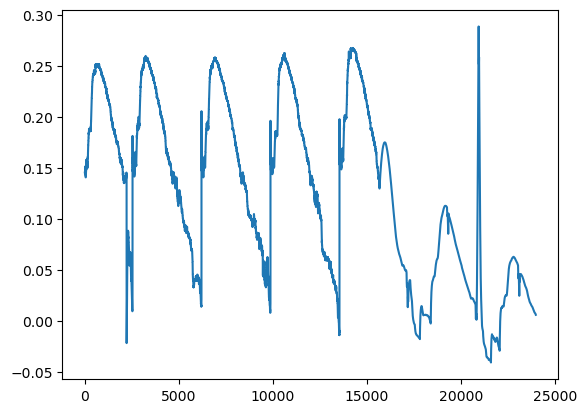

In [25]:
plt.plot(prev_y_and_new_y['signal_in_h2_in_o2_sensor'].tolist())

In [26]:
prev_y_and_new_y

,signal_in_h2_in_o2_sensor
2024-06-24 08:39:00,0.145329
2024-06-24 08:40:00,0.145329
2024-06-24 08:41:00,0.145329
2024-06-24 08:42:00,0.146111
2024-06-24 08:43:00,0.146111
...,...
0,0.006058
0,0.006014
0,0.005968
0,0.005924


In [ ]:
downsampled_2_df = downsampled_df.tail(l-train_length)

plt.plot(downsampled_2_df['signal_in_h2_in_o2_sensor'].tolist())

plt.show()

In [ ]:
plt.plot(predictions)